# DESCRIPTION
- A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis. 
- The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
- The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.

# 1. Import required Libraries

In [498]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers.default = "iframe"


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS

# 2. Import Dataset



In [499]:
#showing all the columns of the pandas dataframe
pd.set_option("max_columns", None)

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [500]:
train_data.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type primary  zip_code  area_code        lat  \
0    Hamilton        Hamilton   City   tract     13346        315  42.840812   
1  South Bend        Roseland   City   tract     46616        574  41.701441   
2    Danville        Danville   City   tract     46122        317  39.792202   
3    San Juan        Guaynabo  Urban   tract       927        787  18.396103   
4   Manhattan  Manhattan City   City   tract     66502        785  39.195573   

         lng        ALand   AWater   pop  male_pop  female_pop  rent_mean  \
0 -75.501524  202183361.0  1699120  5230      2612        2618  769.38638   
1 -86.266614    1560828.0   100363  2633      1349        1284  804.87924   
2 -86.515246   69561595.0   284193  6881      3643        3238  742.77365   
3 -66.104169    1105793.0        0  2700      1141        1559  803.42018   
4 -96.569366    2554403.0        0  5637      2586        3051  938.56493   

   rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0        784.0   232.63967           272.34441         362.0     0.86761   
1        848.0   253.46747           312.58622         513.0     0.97410   
2        703.0   323.39011           291.85520         378.0     0.95238   
3        782.0   297.39258           259.30316         368.0     0.94693   
4        881.0   392.44096          1005.42886        1704.0     0.99286   

   rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0     0.79155     0.59155     0.45634     0.42817     0.18592     0.15493   
1     0.93227     0.69920     0.69920     0.55179     0.41235     0.39044   
2     0.88624     0.79630     0.66667     0.39153     0.39153     0.28307   
3     0.87151     0.69832     0.61732     0.51397     0.46927     0.35754   
4     0.98247     0.91688     0.84740     0.78247     0.60974     0.55455   

   rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
0     0.12958               387           355  63125.28406    48120.0   
1     0.27888               542           502  41931.92593    35186.0   
2     0.15873               459           378  84942.68317    74964.0   
3     0.32961               438           358  48733.67116    37845.0   
4     0.44416              1725          1540  31834.15466    22497.0   

      hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
0  49042.01206        1290.96240      2024.0  67994.14790        53245.0   
1  31639.50203         838.74664      1127.0  50670.10337        43023.0   
2  56811.62186        1155.20980      2488.0  95262.51431        85395.0   
3  45100.54010         928.32193      1267.0  56401.68133        44399.0   
4  34046.50907        1548.67477      1983.0  54053.42396        50272.0   

   family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
0   47667.30119             884.33516          1491.0        1414.80295   
1   34715.57548             375.28798           554.0         864.41390   
2   49292.67664             709.74925          1889.0        1506.06758   
3   41082.90515             490.18479           729.0        1175.28642   
4   39609.12605             244.08903           395.0        1192.58759   

   hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
0              1223.0          641.22898                  377.83135   
1               784.0          482.27020                  316.88320   
2              1361.0          731.89394                  699.41354   
3              1101.0          428.98751                  261.28471   
4

In [501]:
test_data.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type primary  zip_code  \
0         Detroit  Dearborn Heights City      CDP   tract     48239   
1          Auburn            Auburn City     City   tract      4210   
2       Pine City              Millerton  Borough   tract     14871   
3      Monticello        Monticello City     City   tract     42633   
4  Corpus Christi                  Edroy     Town   tract     78410   

   area_code        lat        lng      ALand   AWater   pop  male_pop  \
0        313  42.346422 -83.252823    2711280    39555  3417      1479   
1        207  44.100724 -70.257832   14778785  2705204  3796      1846   
2        607  41.948556 -76.783808  258903666   863840  3944      2065   
3        606  36.746009 -84.766870  501694825  2623067  2508      1427   
4        361  27.882461 -97.678586   13796057   497689  6230      3274   

   female_pop   rent_mean  rent_median  rent_stdev  rent_sample_weight  \
0        1938   858.57169        859.0   232.39082           276.07497   
1        1950   832.68625        750.0   267.22342           183.32299   
2        1879   816.00639        755.0   416.25699           141.39063   
3        1081   418.68937        385.0   156.92024            88.95960   
4        2956  1031.63763        997.0   326.76727           277.39844   

   rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0         424.0     1.00000     0.95696     0.85316     0.85316     0.85316   
1         245.0     1.00000     1.00000     0.86611     0.67364     0.30962   
2         217.0     0.97573     0.93204     0.78641     0.71845     0.63592   
3          93.0     1.00000     0.93548     0.93548     0.64516     0.55914   
4         624.0     0.72276     0.66506     0.53526     0.38301     0.18910   

   rent_gt_35  rent_gt_40  rent_gt_50  universe_samples  used_samples  \
0     0.85316     0.76962     0.63544               435           395   
1     0.30962     0.30962     0.27197               275           239   
2     0.47573     0.43689     0.32524               245           206   
3     0.46237     0.46237     0.36559               153            93   
4     0.16667     0.14263     0.11058               660           624   

        hi_mean  hi_median     hi_stdev  hi_sample_weight  hi_samples  \
0   48899.52121    38746.0  44392.20902         798.02401      1180.0   
1   72335.33234    61008.0  51895.81159         922.82969      1722.0   
2   58501.15901    51648.0  45245.27248         893.07759      1461.0   
3   38237.55059    31612.0  34527.61607         775.17947       957.0   
4  114456.07790    94211.0  81950.95692         836.30759      2404.0   

    family_mean  family_median  family_stdev  family_sample_weight  \
0   53802.87122        45167.0   43756.56479             464.30972   
1   85642.22095        74759.0   49156.72870             482.99945   
2   65694.06582        57186.0   44239.31893             619.73962   
3   44156.38709        34687.0   34899.74300             535.21987   
4  123527.02420       103898.0   72173.55823             507.42257   

   family_samples  hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0           769.0        1139.24548              1109.0          336.47710   
1          1147.0        1533.25988              1438.0          536.61118   
2          1084.0        1254.54462              1089.0          596.85204   
3           689.0         862.65763               749.0          624.42157   
4          1738.0        1996.41425              1907.0          740.21168   

 

In [502]:
#dimension of the train dataset
train_data.shape

(27321, 80)

- There are total 27321 observations & 80 columns in the training dataset.

In [503]:
#dimension of the test dataset
test_data.shape

(11709, 80)

- There are total 11709 observations & 80 columns in the test dataset.

In [504]:
#characteristics of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

- We can see there are missing values in many columns & no data in 'BLOCKID' column.

In [505]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [506]:
#check duplicate records
train_data[train_data.duplicated()]

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID                 state  \
1623   230058      NaN       140        73        6            California   
1907   292484      NaN       140        25       55             Wisconsin   
2447   268401      NaN       140        61       36              New York   
4161   284060      NaN       140       113       48                 Texas   
5066   274254      NaN       140       109       40              Oklahoma   
5605   284597      NaN       140       121       48                 Texas   
5813   225628      NaN       140        37        6            California   
5846   282619      NaN       140       157       47             Tennessee   
5871   272055      NaN       140        49       39                  Ohio   
5952   269238      NaN       140        81       36              New York   
6326   284597      NaN       140       121       48                 Texas   
6338   268538      NaN       140        61       36              New York   
6820   227903      NaN       140        59        6            California   
7060   240056      NaN       140       153       13               Georgia   
7277   284096      NaN       140       113       48                 Texas   
7765   235725      NaN       140        57       12               Florida   
7947   263629      NaN       140        17       34            New Jersey   
8171   234119      NaN       140         1       11  District of Columbia   
8297   276838      NaN       140        41       42          Pennsylvania   
8892   276092      NaN       140         3       42          Pennsylvania   
9155   267087      NaN       140        47       36              New York   
9224   285674      NaN       140       201       48                 Texas   
9636   223893      NaN       140        27        4               Arizona   
9646   264375      NaN       140        29       34            New Jersey   
10160  266102      NaN       140         5       36              New York   
10235  223893      NaN       140        27        4               Arizona   
10259  256885      NaN       140       123       27             Minnesota   
10396  231894      NaN       140       111        6            California   
10550  289813      NaN       140       155       51              Virginia   
10578  280248      NaN       140        15       45        South Carolina   
10671  284942      NaN       140       157       48                 Texas   
10785  242262      NaN       140        31       17              Illinois   
10849  283933      NaN       140        99       48                 Texas   
10962  222533      NaN       140        13        4               Arizona   
10980  278464      NaN       140       101       42          Pennsylvania   
11131  238513      NaN       140       119       12               Florida   
11257  268335      NaN       140        61       36              New York   
11326  276103      NaN       140         3       42          Pennsylvania   
11376  278464      NaN       140       101       42          Pennsylvania   
11614  275715      NaN       140         3       42          Pennsylvania   
11881  266120      NaN       140         5       36              New York   
12637  238294      NaN       140       111       12               Florida   
12727  259415      NaN       140        67       30               Montana   
12928  266327      NaN       140         5       36              New York   
13035  238947      NaN       140        53       13               Georgia   
13515  285596      NaN       140       201       48                 Texas   
13605  286607      NaN       140       309       48                 Texas   
13776  233387      NaN       140         1        9           Connecticut   
14159  238294      NaN       140       111       12               Florida   
14573  242653      NaN       140        31       17              Illinois   
14724  227654      NaN       140        53        6            California   
14727 

- So we have duplicate records in the dataset. We have to remove these duplicate records before doing other analysis.

In [507]:
#dropping duplicate records from train dataset
train_data.drop_duplicates(inplace = True)
train_data.shape

(27161, 80)

- There is not a single data in 'BLOCKID' column. So we will remove this column as we don't have any idea what values should be there.
- We will remove those records which are having missing values in our target variable 'hc_mortgage_mean' as keeping those records for training purpose does not make sense.

In [508]:
test_data[test_data.duplicated()]

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
460    265339      NaN       140         3       32         Nevada       NV   
897    250903      NaN       140        25       25  Massachusetts       MA   
1340   224994      NaN       140        29        6     California       CA   
1400   251389      NaN       140         3       24       Maryland       MD   
3065   278467      NaN       140       101       42   Pennsylvania       PA   
3326   257215      NaN       140        15       29       Missouri       MO   
3331   288512      NaN       140        35       49           Utah       UT   
4225   266664      NaN       140        27       36       New York       NY   
5278   278468      NaN       140       101       42   Pennsylvania       PA   
5933   231120      NaN       140        85        6     California       CA   
6288   279063      NaN       140        23       72    Puerto Rico       PR   
6675   267259      NaN       140        47       36       New York       NY   
7010   281345      NaN       140        99       46   South Dakota       SD   
7186   278597      NaN       140       119       42   Pennsylvania       PA   
7500   253706      NaN       140        73       26       Michigan       MI   
8858   284740      NaN       140       141       48          Texas       TX   
9006   268339      NaN       140        61       36       New York       NY   
9137   268730      NaN       140        65       36       New York       NY   
9231   265330      NaN       140         3       32         Nevada       NV   
9287   251576      NaN       140         5       24       Maryland       MD   
9396   238950      NaN       140        53       13        Georgia       GA   
9406   279895      NaN       140         5       44   Rhode Island       RI   
9538   225615      NaN       140        37        6     California       CA   
9770   227404      NaN       140        37        6     California       CA   
9801   283415      NaN       140        29       48          Texas       TX   
10395  240129      NaN       140       179       13        Georgia       GA   
10617  245342      NaN       140         3       18        Indiana       IN   
10682  236210      NaN       140        73       12        Florida       FL   
10961  265934      NaN       140         1       36       New York       NY   
11100  265797      NaN       140        23       32         Nevada       NV   
11543  267675      NaN       140        47       36       New York       NY   
11554  288512      NaN       140        35       49           Utah       UT   

                 city                  place     type primary  zip_code  \
460         Las Vegas             Winchester     City   tract     89119   
897         Cambridge         Cambridge City     City   tract      2139   
1340          Edwards            Edwards Afb     City   tract     93523   
1400        Linthicum               Ferndale      CDP   tract     21090   
3065     Philadelphia      Philadelphia City  Borough   tract     19140   
3326           Warsaw           Lincoln City     City   tract     65355   
3331   Salt Lake City    Salt Lake City City     City   tract     84116   
4225        Poughquag      Hopewell Junction     City   tract     12570   
5278     Philadelphia                 Colwyn  Borough   tract     19145   
5933        Palo Alto               Stanford     City   tract     94304   
6288        Cabo Rojo              Pole Ojea    Urban   tract       623   
6675         Brooklyn          New York City     City   tract     11206   
7010      Sioux Falls               Anderson      CDP   tract     57110   
7186        Lewisburg               Linntown  Borough   tract     17837   
7500   Mount Pleasant    Mount Pleasant City      CDP   tract     48858   
8858          El Paso             Fort Bliss     Town   tract     79901   
9006         New York          New York City     City   tract     10009   
9137             Rome              Rome City     Cit

In [509]:
##dropping duplicate records from test dataset
test_data.drop_duplicates(inplace = True)
test_data.shape

(11677, 80)

In [510]:
#dropping BLOCKID column from the train dataset
train_data.drop('BLOCKID', axis = 1, inplace = True)
train_data.head(10)

UID  SUMLEVEL  COUNTYID  STATEID           state state_ab  \
0  267822       140        53       36        New York       NY   
1  246444       140       141       18         Indiana       IN   
2  245683       140        63       18         Indiana       IN   
3  279653       140       127       72     Puerto Rico       PR   
4  247218       140       161       20          Kansas       KS   
5  221087       140        79        1         Alabama       AL   
6  286689       140       337       48           Texas       TX   
7  280558       140        45       45  South Carolina       SC   
8  269138       140        81       36        New York       NY   
9  227164       140        37        6      California       CA   

                  city                      place   type primary  zip_code  \
0             Hamilton                   Hamilton   City   tract     13346   
1           South Bend                   Roseland   City   tract     46616   
2             Danville                   Danville   City   tract     46122   
3             San Juan                   Guaynabo  Urban   tract       927   
4            Manhattan             Manhattan City   City   tract     66502   
5              Trinity                    Trinity   Town   tract     35673   
6               Nocona                Nocona City   Town   tract     76255   
7              Taylors                 Tigerville   City   tract     29687   
8  South Richmond Hill              New York City   City   tract     11419   
9  Rancho Palos Verdes  Palos Verdes Estates City   City   tract     90275   

   area_code        lat         lng        ALand   AWater   pop  male_pop  \
0        315  42.840812  -75.501524  202183361.0  1699120  5230      2612   
1        574  41.701441  -86.266614    1560828.0   100363  2633      1349   
2        317  39.792202  -86.515246   69561595.0   284193  6881      3643   
3        787  18.396103  -66.104169    1105793.0        0  2700      1141   
4        785  39.195573  -96.569366    2554403.0        0  5637      2586   
5        256  34.519582  -87.151801   78402217.0   487343  5475      2564   
6        940  33.842814  -97.784340  663218412.0  3122513  1947       994   
7        864  35.136763  -82.294817  160338537.0  1912842  3476      1658   
8        718  40.688610  -73.830597     157581.0        0  3530      1778   
9        310  33.755867 -118.407590    3565039.0  1123792  4139      2086   

   female_pop   rent_mean  rent_median  rent_stdev  rent_sample_weight  \
0        2618   769.38638        784.0   232.63967           272.34441   
1        1284   804.87924        848.0   253.46747           312.58622   
2        3238   742.77365        703.0   323.39011           291.85520   
3        1559   803.42018        782.0   297.39258           259.30316   
4        3051   938.56493        881.0   392.44096          1005.42886   
5        2911   605.10246        684.0   230.15912           272.10405   
6         953   661.76963        674.0   230.48928           125.45345   
7        1818   784.36272        729.0   401.67621            94.04990   
8        1752  1438.85143       1501.0   444.91460            76.80713   
9        2053  2104.29576       1856.0   838.73396            48.12378   

   rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  \
0         362.0     0.86761     0.79155     0.59155     0.45634     0.42817   
1         513.0     0.97410     0.93227     0.69920     0.69920     0.55179   
2         378.0     0.95238     0.88624     0.79630     0.66667     0.39153   
3         368.0     0.94693     0.87151     0.69832     0.61732     0.51397   
4        1704.0     0.99286     0.98247     0.91688     0.84740     0.78247   
5         287.0     0.80139     0.74564     0.74564     0.58188     0.23345   
6         153.0     0.78431     0.71242     0.69935     0.66013     0.64052   
7         124.0     1.00000     1.00000     1.00000     0.83871     0.83871   
8         332.0     1.00000     0.9

In [511]:
#dropping BLOCKID column from the test dataset
test_data.drop('BLOCKID', axis = 1, inplace = True)
test_data.head(7)

UID  SUMLEVEL  COUNTYID  STATEID         state state_ab            city  \
0  255504       140       163       26      Michigan       MI         Detroit   
1  252676       140         1       23         Maine       ME          Auburn   
2  276314       140        15       42  Pennsylvania       PA       Pine City   
3  248614       140       231       21      Kentucky       KY      Monticello   
4  286865       140       355       48         Texas       TX  Corpus Christi   
5  238666       140       131       12       Florida       FL          Destin   
6  240174       140       187       13       Georgia       GA       Dahlonega   

                   place     type primary  zip_code  area_code        lat  \
0  Dearborn Heights City      CDP   tract     48239        313  42.346422   
1            Auburn City     City   tract      4210        207  44.100724   
2              Millerton  Borough   tract     14871        607  41.948556   
3        Monticello City     City   tract     42633        606  36.746009   
4                  Edroy     Town   tract     78410        361  27.882461   
5          Miramar Beach     City   tract     32541        850  30.387568   
6         Dahlonega City     City   tract     30533        706  34.494440   

         lng      ALand    AWater   pop  male_pop  female_pop   rent_mean  \
0 -83.252823    2711280     39555  3417      1479        1938   858.57169   
1 -70.257832   14778785   2705204  3796      1846        1950   832.68625   
2 -76.783808  258903666    863840  3944      2065        1879   816.00639   
3 -84.766870  501694825   2623067  2508      1427        1081   418.68937   
4 -97.678586   13796057    497689  6230      3274        2956  1031.63763   
5 -86.364856   20403316  59974789  8582      3944        4638  1380.51706   
6 -83.931295  103503825    734624  7156      3798        3358   978.97682   

   rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
0        859.0   232.39082           276.07497         424.0     1.00000   
1        750.0   267.22342           183.32299         245.0     1.00000   
2        755.0   416.25699           141.39063         217.0     0.97573   
3        385.0   156.92024            88.95960          93.0     1.00000   
4        997.0   326.76727           277.39844         624.0     0.72276   
5       1150.0   651.23162           344.36926        1149.0     0.97002   
6        866.0   401.09289           402.67336         737.0     1.00000   

   rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
0     0.95696     0.85316     0.85316     0.85316     0.85316     0.76962   
1     1.00000     0.86611     0.67364     0.30962     0.30962     0.30962   
2     0.93204     0.78641     0.71845     0.63592     0.47573     0.43689   
3     0.93548     0.93548     0.64516     0.55914     0.46237     0.46237   
4     0.66506     0.53526     0.38301     0.18910     0.16667     0.14263   
5     0.91975     0.85979     0.75838     0.61640     0.53968     0.33157   
6     0.89281     0.74898     0.66757     0.54410     0.46540     0.40570   

   rent_gt_50  universe_samples  used_samples       hi_mean  hi_median  \
0     0.63544               435           395   48899.52121    38746.0   
1     0.27197               275           239   72335.33234    61008.0   
2     0.32524               245           206   58501.15901    51648.0   
3     0.36559               153            93   38237.55059    31612.0   
4     0.11058               660           624  114456.07790    94211.0   
5     0.16049              1193          1134   86077.06461    58031.0   
6     0.22931               766           737   58147.27977    42841.0   

      hi_stdev  hi_sample_weight  hi_samples   family_mean  family_median  \
0  44392.20902         798.02401      1180.0   53802.87122        45167.0   
1  51895.81159         922.82969      1722.0   85642.22095        74759.0   
2  45245.27248         893.07759      1461.0   65694.06582        57186.0

In [512]:
#removing those records which are having missing values in our target variable 'hc_mortgage_mean'
train_data = train_data[pd.notnull(train_data.hc_mortgage_mean)]
train_data.shape

(26719, 79)

In [513]:
train_data['UID'].value_counts() > 1

266238    False
259668    False
245149    False
221161    False
286113    False
279970    False
228773    False
288166    False
269737    False
265643    False
275884    False
251312    False
253361    False
247218    False
234936    False
232891    False
241087    False
226756    False
228805    False
269769    False
271822    False
251344    False
253393    False
249299    False
255446    False
232859    False
234904    False
257431    False
259444    False
245085    False
220513    False
281955    False
292196    False
290151    False
267624    False
269673    False
275820    False
277869    False
251248    False
255350    False
275852    False
257399    False
230778    False
232827    False
243068    False
220545    False
281987    False
288134    False
224647    False
267656    False
269705    False
234968    False
243164    False
241119    False
287317    False
239134    False
241183    False
284192    False
220705    False
292388    False
222758    False
276012    False
273967  

- Here 'UID' is uniquely identifying each observation. UID is the ID of the location of which we are analyzing. Hence we can use it as the primary key and can be used as index of each observation.

In [514]:
test_data.shape

(11677, 79)

# 3. Missing Value Handling

In [515]:
#columns of the dataset
cols = train_data.columns
cols

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [516]:
for i in cols:
    print(i)
    print(train_data[i].count() - train_data[i].isnull().count())
    print(train_data[i].isnull().mean())

UID
0
0.0
SUMLEVEL
0
0.0
COUNTYID
0
0.0
STATEID
0
0.0
state
0
0.0
state_ab
0
0.0
city
0
0.0
place
0
0.0
type
0
0.0
primary
0
0.0
zip_code
0
0.0
area_code
0
0.0
lat
0
0.0
lng
0
0.0
ALand
0
0.0
AWater
0
0.0
pop
0
0.0
male_pop
0
0.0
female_pop
0
0.0
rent_mean
-28
0.001047943411055803
rent_median
-28
0.001047943411055803
rent_stdev
-28
0.001047943411055803
rent_sample_weight
-28
0.001047943411055803
rent_samples
-28
0.001047943411055803
rent_gt_10
-28
0.001047943411055803
rent_gt_15
-28
0.001047943411055803
rent_gt_20
-28
0.001047943411055803
rent_gt_25
-28
0.001047943411055803
rent_gt_30
-28
0.001047943411055803
rent_gt_35
-28
0.001047943411055803
rent_gt_40
-28
0.001047943411055803
rent_gt_50
-28
0.001047943411055803
universe_samples
0
0.0
used_samples
0
0.0
hi_mean
0
0.0
hi_median
0
0.0
hi_stdev
0
0.0
hi_sample_weight
0
0.0
hi_samples
0
0.0
family_mean
-5
0.00018713275197425054
family_median
-5
0.00018713275197425054
family_stdev
-5
0.00018713275197425054
family_sample_weight
-5
0.00018

- __'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50'__ columns are having __28 missing values__ each out of 27161.
- All these features are continuous numerical variables.

In [517]:
null_data = train_data[train_data.isna().any(axis=1)]
null_data

UID  SUMLEVEL  COUNTYID  STATEID                 state state_ab  \
153    263292       140        13       34            New Jersey       NJ   
557    290192       140       650       51              Virginia       VA   
585    294209       140         1       56               Wyoming       WY   
646    266327       140         5       36              New York       NY   
784    268538       140        61       36              New York       NY   
1103   274246       140       109       40              Oklahoma       OK   
1191   245139       140       197       17              Illinois       IL   
1211   247937       140        93       21              Kentucky       KY   
1297   229776       140        73        6            California       CA   
1500   232053       140         5        8              Colorado       CO   
1737   261451       140       183       37        North Carolina       NC   
1928   284060       140       113       48                 Texas       TX   
1938   265202       140        49       35            New Mexico       NM   
2024   240922       140         3       15                Hawaii       HI   
2350   234209       140         1       11  District of Columbia       DC   
2464   284597       140       121       48                 Texas       TX   
2537   222933       140        13        4               Arizona       AZ   
2725   242262       140        31       17              Illinois       IL   
2923   237501       140        99       12               Florida       FL   
3108   265934       140         1       36              New York       NY   
3291   242693       140        31       17              Illinois       IL   
3366   249006       140        51       22             Louisiana       LA   
3469   240803       140         3       15                Hawaii       HI   
3620   289074       140        59       51              Virginia       VA   
3671   225301       140        37        6            California       CA   
3675   227903       140        59        6            California       CA   
3713   235713       140        57       12               Florida       FL   
4087   276103       140         3       42          Pennsylvania       PA   
4503   240805       140         3       15                Hawaii       HI   
4539   230803       140        83        6            California       CA   
4707   232077       140         5        8              Colorado       CO   
4874   234119       140         1       11  District of Columbia       DC   
4920   225627       140        37        6            California       CA   
4982   278464       140       101       42          Pennsylvania       PA   
5004   282496       140       157       47             Tennessee       TN   
5252   223918       140         1        6            California       CA   
5684   225628       140        37        6            California       CA   
5788   266209       140         5       36              New York       NY   
5929   249828       140         1       25         Massachusetts       MA   
6496   263629       140        17       34            New Jersey       NJ   
6577   268564       140        61       36              New York       NY   
6721   223913       140         1        6            California       CA   
7250   251600       140         5       24              Maryland       MD   
7413   290029       140       510       51              Virginia       VA   
7628   287384       140       439       48                 Texas       TX   
7866   266185       140         5       36              New York       NY   
7885   238812       140        31       13               Georgia       GA   
8129   291806       140        53       53            Washington       WA   
8315   272144       140        61       39                  Ohio       OH   
8388   283917       140        99       48                 Texas       TX   
8480   291809       140        53       53            Washington       WA   
8862  

In [518]:
round((134 / 26719)*100, 2)

0.5

### Since we only have 0.5% data missing, we can safely delete these rows, without loosing much information.

In [519]:
train_data.dropna(inplace = True)

In [520]:
train_data.shape

(26585, 79)

In [521]:
pd.set_option("max_rows", None)

train_data.isna().sum()

UID                            0
SUMLEVEL                       0
COUNTYID                       0
STATEID                        0
state                          0
state_ab                       0
city                           0
place                          0
type                           0
primary                        0
zip_code                       0
area_code                      0
lat                            0
lng                            0
ALand                          0
AWater                         0
pop                            0
male_pop                       0
female_pop                     0
rent_mean                      0
rent_median                    0
rent_stdev                     0
rent_sample_weight             0
rent_samples                   0
rent_gt_10                     0
rent_gt_15                     0
rent_gt_20                     0
rent_gt_25                     0
rent_gt_30                     0
rent_gt_35                     0
rent_gt_40

In [522]:
#checking missing value in test data
test_data.isna().sum()

UID                              0
SUMLEVEL                         0
COUNTYID                         0
STATEID                          0
state                            0
state_ab                         0
city                             0
place                            0
type                             0
primary                          0
zip_code                         0
area_code                        0
lat                              0
lng                              0
ALand                            0
AWater                           0
pop                              0
male_pop                         0
female_pop                       0
rent_mean                      134
rent_median                    134
rent_stdev                     134
rent_sample_weight             134
rent_samples                   134
rent_gt_10                     135
rent_gt_15                     135
rent_gt_20                     135
rent_gt_25                     135
rent_gt_30          

In [523]:
#dropping the missing data from test dataset
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)

In [524]:
test_data.shape

(11355, 79)

# 4. Exploratory Data Analysis (EDA)
## Debt Analysis :
### Exploring the top 2500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualizing using geo-map.

In [346]:
term = "second_mortgage"

#ownership above 10%
df_pop = train_data.loc[train_data.pct_own > 0.1, ['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'female_age_sample_weight',
       'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated',
       'divorced']]
df_pop.sort_values("second_mortgage", ascending = False, inplace = True)

In [347]:
df_pop.head(30)

UID  COUNTYID  STATEID                 state state_ab  \
3285   289712       147       51              Virginia       VA   
11980  251185        27       25         Massachusetts       MA   
26018  269323        81       36              New York       NY   
7829   251324         3       24              Maryland       MD   
2077   235788        57       12               Florida       FL   
1701   242304        31       17              Illinois       IL   
11839  242546        31       17              Illinois       IL   
6478   292972        79       55             Wisconsin       WI   
11659  229298        71        6            California       CA   
21184  230597        81        6            California       CA   
8101   272149        61       39                  Ohio       OH   
23770  283972       113       48                 Texas       TX   
10927  232647        41        8              Colorado       CO   
10327  232507        35        8              Colorado       CO   
10074  227668        55        6            California       CA   
8443   271447        35       39                  Ohio       OH   
23984  255538       163       26              Michigan       MI   
12429  231359        95        6            California       CA   
26588  234204         1       11  District of Columbia       DC   
596    233586         3        9           Connecticut       CT   
8770   242691        31       17              Illinois       IL   
14490  225439        37        6            California       CA   
1755   274903         5       41                Oregon       OR   
23613  238716        13       13               Georgia       GA   
7728   237144        95       12               Florida       FL   
18643  226045        37        6            California       CA   
23617  258791        49       28           Mississippi       MS   
17473  267019        45       36              New York       NY   
5189   291697        53       53            Washington       WA   
7294   252309        33       24              Maryland       MD   

                      city                  place     type primary  zip_code  \
3285             Farmville              Farmville     Town   tract     23901   
11980            Worcester         Worcester City     City   tract      1610   
26018               Corona           Harbor Hills     City   tract     11368   
7829           Glen Burnie            Glen Burnie      CDP   tract     21061   
2077                 Tampa        Egypt Lake-leto     City   tract     33614   
1701               Chicago            Lincolnwood  Village   tract     60640   
11839              Chicago           Chicago City  Village   tract     60622   
6478             Milwaukee         Milwaukee City     City   tract     53210   
11659             Etiwanda  Rancho Cucamonga City     City   tract     91739   
21184  South San Francisco         San Bruno City     City   tract     94080   
8101            Cincinnati        Cincinnati City  Village   tract     45219   
23770               Dallas            Dallas City     Town   tract     75207   
10927     Colorado Springs  Colorado Springs City     City   tract     80916   
10327            Littleton               Louviers     City   tract     80125   
10074                 Napa              Napa City     City   tract     94559   
8443        East Cleveland    East Cleveland City  Village   tract     44112   
23984        Highland Park     Highland Park City      CDP   tract     48203   
12429            Fairfield         Fairfield City     City   tract     94533   
26588           Washington        Washington City     City   tract     20032   
596               Hartford          Hartford City      CDP   tract      6105   
8770               Chicago           Chicago City  Village   tract     60637   
14490          Los Angeles    South Pasadena City     City   tract     90042   
1755          Happy Valley         Milwaukie City     City   tract     97086   
23613       

In [348]:
places = []

df_pop['text'] = df_pop.place + " Second Mortgage : " + round(df_pop["second_mortgage"]*100, 2).astype(str) + "%"
#df_pop.text[0]

layout = dict(title = "Top 2500 Highest Second Mortgage Locations",
             showlegend = True,
             geo = dict(scope = 'usa', projection = dict(type = "albers usa"),
                       showland = True, landcolor = 'rgb(217, 217, 217)',
                       countrycolor = 'rgb(255, 255, 255)',
                       subunitcolor = 'rgb(255, 255, 255)',
                       countrywidth = 1, subunitwidth = 1))

#places
limits = [(0, 499), (500, 999), (1000, 1499), (1500, 1999), (2000, 2500)]
colors = ["rgb(0, 116, 217)", "rgb(255, 65, 54)", "rgb(133, 20, 75)", "rgb(255, 133, 27)", "rgb(76, 199, 144)"]
scale = 1000

for i in range(len(limits)):
    name = "{0} - {1}".format(limits[i][0], limits[i][1])
    df_sub = df_pop[limits[i][0]: limits[i][1]]
    places.append(dict(type = "scattergeo", locationmode = "USA-states", lon = df_sub.lng,
                      lat = df_sub.lat, text = df_sub.text,
                      marker = dict(color = colors[i], 
                                    size = list(map(lambda x : 15 + x*scale,df_sub["second_mortgage"].values)),
                                    line = dict(width = 0.5, color = "rgb(40, 40, 40)"), sizemode = "area"),name = name))
    
#plotting geo-map
fig = dict(data = places, layout = layout)
py.iplot(fig)

### Calculate Bad Debt:
- Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
- Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [349]:
df_pop['bad_debt'] = df_pop['second_mortgage'] + df_pop['home_equity'] - df_pop['home_equity_second_mortgage']
df_pop['good_debt'] = df_pop['debt'] - df_pop['bad_debt']

In [350]:
df_pop.head()

UID  COUNTYID  STATEID          state state_ab         city  \
3285   289712       147       51       Virginia       VA    Farmville   
11980  251185        27       25  Massachusetts       MA    Worcester   
26018  269323        81       36       New York       NY       Corona   
7829   251324         3       24       Maryland       MD  Glen Burnie   
2077   235788        57       12        Florida       FL        Tampa   

                 place  type primary  zip_code  area_code        lat  \
3285         Farmville  Town   tract     23901        434  37.297357   
11980   Worcester City  City   tract      1610        508  42.254262   
26018     Harbor Hills  City   tract     11368        718  40.751809   
7829       Glen Burnie   CDP   tract     21061        410  39.127273   
2077   Egypt Lake-leto  City   tract     33614        813  28.029063   

             lng      ALand  AWater   pop  male_pop  female_pop   rent_mean  \
3285  -78.396452   413391.0       0  1733       609        1124   782.00000   
11980 -71.800347   797165.0       0  2133      1139         994   942.32740   
26018 -73.853582   169666.0       0  4181      2249        1932  1413.12357   
7829  -76.635265  1110282.0       0  4866      1985        2881  1335.49818   
2077  -82.495395  2050906.0  234794  5468      2784        2684   914.10322   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
3285         781.0    22.95830            11.00000          11.0     1.00000   
11980        953.0   304.34109           333.88019         645.0     0.98906   
26018       1388.0   499.47343           205.65925         777.0     1.00000   
7829        1335.0   336.92824           352.62444        1502.0     1.00000   
2077         880.0   191.64962          1067.77502        1847.0     0.96619   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
3285      1.00000     1.00000     1.00000     1.00000     1.00000     1.00000   
11980     0.97813     0.86250     0.81563     0.68438     0.53281     0.47500   
26018     0.92664     0.80952     0.69241     0.58301     0.44659     0.37967   
7829      0.91545     0.77763     0.60186     0.49001     0.42011     0.38016   
2077      0.92794     0.80820     0.58925     0.44235     0.37140     0.22783   

       rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
3285      0.00000                11            11  33088.92156    23236.0   
11980     0.39063               655           640  39036.18368    29037.0   
26018     0.30245               821           777  56434.63436    46106.0   
7829      0.23435              1502          1502  59466.62302    50164.0   
2077      0.17350              1965          1804  48495.17313    38340.0   

          hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
3285   19970.41249          16.33316        19.0  47067.92731        59954.0   
11980  42317.65457         599.87224       768.0  50471.95789        40476.0   
26018  47279.53535         674.74625       997.0  48558.91165        40462.0   
7829   37351.26266        1293.31194      2068.0  64899.68626        50705.0   
2077   41137.53473        1664.02791      2179.0  52332.06236        39980.0   

       family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
3285    24030.19608               5.33316             8.0        2249.50000   
11980   45794.28515             314.09134           432.0        1596.15811   
26018   35569.90113             630.41529           878.0        3037.81395   
7829    39727.56212             706.84520          1125.0        1622.29005   
2077    41386.75431             755.11681          1010.0        1641.00508   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
3285               2249.0          182.57419                    0.79359   
11980              1690.0          465.71234                   30.05003   
26018              3320.0          888.70919       

### Pie charts to show overall debt and bad debt

In [351]:
size = 10
explode = [0.4] * size
explode = tuple(explode)

explode_bd = [0.5] * size*2
explode_bd = tuple(explode_bd)

labels_D = ['GD', 'BD'] * size
labels_D = tuple(labels_D)

In [352]:
print(explode)

(0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4)


In [353]:
print(explode_bd)

(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)


In [354]:
print(labels_D)

('GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD', 'GD', 'BD')


In [355]:
l1 = list(df_pop['bad_debt'] )
l1[:5]

[0.5, 0.43363, 0.40340999999999994, 0.38161999999999996, 0.38785000000000003]

In [356]:
l2 = list(df_pop['good_debt'] )
l2[:5]

[0.0, 0.41592999999999997, 0.38068, 0.49471, 0.40186999999999995]

In [357]:
l3 = sum(zip(l1, l2+[0]), ())

In [358]:
l3[:10]

(0.5,
 0.0,
 0.43363,
 0.41592999999999997,
 0.40340999999999994,
 0.38068,
 0.38161999999999996,
 0.49471,
 0.38785000000000003,
 0.40186999999999995)

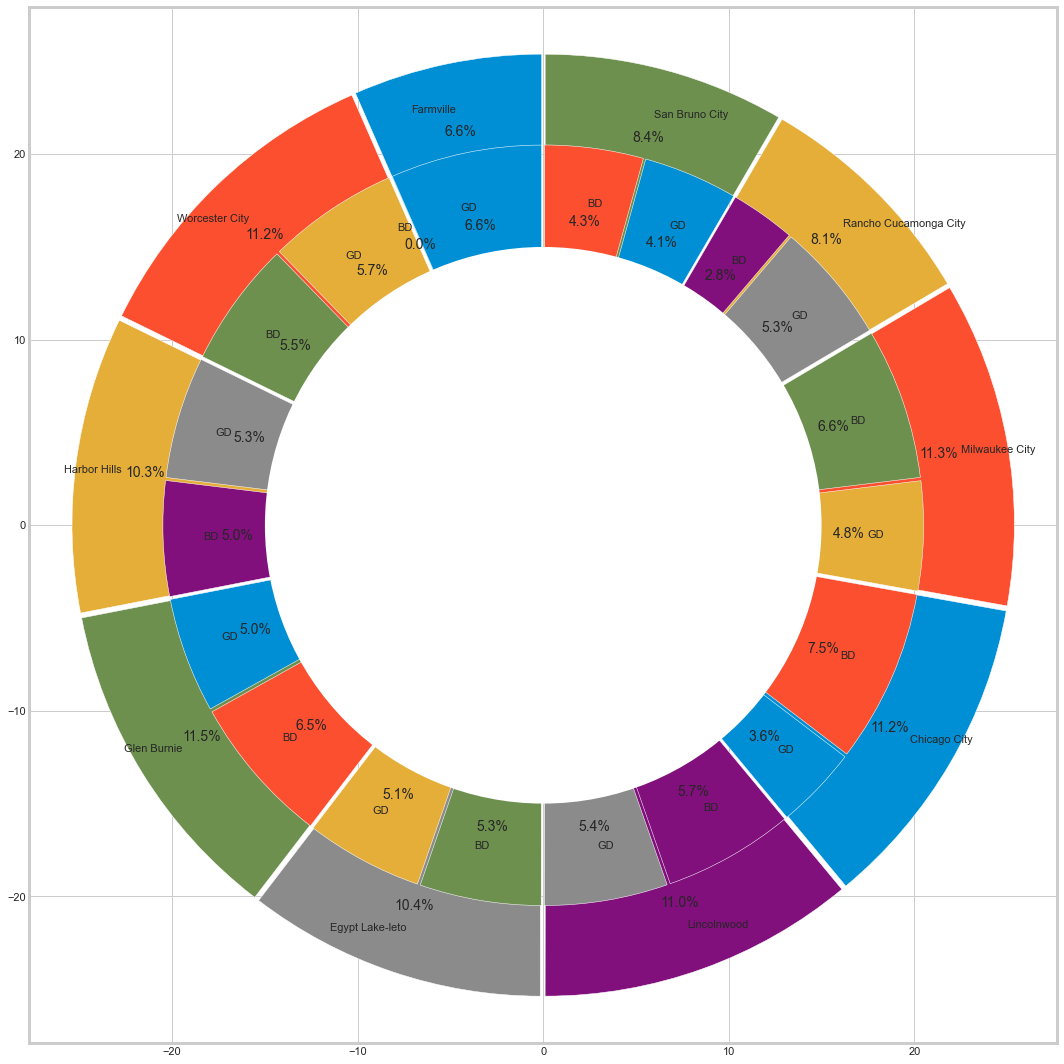

In [359]:
'''Since it is difficult to show all 2500 locations, without compromising readability, 
I have limited my selection to "Top 10" cities.'''

labels = list(df_pop.place[:10])
debt = list(df_pop.debt[:10])

sns.set_style("whitegrid")

gd_bd = l3[:20]

plt.figure(figsize = (15, 15))

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.pie(debt, labels = labels, startangle = 90, frame = True, radius =25, autopct='%1.1f%%', pctdistance=0.85, 
        labeldistance = 0.9, colors = color_pal, explode = explode)
plt.pie(gd_bd, labels = labels_D, startangle = 90, frame = True, radius = 20, autopct='%1.1f%%', pctdistance=0.80, 
        labeldistance = 0.85, colors = color_pal, explode = explode_bd)
centre_circle = plt.Circle((0,0),15,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()

### Box and whisker plot for the distribution of 2nd mortgage, home equity, good debt, and bad debt for different cities

In [360]:
second_mortgage = list(df_pop.second_mortgage)
home_equity = list(df_pop.home_equity)

Good_Debt = list(df_pop.good_debt)
Bad_Debt = list(df_pop.bad_debt)

In [361]:
'''Since it is difficult to show all 2500 locations, without compromising readability, 
I have limited my selection to "Top 10" cities.'''
df_pop['city'].value_counts()[:10].index

Index(['Chicago', 'Brooklyn', 'Houston', 'Los Angeles', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami'],
      dtype='object')

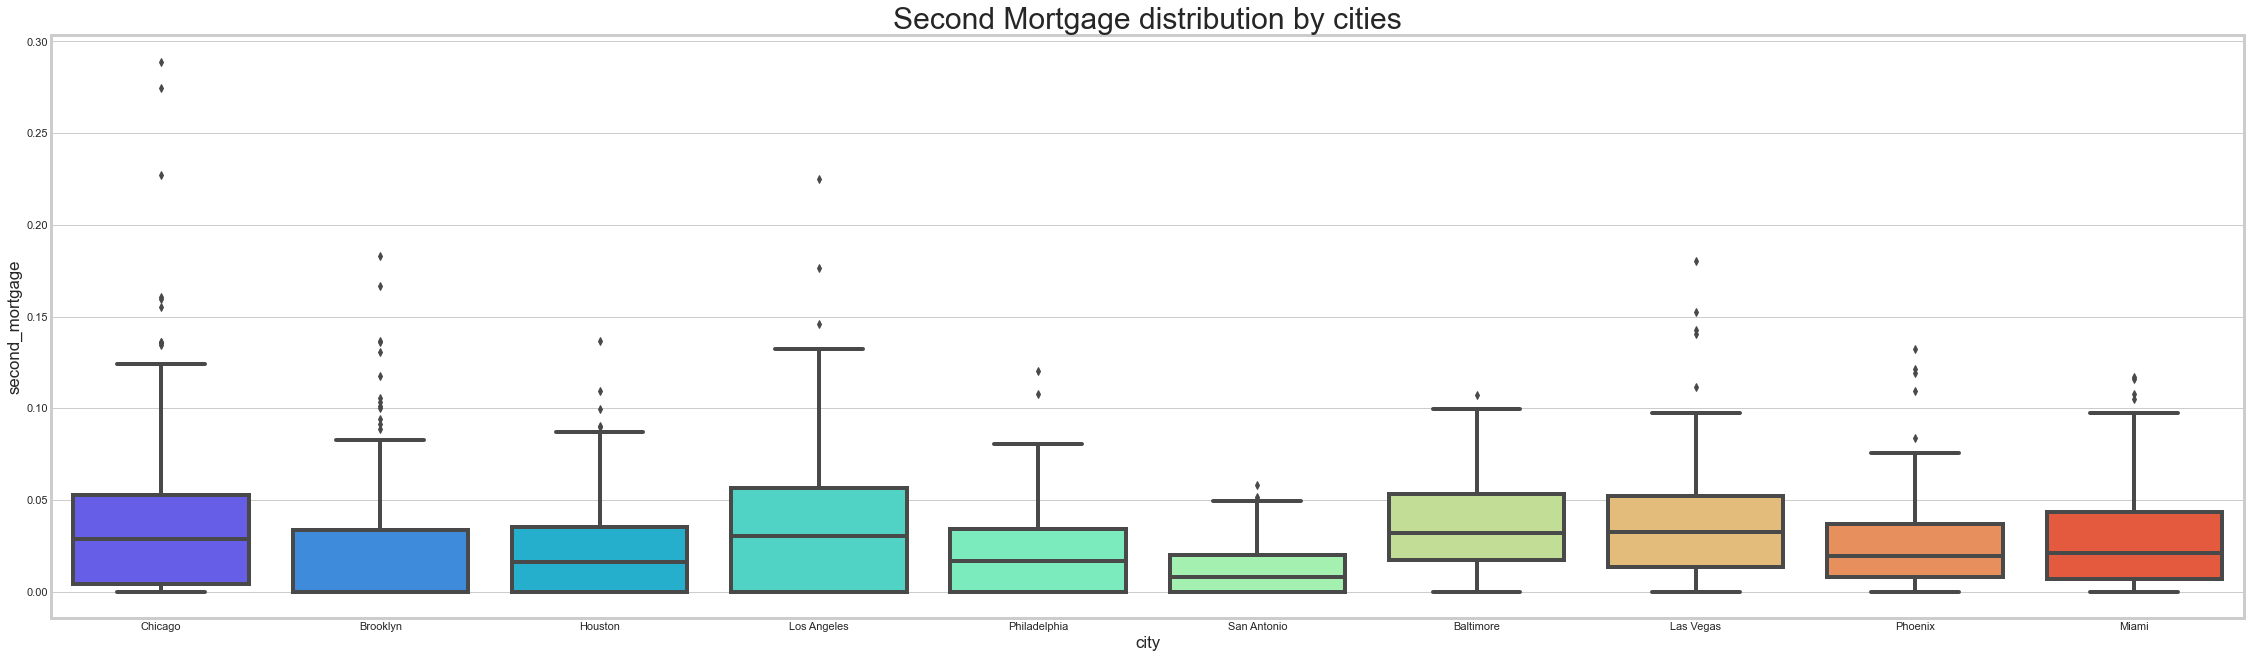

In [362]:
cities = ['Chicago', 'Brooklyn', 'Houston', 'Los Angeles', 'Philadelphia', 
          'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']

boxplot_df = df_pop[df_pop['city'].isin(cities)]

sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df,palette='rainbow', 
            order = ['Chicago', 'Brooklyn', 'Houston', 'Los Angeles', 'Philadelphia', 'San Antonio', 'Baltimore', 
                     'Las Vegas', 'Phoenix', 'Miami']).set_title('Second Mortgage distribution by cities', fontsize = 30)
plt.show()

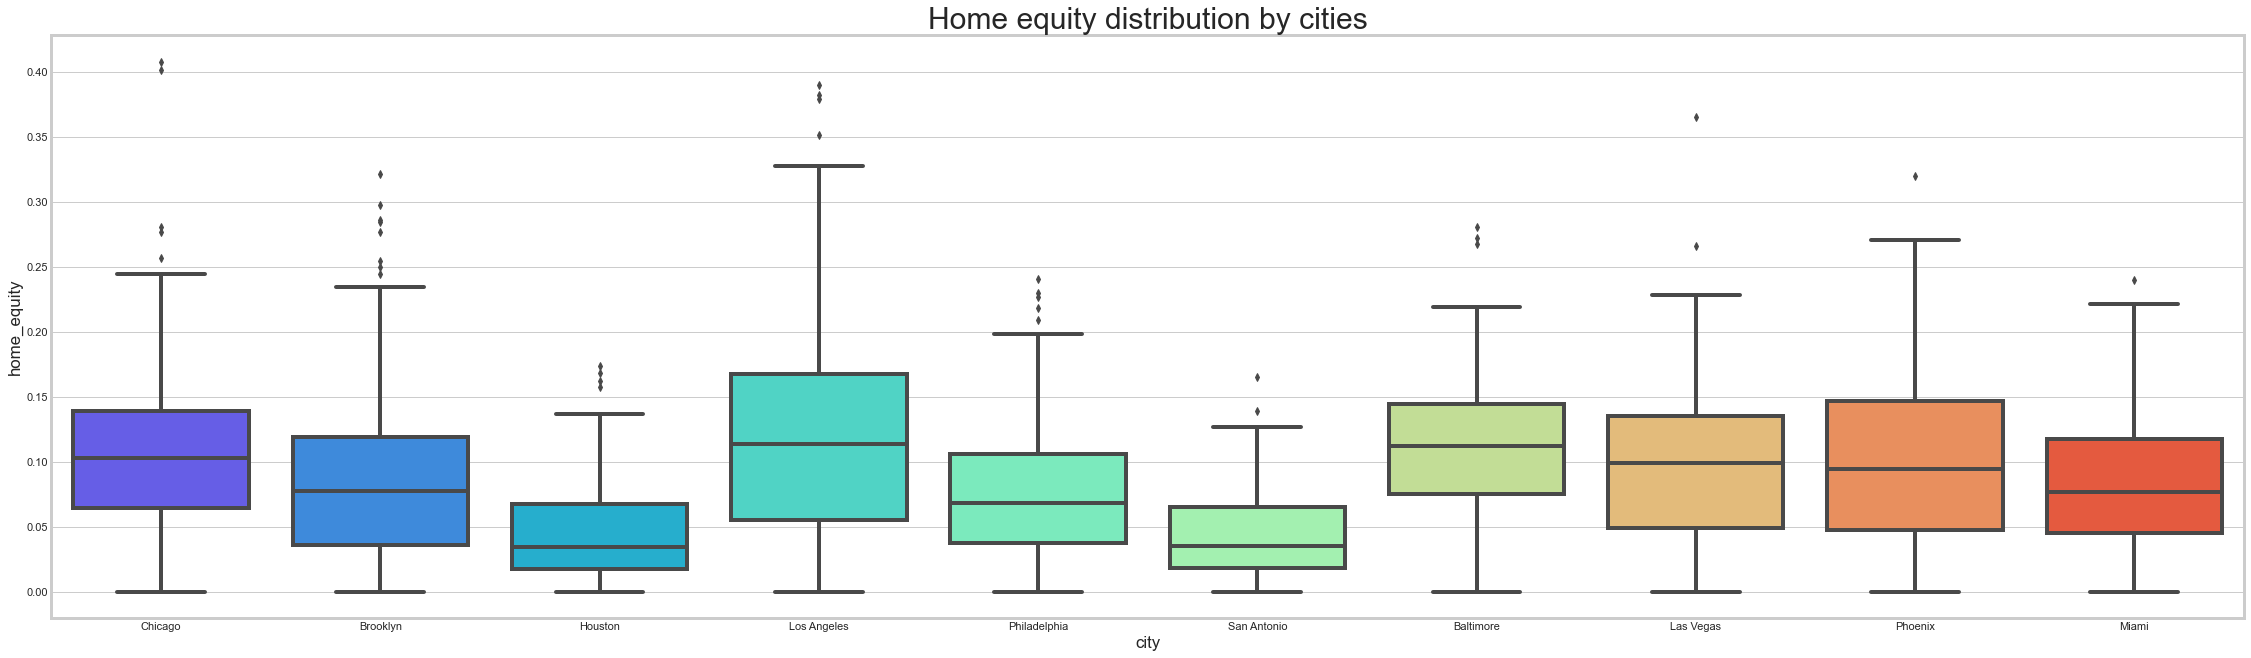

In [363]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_df,palette='rainbow', 
            order = ['Chicago', 'Brooklyn', 'Houston', 'Los Angeles', 'Philadelphia', 'San Antonio', 'Baltimore', 
                     'Las Vegas', 'Phoenix', 'Miami']).set_title('Home equity distribution by cities', fontsize = 30)
plt.show()

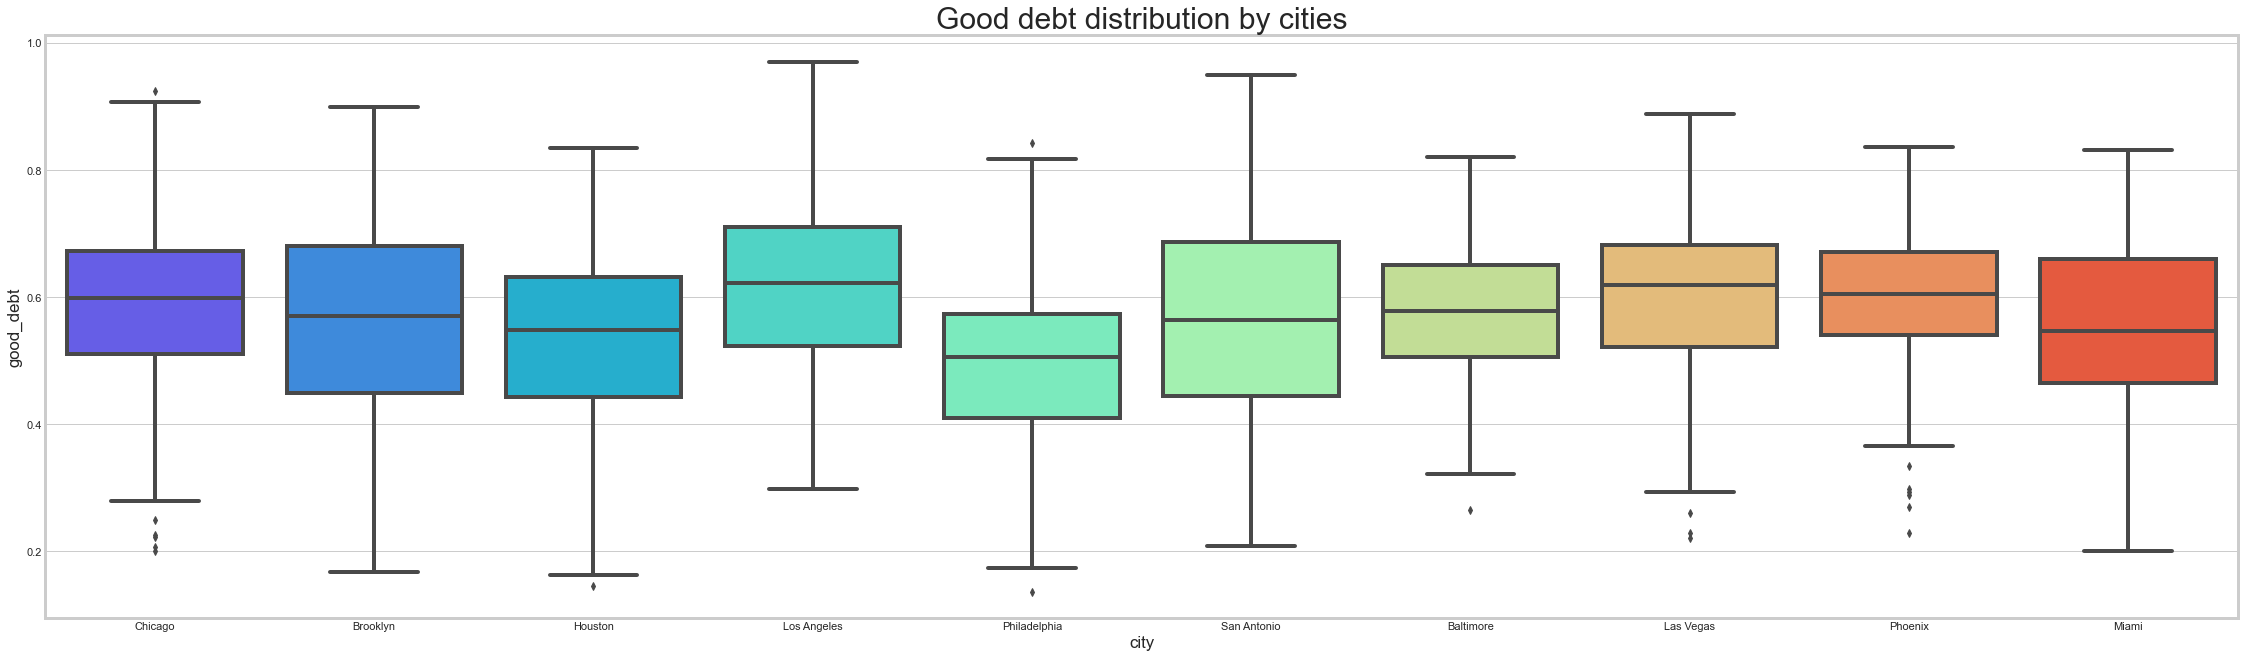

In [364]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='good_debt',data=boxplot_df,palette='rainbow', 
            order = ['Chicago', 'Brooklyn', 'Houston', 'Los Angeles', 'Philadelphia', 'San Antonio', 'Baltimore', 
                     'Las Vegas', 'Phoenix', 'Miami']).set_title('Good debt distribution by cities', fontsize = 30)
plt.show()

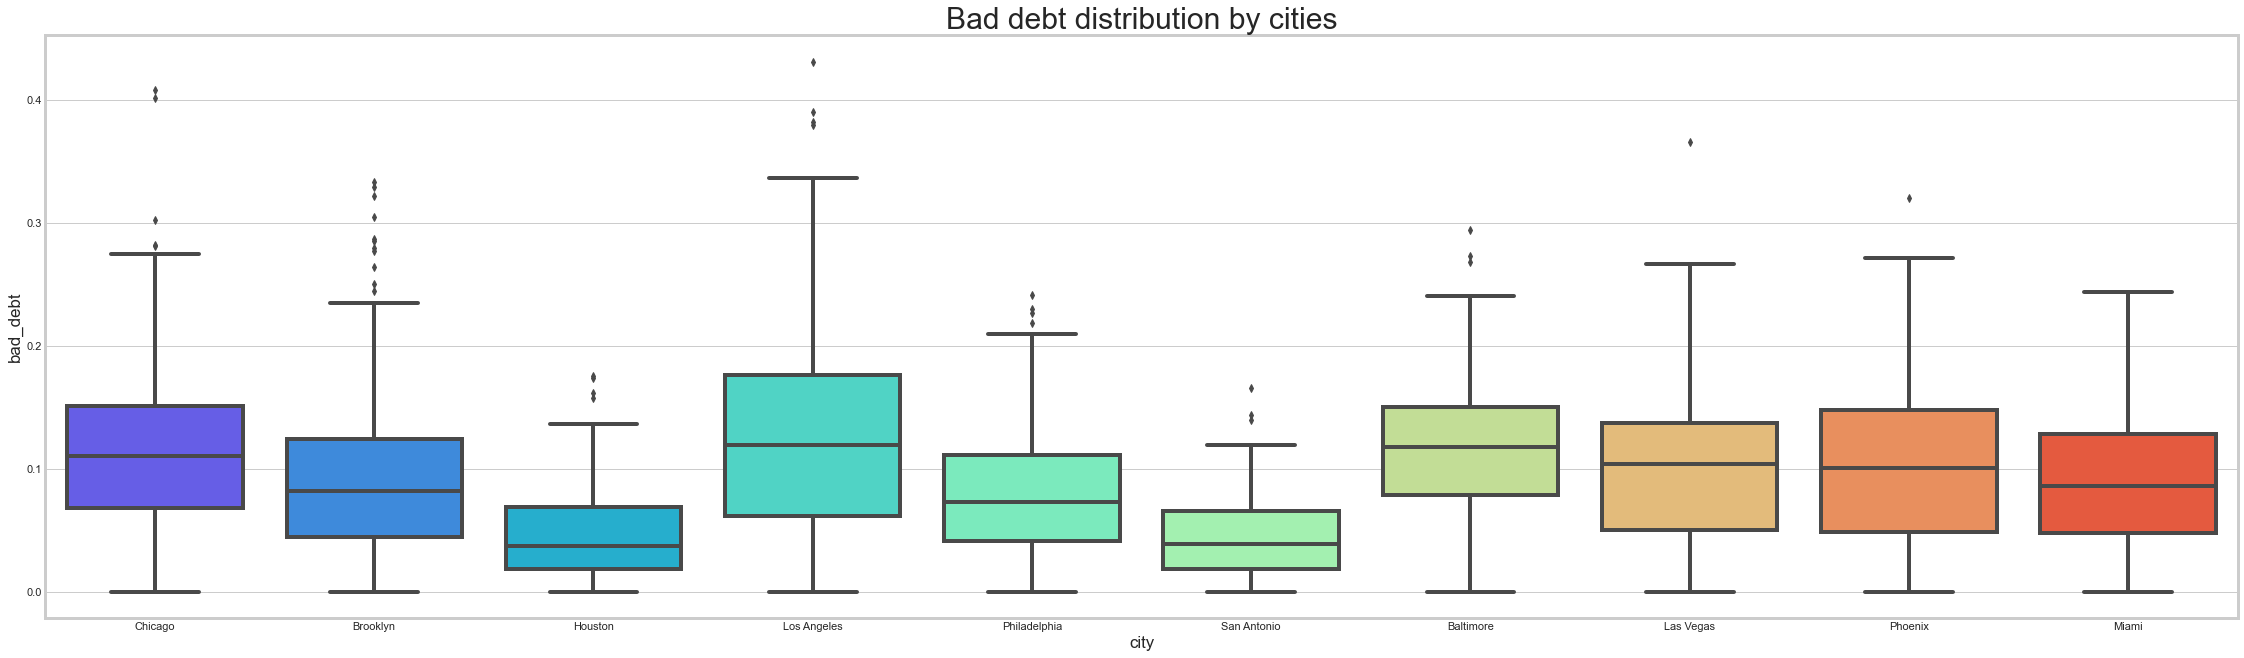

In [365]:
sns.set_style("whitegrid")

plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='bad_debt',data=boxplot_df,palette='rainbow', 
            order = ['Chicago', 'Brooklyn', 'Houston', 'Los Angeles', 'Philadelphia', 'San Antonio', 'Baltimore', 
                     'Las Vegas', 'Phoenix', 'Miami']).set_title('Bad debt distribution by cities', fontsize = 30)
plt.show()

- Since it is difficult to show 2500 locations, for better readability, I have limited it to Top 10 cities.

### Creating a collated income distribution chart for family income, house hold income and remaining income.

In [366]:
df_pop['remaining_income'] = df_pop['family_median'] - df_pop['hi_median']

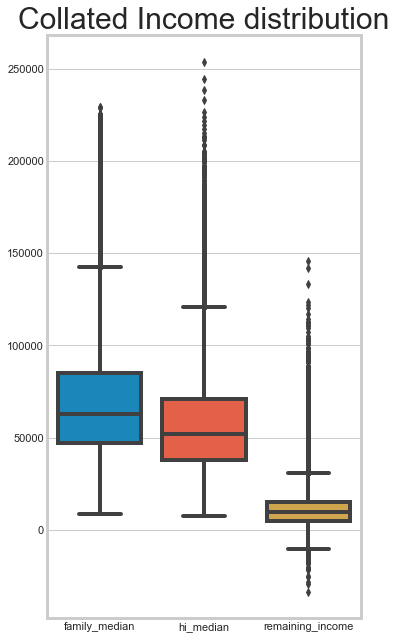

In [367]:
sns.set_style("whitegrid")
plt.figure(figsize = (5, 10))
sns.boxplot(data=df_pop[['family_median', 'hi_median', 'remaining_income']], 
            palette=color_pal).set_title('Collated Income distribution', fontsize = 30)
plt.show()

## Performing EDA & coming out with insights into population density & age :

In [368]:
#creating a new column named Population density
df_pop["population_density"] = df_pop['pop']/df_pop['ALand']
df_pop.head()

UID  COUNTYID  STATEID          state state_ab         city  \
3285   289712       147       51       Virginia       VA    Farmville   
11980  251185        27       25  Massachusetts       MA    Worcester   
26018  269323        81       36       New York       NY       Corona   
7829   251324         3       24       Maryland       MD  Glen Burnie   
2077   235788        57       12        Florida       FL        Tampa   

                 place  type primary  zip_code  area_code        lat  \
3285         Farmville  Town   tract     23901        434  37.297357   
11980   Worcester City  City   tract      1610        508  42.254262   
26018     Harbor Hills  City   tract     11368        718  40.751809   
7829       Glen Burnie   CDP   tract     21061        410  39.127273   
2077   Egypt Lake-leto  City   tract     33614        813  28.029063   

             lng      ALand  AWater   pop  male_pop  female_pop   rent_mean  \
3285  -78.396452   413391.0       0  1733       609        1124   782.00000   
11980 -71.800347   797165.0       0  2133      1139         994   942.32740   
26018 -73.853582   169666.0       0  4181      2249        1932  1413.12357   
7829  -76.635265  1110282.0       0  4866      1985        2881  1335.49818   
2077  -82.495395  2050906.0  234794  5468      2784        2684   914.10322   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
3285         781.0    22.95830            11.00000          11.0     1.00000   
11980        953.0   304.34109           333.88019         645.0     0.98906   
26018       1388.0   499.47343           205.65925         777.0     1.00000   
7829        1335.0   336.92824           352.62444        1502.0     1.00000   
2077         880.0   191.64962          1067.77502        1847.0     0.96619   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
3285      1.00000     1.00000     1.00000     1.00000     1.00000     1.00000   
11980     0.97813     0.86250     0.81563     0.68438     0.53281     0.47500   
26018     0.92664     0.80952     0.69241     0.58301     0.44659     0.37967   
7829      0.91545     0.77763     0.60186     0.49001     0.42011     0.38016   
2077      0.92794     0.80820     0.58925     0.44235     0.37140     0.22783   

       rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
3285      0.00000                11            11  33088.92156    23236.0   
11980     0.39063               655           640  39036.18368    29037.0   
26018     0.30245               821           777  56434.63436    46106.0   
7829      0.23435              1502          1502  59466.62302    50164.0   
2077      0.17350              1965          1804  48495.17313    38340.0   

          hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
3285   19970.41249          16.33316        19.0  47067.92731        59954.0   
11980  42317.65457         599.87224       768.0  50471.95789        40476.0   
26018  47279.53535         674.74625       997.0  48558.91165        40462.0   
7829   37351.26266        1293.31194      2068.0  64899.68626        50705.0   
2077   41137.53473        1664.02791      2179.0  52332.06236        39980.0   

       family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
3285    24030.19608               5.33316             8.0        2249.50000   
11980   45794.28515             314.09134           432.0        1596.15811   
26018   35569.90113             630.41529           878.0        3037.81395   
7829    39727.56212             706.84520          1125.0        1622.29005   
2077    41386.75431             755.11681          1010.0        1641.00508   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
3285               2249.0          182.57419                    0.79359   
11980              1690.0          465.71234                   30.05003   
26018              3320.0          888.70919       

In [369]:
#creating a new column named median age
df_pop["median_age"] = (df_pop['male_age_median'] * df_pop['male_pop'] + df_pop['female_age_median'] * df_pop['female_pop'])  / df_pop['pop']

df_pop.head()

UID  COUNTYID  STATEID          state state_ab         city  \
3285   289712       147       51       Virginia       VA    Farmville   
11980  251185        27       25  Massachusetts       MA    Worcester   
26018  269323        81       36       New York       NY       Corona   
7829   251324         3       24       Maryland       MD  Glen Burnie   
2077   235788        57       12        Florida       FL        Tampa   

                 place  type primary  zip_code  area_code        lat  \
3285         Farmville  Town   tract     23901        434  37.297357   
11980   Worcester City  City   tract      1610        508  42.254262   
26018     Harbor Hills  City   tract     11368        718  40.751809   
7829       Glen Burnie   CDP   tract     21061        410  39.127273   
2077   Egypt Lake-leto  City   tract     33614        813  28.029063   

             lng      ALand  AWater   pop  male_pop  female_pop   rent_mean  \
3285  -78.396452   413391.0       0  1733       609        1124   782.00000   
11980 -71.800347   797165.0       0  2133      1139         994   942.32740   
26018 -73.853582   169666.0       0  4181      2249        1932  1413.12357   
7829  -76.635265  1110282.0       0  4866      1985        2881  1335.49818   
2077  -82.495395  2050906.0  234794  5468      2784        2684   914.10322   

       rent_median  rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  \
3285         781.0    22.95830            11.00000          11.0     1.00000   
11980        953.0   304.34109           333.88019         645.0     0.98906   
26018       1388.0   499.47343           205.65925         777.0     1.00000   
7829        1335.0   336.92824           352.62444        1502.0     1.00000   
2077         880.0   191.64962          1067.77502        1847.0     0.96619   

       rent_gt_15  rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  \
3285      1.00000     1.00000     1.00000     1.00000     1.00000     1.00000   
11980     0.97813     0.86250     0.81563     0.68438     0.53281     0.47500   
26018     0.92664     0.80952     0.69241     0.58301     0.44659     0.37967   
7829      0.91545     0.77763     0.60186     0.49001     0.42011     0.38016   
2077      0.92794     0.80820     0.58925     0.44235     0.37140     0.22783   

       rent_gt_50  universe_samples  used_samples      hi_mean  hi_median  \
3285      0.00000                11            11  33088.92156    23236.0   
11980     0.39063               655           640  39036.18368    29037.0   
26018     0.30245               821           777  56434.63436    46106.0   
7829      0.23435              1502          1502  59466.62302    50164.0   
2077      0.17350              1965          1804  48495.17313    38340.0   

          hi_stdev  hi_sample_weight  hi_samples  family_mean  family_median  \
3285   19970.41249          16.33316        19.0  47067.92731        59954.0   
11980  42317.65457         599.87224       768.0  50471.95789        40476.0   
26018  47279.53535         674.74625       997.0  48558.91165        40462.0   
7829   37351.26266        1293.31194      2068.0  64899.68626        50705.0   
2077   41137.53473        1664.02791      2179.0  52332.06236        39980.0   

       family_stdev  family_sample_weight  family_samples  hc_mortgage_mean  \
3285    24030.19608               5.33316             8.0        2249.50000   
11980   45794.28515             314.09134           432.0        1596.15811   
26018   35569.90113             630.41529           878.0        3037.81395   
7829    39727.56212             706.84520          1125.0        1622.29005   
2077    41386.75431             755.11681          1010.0        1641.00508   

       hc_mortgage_median  hc_mortgage_stdev  hc_mortgage_sample_weight  \
3285               2249.0          182.57419                    0.79359   
11980              1690.0          465.71234                   30.05003   
26018              3320.0          888.70919       

In [370]:
df_pop.shape

(26215, 84)

In [371]:
grouped_df2 = df_pop.groupby("place")
#calculate the averages
density_mean_df = grouped_df2.mean()
density_mean_df = density_mean_df.reset_index()
density_mean_df.sort_values("population_density", ascending = False, inplace = True)

In [372]:
density_mean_df.head()

place            UID   COUNTYID  STATEID      zip_code  \
9397  West New York  263686.000000  17.000000     34.0   7090.600000   
6749   Pelham Manor  266279.073171   7.731707     36.0  10442.170732   
6065  New York City  268124.114355  58.897810     36.0  11019.703163   
3534     Guttenberg  263673.000000  17.000000     34.0   7074.600000   
3869   Hoboken City  263649.333333  17.000000     34.0   7159.333333   

       area_code        lat        lng          ALand         AWater  \
9397  201.000000  40.782705 -74.017704  222111.200000       0.000000   
6749  682.512195  40.841320 -73.867621  298302.707317   37782.439024   
6065  652.029197  40.676638 -73.954562  319667.571776   51463.737226   
3534  201.000000  40.793572 -74.006911  265261.800000  105465.200000   
3869  201.000000  40.747775 -74.041108  326438.333333    5284.444444   

              pop     male_pop   female_pop    rent_mean  rent_median  \
9397  5050.200000  2511.200000  2539.000000  1162.259002  1137.000000   
6749  3994.000000  1845.414634  2148.585366  1203.362318  1181.243902   
6065  3775.260341  1804.060827  1971.199513  1473.639762  1442.574209   
3534  4545.000000  2179.000000  2366.000000  1636.453850  1569.200000   
3869  4694.666667  2282.000000  2412.666667  1440.311460  1404.111111   

      rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
9397  464.796138          584.277416   1493.200000    0.979064    0.894584   
6749  452.020770          435.760891   1087.658537    0.967115    0.893783   
6065  565.666603          275.228792    921.038929    0.950093    0.866289   
3534  610.853568          233.331962    825.800000    0.954318    0.830924   
3869  648.175106          478.638470   1263.000000    0.958832    0.874323   

      rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
9397    0.795550    0.684530    0.582650    0.496846    0.429588    0.309610   
6749    0.800241    0.693904    0.590978    0.496035    0.435634    0.341222   
6065    0.754370    0.634043    0.529436    0.447912    0.387028    0.301024   
3534    0.701378    0.576524    0.469410    0.388840    0.300516    0.252056   
3869    0.746710    0.584113    0.464181    0.351701    0.271139    0.196496   

      universe_samples  used_samples       hi_mean     hi_median  \
9397       1516.200000   1450.400000  55590.418086  41103.000000   
6749       1111.268293   1070.439024  58502.622750  44428.682927   
6065        949.338200    896.746959  82425.185626  65847.486618   
3534        848.800000    825.800000  88329.129176  72075.600000   
3869       1275.333333   1216.666667  89004.074107  70306.333333   

          hi_stdev  hi_sample_weight   hi_samples    family_mean  \
9397  51266.212952       1218.981086  1860.400000   57208.755690   
6749  51355.127323        939.580236  1471.439024   64546.811042   
6065  67056.203377        744.123631  1475.080292   92065.692741   
3534  65439.035304        810.847998  1557.400000   97516.064360   
3869  74942.450419        930.627410  1803.555556  100197.929923   

      family_median  family_stdev  family_sample_weight  family_samples  \
9397   44331.200000  45848.033086            772.543936     1208.200000   
6749   53212.658537  48590.980901            538.037229      912.682927   
6065   82691.712895  60500.817065            398.367443      838.980535   
3534   89319.800000  60208.247404            523.081900     1036.600000   
3869   91931.111111  66737.670501            495.875977      990.000000   

      hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
9397       2735.812492         2672.600000         831.971622   
6749       2178.254525         2069.463415         812.845129   
6065       2647.758185         2620.335766         947.457923   
3534       2708.331912         2642.000000        1078.608570   
3869       2733.185264         2618.777778         932.604053   

      hc_mortgage_sample_weight  hc_mortgage_samples      hc_mean  \
9397                  49.05795

- Hence the top 10 places as per population_density in decreasing order is: 'West New York', 'Pelham Manor', 'Mount Vernon City', 'New York City', 'Guttenberg', 'Harbor Hills', 'Hoboken City', 'Sausalito City', 'San Rafael City', 'Jersey City City'.

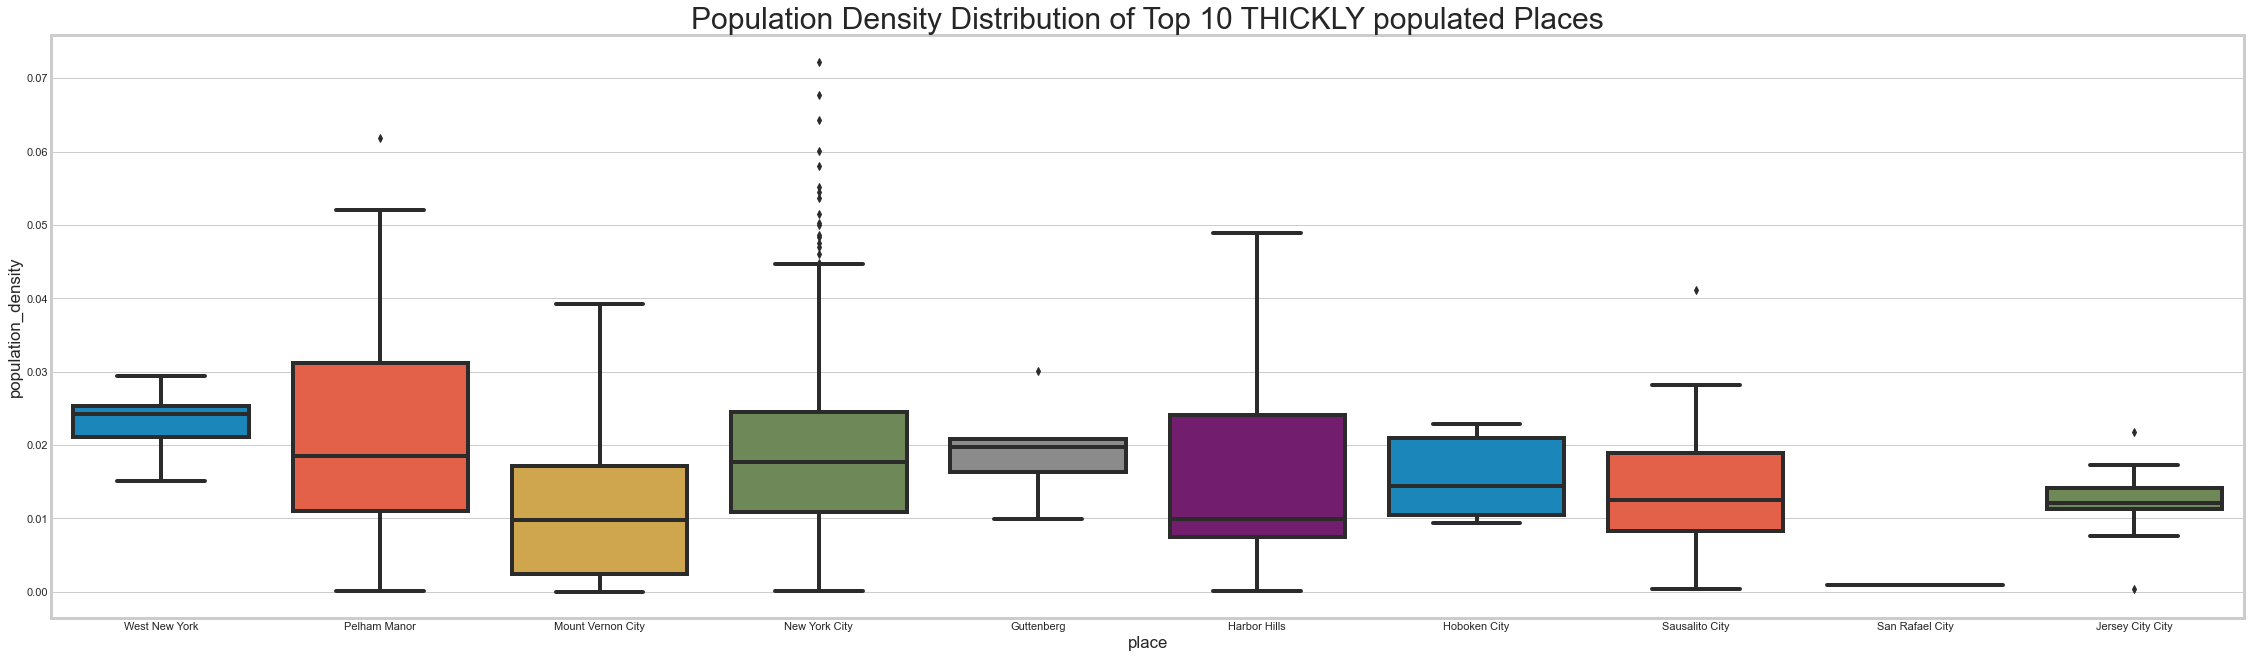

In [373]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'place', y = 'population_density', data=df_pop.nlargest(26718, 'population_density'), 
            palette=color_pal, order = ['West New York', 'Pelham Manor', 'Mount Vernon City', 
                                        'New York City', 'Guttenberg', 'Harbor Hills', 'Hoboken City', 
                                        'Sausalito City', 'San Rafael City', 'Jersey City City']).set_title('Population Density Distribution of Top 10 THICKLY populated Places', fontsize = 30)
plt.show()

In [374]:
grouped_df3 = df_pop.groupby("state")
#calculate the averages
density_mean_df2 = grouped_df3.mean()
density_mean_df2 = density_mean_df2.reset_index()
density_mean_df2.sort_values("population_density", ascending = False, inplace = True)
density_mean_df2.head(10)

state            UID   COUNTYID  STATEID      zip_code  \
32              New York  268436.077068  62.780702     36.0  12088.854637   
8   District of Columbia  234121.793651   1.000000     11.0  20012.238095   
11                Hawaii  240818.892857   3.625000     15.0  96772.866071   
30            New Jersey  263728.705795  18.893016     34.0   7852.398217   
4             California  227977.212596  55.326174      6.0  92978.605388   
21         Massachusetts  250523.091760  16.629213     25.0   1997.299625   
13              Illinois  243679.796143  77.789715     17.0  60933.877870   
39           Puerto Rico  279361.441472  77.605351     72.0    792.143813   
38          Pennsylvania  277327.528381  63.335559     42.0  17582.871452   
40          Rhode Island  279970.931818   6.318182     44.0   2876.818182   

     area_code        lat         lng         ALand        AWater  \
32  632.058897  41.578063  -74.734822  2.719271e+07  1.215442e+06   
8   207.365079  38.907685  -77.007544  8.434634e+05  2.669059e+04   
11  808.000000  21.102924 -157.442964  3.881117e+07  2.592509e+06   
30  717.251114  40.398053  -74.452933  1.095862e+07  7.206464e+05   
4   640.461230  35.539009 -119.439241  4.882039e+07  1.082502e+06   
21  661.938202  42.262158  -71.331275  1.383712e+07  1.514014e+06   
13  650.797980  41.266013  -88.382401  4.337287e+07  5.995487e+05   
39  787.000000  18.278745  -66.325800  9.505979e+06  6.524141e+05   
38  550.853923  40.461056  -77.013728  3.395254e+07  4.566379e+05   
40  401.000000  41.742687  -71.443690  1.187643e+07  7.766359e+05   

            pop     male_pop   female_pop    rent_mean  rent_median  \
32  4029.299499  1955.720551  2073.578947  1271.721203  1230.568296   
8   3798.047619  1781.047619  2017.000000  1416.399908  1326.158730   
11  4899.839286  2442.919643  2456.919643  1681.996440  1616.392857   
30  4478.114413  2170.742942  2307.371471  1389.959943  1339.985141   
4   4891.438296  2419.229705  2472.208591  1489.102639  1438.642155   
21  4640.295880  2258.352060  2381.943820  1223.189925  1175.882022   
13  4137.521579  2028.919192  2108.602388  1038.797844   987.728191   
39  3936.377926  1888.451505  2047.926421   526.673971   492.628763   
38  3915.058431  1906.074290  2008.984140   949.566621   900.675292   
40  4305.477273  2077.318182  2228.159091  1044.255423   986.147727   

    rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
32  476.467343          245.322914    593.949875    0.957529    0.868045   
8   630.259117          315.187220    935.952381    0.946842    0.850060   
11  607.903490          183.314567    571.375000    0.973181    0.899392   
30  500.921846          179.706585    521.105498    0.963412    0.890258   
4   541.436820          225.852060    674.604296    0.969906    0.905441   
21  529.967906          282.966484    649.692884    0.959682    0.871036   
13  389.715972          278.428185    507.189164    0.957911    0.863121   
39  244.308943          222.334994    257.207358    0.968822    0.896129   
38  363.206278          271.558898    447.244574    0.954104    0.852951   
40  441.713687          329.823765    638.590909    0.964556    0.873433   

    rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
32    0.751784    0.634672    0.526339    0.442472    0.379079    0.291604   
8     0.733110    0.601082    0.481240    0.396121    0.333405    0.260723   
11    0.796539    0.671492    0.548564    0.446280    0.368232    0.271972   
30    0.772873    0.648059    0.532189    0.439917    0.376119    0.279576   
4     0.797237    0.674193    0.559367    0.463971    0.390495    0.287296   
21    0.736395    0.604190    0.481182    0.384384    0.318755    0.237130   
13    0.726159    0.601367    0.489110    0.401878    0.339881    0.255890   
39    0.791646    0.684143    0.580410    0.480753    0.411446    0.318260   
38    0.725455    0.599057    0.484411    0.399524    0.334986    0.246156   
40    0.7476

- Hence the top 10 States as per population_density in decreasing order is: 'New York', 'District of Columbia', 'Hawaii', 'California', 'New Jersey	', 'Massachusetts', 'Illinois', 'Puerto Rico', 'Pennsylvania', 'Rhode Island'.

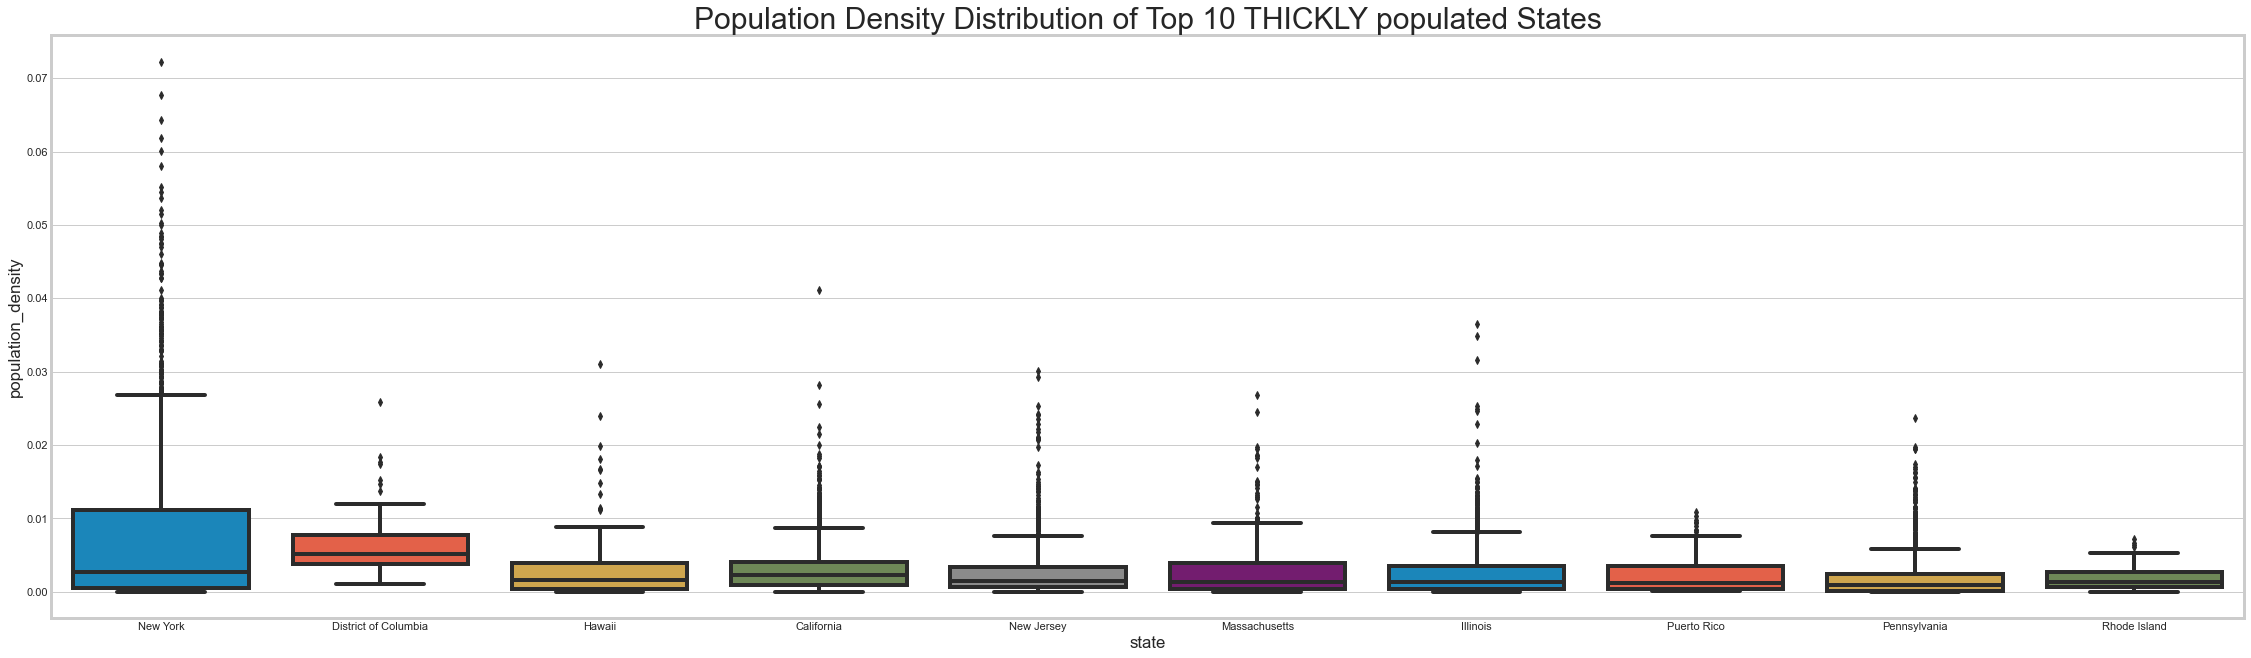

In [375]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'state', y = 'population_density', data=df_pop.nlargest(26718, 'population_density'), palette=color_pal, 
            order = ['New York', 'District of Columbia', 'Hawaii', 'California', 'New Jersey', 
                     'Massachusetts', 'Illinois', 'Puerto Rico', 'Pennsylvania', 'Rhode Island']).set_title('Population Density Distribution of Top 10 THICKLY populated States', fontsize = 30)
plt.show()

In [376]:
grouped_df4 = df_pop.groupby("state")
#calculate the averages
density_mean_df3 = grouped_df4.mean()
density_mean_df3 = density_mean_df3.reset_index()
density_mean_df3.sort_values("population_density", ascending = True, inplace = True)
density_mean_df3.head(10)

state            UID   COUNTYID  STATEID      zip_code  \
46         Vermont  290767.360656  16.114754     50.0   5465.606557   
24     Mississippi  258899.665289  74.900826     28.0  39194.847107   
42    South Dakota  281297.022727  71.454545     46.0  57353.522727   
49   West Virginia  293960.017857  52.047619     54.0  26134.333333   
51         Wyoming  294265.285714  20.535714     56.0  82514.232143   
3         Arkansas  222036.764259  81.707224      5.0  72212.828897   
0          Alabama  221083.545679  75.093827      1.0  35877.449383   
26         Montana  259372.290598  55.700855     30.0  59513.290598   
19           Maine  252845.922481  14.379845     23.0   4416.054264   
41  South Carolina  280626.974293  48.239075     45.0  29481.449871   

     area_code        lat         lng         ALand        AWater  \
46  802.000000  44.011676  -72.708066  1.293761e+08  6.406176e+06   
24  594.020661  32.621580  -89.644605  2.017618e+08  3.247199e+06   
42  605.000000  44.130921  -99.036957  8.981616e+08  1.740448e+07   
49  309.327381  38.819237  -80.704743  1.384913e+08  1.102950e+06   
51  307.000000  42.733739 -107.033820  1.756609e+09  1.039265e+07   
3   642.577947  35.008709  -92.585935  1.909262e+08  4.050010e+06   
0   266.192593  32.988929  -86.744199  1.235813e+08  2.971434e+06   
26  406.000000  46.834311 -110.990034  1.480726e+09  1.605503e+07   
19  210.069767  44.446803  -69.598019  2.597895e+08  2.360637e+07   
41  836.933162  34.029627  -81.030649  7.562962e+07  2.587885e+06   

            pop     male_pop   female_pop   rent_mean  rent_median  \
46  3405.852459  1666.295082  1739.557377  929.915528   900.245902   
24  4429.128099  2149.904959  2279.223140  736.310508   712.000000   
42  3610.625000  1814.556818  1796.068182  683.843038   632.863636   
49  3990.648810  1977.583333  2013.065476  667.193267   635.345238   
51  4740.607143  2395.017857  2345.589286  859.309423   806.964286   
3   4292.064639  2103.524715  2188.539924  715.692905   677.505703   
0   4149.019753  2020.130864  2128.888889  768.586228   735.488889   
26  3620.905983  1801.085470  1819.820513  763.491450   697.495726   
19  3677.651163  1790.503876  1887.147287  829.229487   792.891473   
41  4398.431877  2123.655527  2274.776350  854.489513   808.444730   

    rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
46  384.603363          222.653803    367.016393    0.972113    0.882473   
24  282.523415          333.215545    440.909091    0.955761    0.861870   
42  327.697583          344.757033    428.159091    0.904598    0.778321   
49  268.371739          298.455792    365.803571    0.926876    0.811588   
51  351.918266          327.335812    500.571429    0.917755    0.783039   
3   274.222674          404.578821    506.326996    0.955153    0.850397   
0   292.538726          318.590099    424.975309    0.950217    0.844232   
26  355.891896          311.123212    426.786325    0.927821    0.813145   
19  355.305687          297.219704    437.527132    0.956557    0.871038   
41  329.156826          312.492743    466.560411    0.964781    0.870974   

    rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
46    0.760799    0.625181    0.493152    0.403232    0.322064    0.235576   
24    0.741378    0.624300    0.528466    0.436038    0.374864    0.273807   
42    0.617985    0.472501    0.369148    0.289537    0.236497    0.168770   
49    0.690109    0.567364    0.455353    0.366305    0.310594    0.236608   
51    0.615821    0.467770    0.351267    0.285108    0.233705    0.163661   
3     0.707424    0.590110    0.478758    0.392713    0.325547    0.237332   
0     0.719238    0.607492    0.501060    0.417547    0.348566    0.257710   
26    0.672147    0.540339    0.436652    0.357301    0.293947    0.204076   
19    0.755158    0.637197    0.509674    0.410717    0.346495    0.258681   
41    0.746778    0.622730    0.512992    0.425337    0.358254    0.265872   

    

- Hence the top 10 states as per population_density in increasing order is: 'Vermont', 'Mississippi', 'South Dakota', 'West Virginia', 'Wyoming', 'Arkansas', 'Alabama', 'Montana', 'Maine', 'South Carolina'.

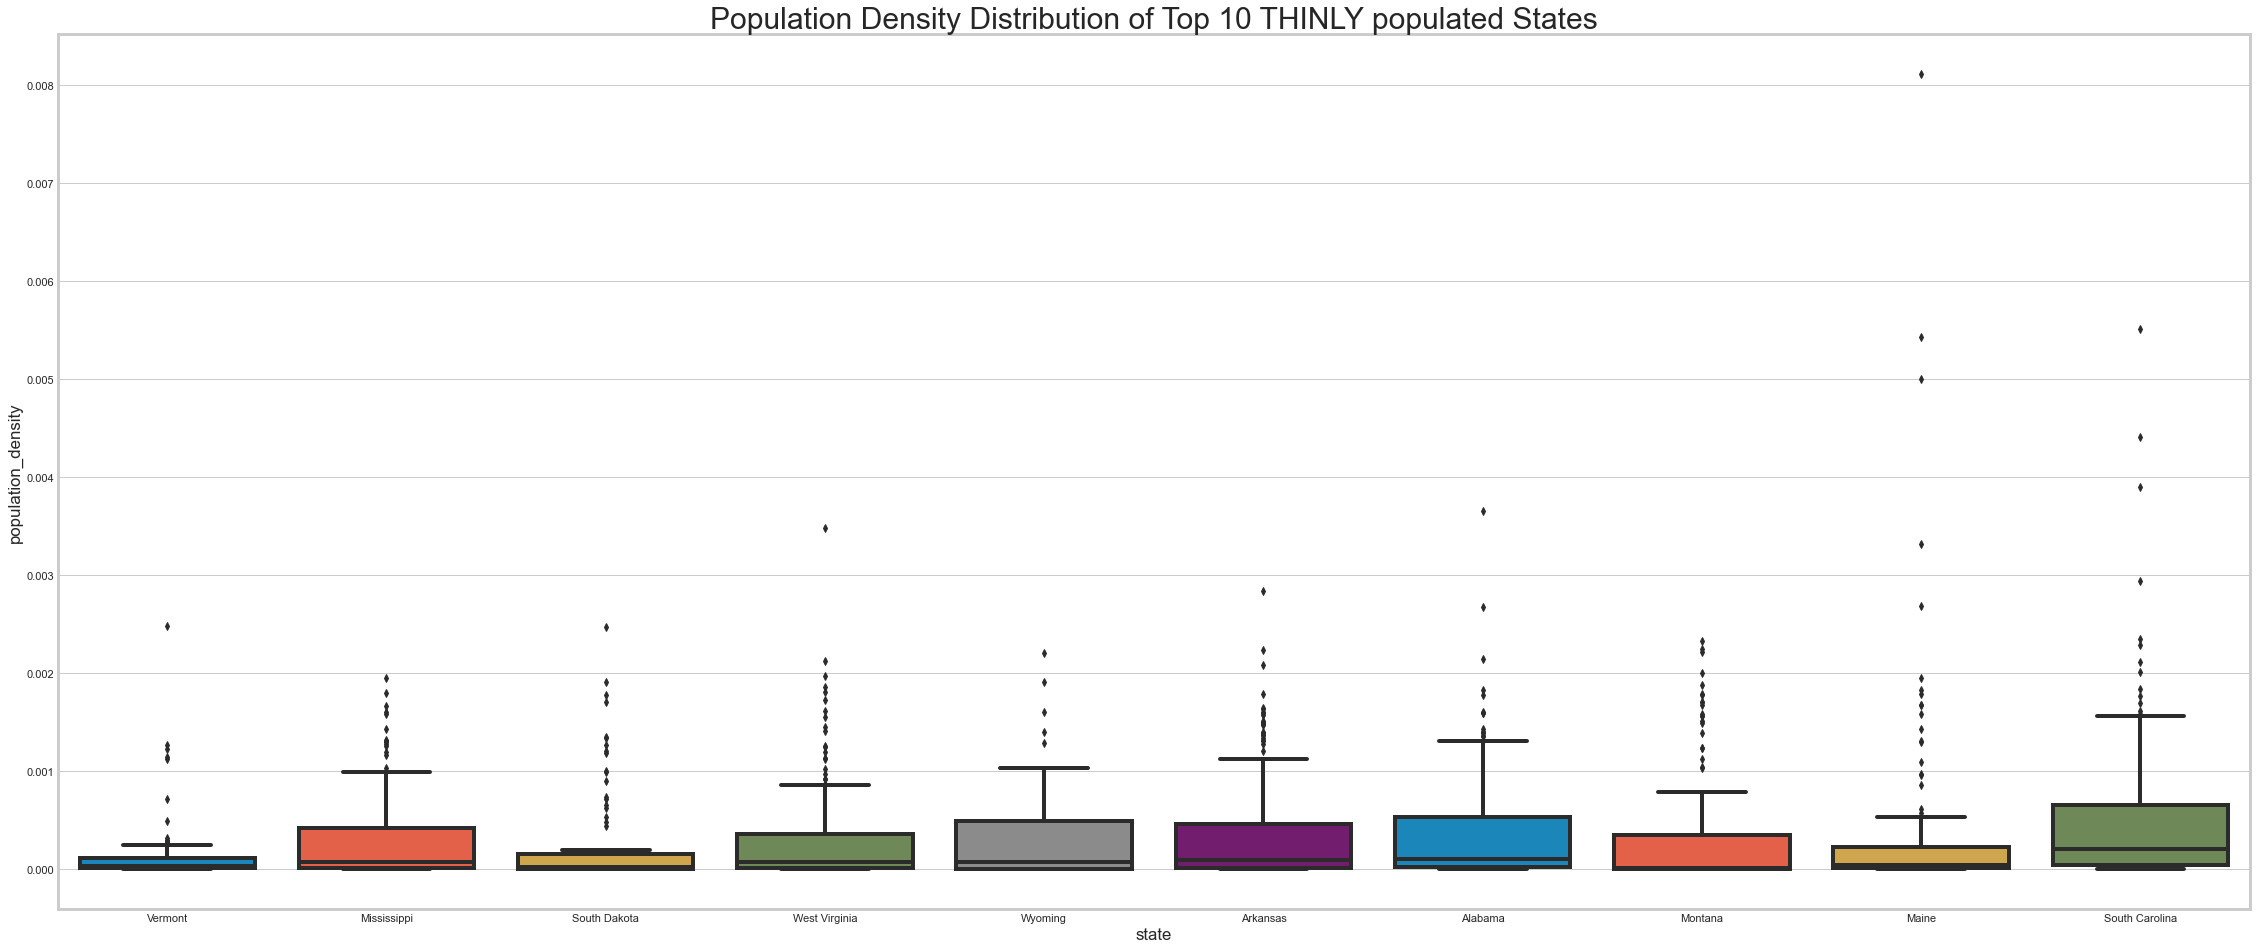

In [377]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))
sns.boxplot(x = 'state', y = 'population_density', data=df_pop.nsmallest(26718, 'population_density'), palette=color_pal, 
            order = ['Vermont', 'Mississippi', 'South Dakota', 'West Virginia', 'Wyoming', 'Arkansas', 'Alabama', 
                     'Montana', 'Maine', 'South Carolina']).set_title('Population Density Distribution of Top 10 THINLY populated States', fontsize = 30)
plt.show()

In [378]:
grouped_df5 = df_pop.loc[df_pop["state"] == "New York"].groupby("place")
#calculate the averages
density_mean_df4 = grouped_df5.mean()
density_mean_df4 = density_mean_df4.reset_index()
density_mean_df4.sort_values("population_density", ascending = False, inplace = True)
density_mean_df4.head(10)

place            UID   COUNTYID  STATEID      zip_code  \
385         Pelham Manor  266279.073171   7.731707     36.0  10442.170732   
335        New York City  268124.114355  58.897810     36.0  11019.703163   
322    Mount Vernon City  267595.187500  38.687500     36.0  10426.218750   
193         Harbor Hills  269516.700000  80.450000     36.0  11353.275000   
35     Bellerose Terrace  269379.533333  80.633333     36.0  11407.316667   
229               Inwood  269362.176471  79.705882     36.0  11483.000000   
178     Great Neck Plaza  268038.000000  59.000000     36.0  11020.000000   
475  South Valley Stream  269019.875000  75.500000     36.0  11467.125000   
560         Yonkers City  269279.307692  83.923077     36.0  10650.076923   
433          Saddle Rock  267839.166667  43.000000     36.0  11061.166667   

      area_code        lat        lng          ALand        AWater  \
385  682.512195  40.841320 -73.867621  298302.707317  3.778244e+04   
335  652.029197  40.676638 -73.954562  319667.571776  5.146374e+04   
322  681.812500  40.883237 -73.881570  322362.000000  4.363634e+04   
193  712.950000  40.760761 -73.817985  403820.675000  5.048768e+04   
35   714.633333  40.711394 -73.785508  357595.566667  0.000000e+00   
229  706.117647  40.648389 -73.809210  621252.000000  1.625084e+05   
178  516.000000  40.786990 -73.725739  747987.000000  0.000000e+00   
475  667.500000  40.670755 -73.756423  700233.750000  7.067500e+02   
560  868.769231  40.923277 -73.890885  704815.230769  1.836002e+05   
433  718.000000  40.801478 -73.820996  781402.333333  1.824465e+06   

             pop     male_pop   female_pop    rent_mean  rent_median  \
385  3994.000000  1845.414634  2148.585366  1203.362318  1181.243902   
335  3775.260341  1804.060827  1971.199513  1473.639762  1442.574209   
322  4045.156250  1900.500000  2144.656250  1331.788792  1300.312500   
193  3973.400000  1930.125000  2043.275000  1496.614720  1488.750000   
35   3319.166667  1568.316667  1750.850000  1414.528508  1371.016667   
229  3650.764706  1753.470588  1897.294118  1378.720704  1356.117647   
178  6169.000000  2580.000000  3589.000000  1939.500760  1763.000000   
475  3661.500000  1733.375000  1928.125000  1447.509485  1427.375000   
560  3897.769231  1834.230769  2063.538462  1310.180991  1297.692308   
433  5003.000000  2599.500000  2403.500000  1705.352302  1677.166667   

     rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
385  452.020770          435.760891   1087.658537    0.967115    0.893783   
335  565.666603          275.228792    921.038929    0.950093    0.866289   
322  478.669998          295.035138    917.625000    0.962573    0.862094   
193  520.257296          214.539219    734.650000    0.978455    0.898700   
35   474.845436          157.921470    492.633333    0.969307    0.889244   
229  479.042175          134.344617    418.882353    0.974655    0.899195   
178  916.395600          261.581930   1422.000000    0.929700    0.837160   
475  546.586051           73.371290    279.625000    0.983916    0.873330   
560  539.677701          284.101905    731.615385    0.932224    0.848305   
433  479.319413           95.629563    480.333333    0.989755    0.844818   

     rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
385    0.800241    0.693904    0.590978    0.496035    0.435634    0.341222   
335    0.754370    0.634043    0.529436    0.447912    0.387028    0.301024   
322    0.740877    0.621710    0.525091    0.438639    0.381378    0.291372   
193    0.783679    0.688256    0.597345    0.508329    0.431208    0.347152   
35     0.790730    0.683975    0.570529    0.504066    0.444733    0.342399   
229    0.829156    0.743522    0.616884    0.500251    0.426789    0.350398   
178    0.707320    0.595410    0.527260    0.486370    0.436870    0.357960   
475    0.759831    0.712074    0.625644    0.476724    0.437340    0.287785   
560    0.716095    0.586333    0.494645    0.419

- Hence the top 10 Places in  'New York' state as per population_density in decreasing order is: 'Pelham Manor', 'New York City', 'Mount Vernon City', 'Harbor Hills', 'Bellerose Terrace', 'Inwood', 'Great Neck Plaza', 'South Valley Stream', 'Yonkers City', 'Saddle Rock'.

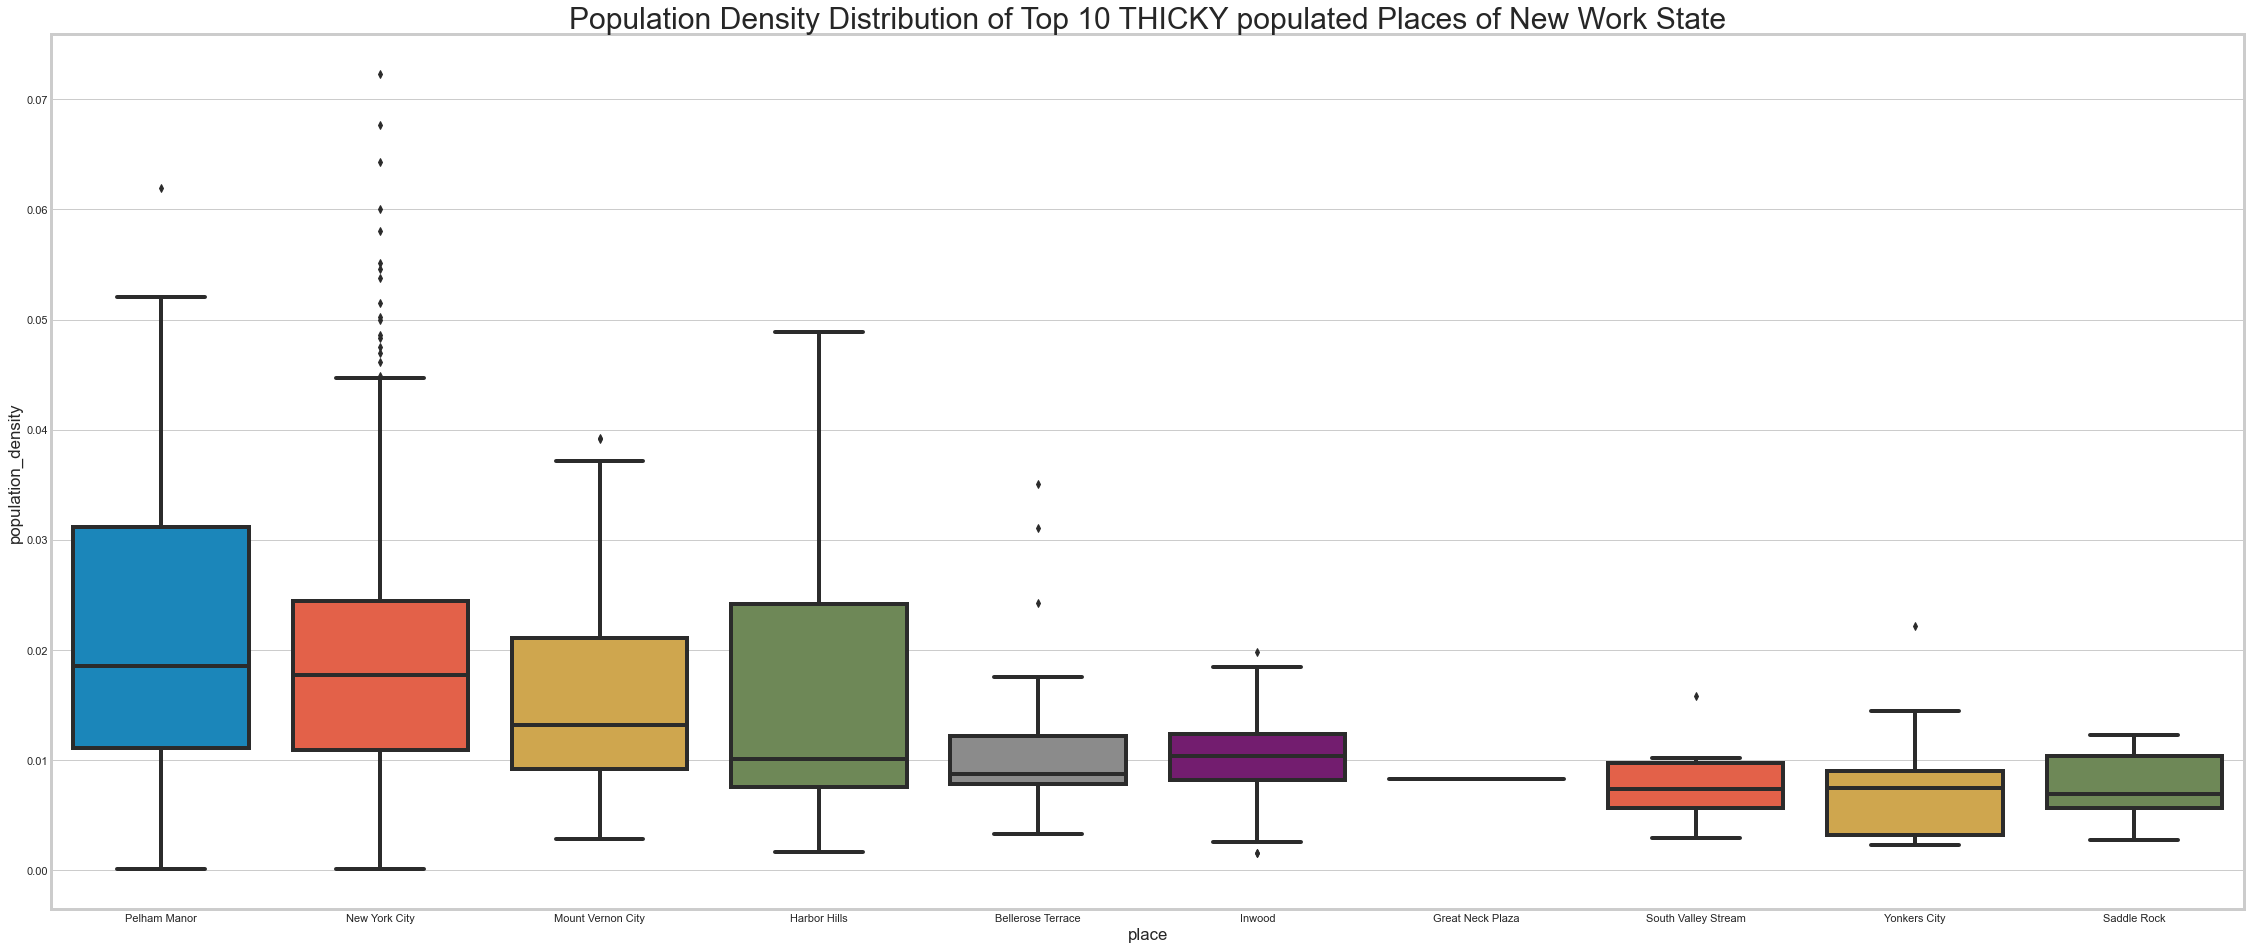

In [379]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))
sns.boxplot(x = 'place', y = 'population_density', data=df_pop[df_pop['state'] == 'New York'].nlargest(26718, 'population_density'), palette=color_pal, 
            order = ['Pelham Manor', 'New York City', 'Mount Vernon City', 'Harbor Hills', 
                     'Bellerose Terrace', 'Inwood', 'Great Neck Plaza', 'South Valley Stream', 
                     'Yonkers City', 'Saddle Rock']).set_title('Population Density Distribution of Top 10 THICKY populated Places of New Work State', fontsize = 30)
plt.show()

In [380]:
grouped_df6 = df_pop.loc[df_pop["state"] == "New York"].groupby("city")
#calculate the averages
density_mean_df5 = grouped_df6.mean()
density_mean_df5 = density_mean_df5.reset_index()
density_mean_df5.sort_values("population_density", ascending = False, inplace = True)
density_mean_df5.head(10)

city            UID   COUNTYID  STATEID      zip_code  \
311             New York  268414.816667  60.533333     36.0  10026.750000   
134             Elmhurst  269343.125000  81.000000     36.0  11373.000000   
220      Jackson Heights  269275.000000  81.000000     36.0  11372.000000   
102               Corona  269335.166667  81.000000     36.0  11368.000000   
423  South Richmond Hill  269138.500000  81.000000     36.0  11419.000000   
378            Ridgewood  269453.000000  81.000000     36.0  11385.000000   
153         Forest Hills  269538.000000  81.000000     36.0  11375.000000   
17               Astoria  269138.000000  81.000000     36.0  11103.500000   
123        East Elmhurst  269298.750000  81.000000     36.0  11369.000000   
51              Brooklyn  267428.325000  47.425000     36.0  11219.154167   

     area_code        lat        lng          ALand        AWater  \
311    270.100  40.761787 -73.973823  193866.466667  94860.316667   
134    718.000  40.741273 -73.878868  190066.750000      0.000000   
220    718.000  40.755518 -73.887169  315357.200000      0.000000   
102    718.000  40.745898 -73.856617  168251.166667      0.000000   
423    718.000  40.687962 -73.832806  161312.500000      0.000000   
378    718.000  40.706805 -73.902918  209776.200000      0.000000   
153    718.000  40.723048 -73.849272  184165.500000      0.000000   
17     718.000  40.767983 -73.915142  170744.500000      0.000000   
123    718.000  40.760487 -73.877956  215472.000000      0.000000   
51     708.425  40.650541 -73.952176  239198.233333  40821.850000   

             pop     male_pop  female_pop    rent_mean  rent_median  \
311  5662.533333  2638.383333   3024.1500  1967.425520  1924.716667   
134  4586.000000  2295.125000   2290.8750  1467.672822  1459.625000   
220  6670.000000  3327.200000   3342.8000  1370.731760  1379.000000   
102  4748.666667  2597.666667   2151.0000  1370.671165  1324.833333   
423  3558.000000  1760.000000   1798.0000  1438.904250  1476.500000   
378  4002.400000  1917.200000   2085.2000  1296.910054  1287.400000   
153  3451.875000  1655.250000   1796.6250  1564.925243  1487.250000   
17   3077.000000  1371.000000   1706.0000  1706.149135  1679.000000   
123  3486.500000  1737.250000   1749.2500  1391.673630  1387.250000   
51   3415.329167  1626.016667   1789.3125  1370.300643  1340.516667   

     rent_stdev  rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  \
311  890.197489          530.215579   1955.233333    0.870892    0.758674   
134  475.870303          232.196285    968.625000    0.974639    0.902096   
220  415.197952          426.338142   1599.400000    0.964130    0.914086   
102  511.107383          310.173867    975.833333    1.000000    0.933493   
423  391.484695           91.017440    409.000000    0.989625    0.912910   
378  392.358464          301.221372   1059.600000    0.956934    0.851442   
153  596.210309          218.065796    978.750000    0.968129    0.888841   
17   518.981270          188.318290   1130.500000    0.986765    0.893290   
123  417.371143          131.406990    483.000000    0.970718    0.932545   
51   530.132806          258.553397    780.591667    0.961781    0.885514   

     rent_gt_20  rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
311    0.635923    0.517703    0.415165    0.335701    0.282393    0.211392   
134    0.820399    0.712340    0.613836    0.546559    0.464735    0.351561   
220    0.834522    0.730670    0.635770    0.544028    0.455050    0.362130   
102    0.857610    0.770285    0.685277    0.591013    0.510540    0.421037   
423    0.863120    0.728690    0.634505    0.588635    0.518250    0.343680   
378    0.725008    0.608702    0.523056    0.448816    0.394484    0.314490   
153    0.763808    0.618737    0.492129    0.363940    0.319411    0.245734   
17     0.758590    0.630265    0.519705    0.441105    0.376805    0.288895   
123    0.824545    0.755872    0.664998    0.529075    0.470635    0.37

- Hence the top 10 Cities in 'New York' state as per population_density in decreasing order is: 'New York', 'Elmhurst', 'Jackson Heights', 'Corona', 'South Richmond Hill', 'Ridgewood', 'Forest Hills', 'Astoria', 'East Elmhurst', 'Brooklyn'.

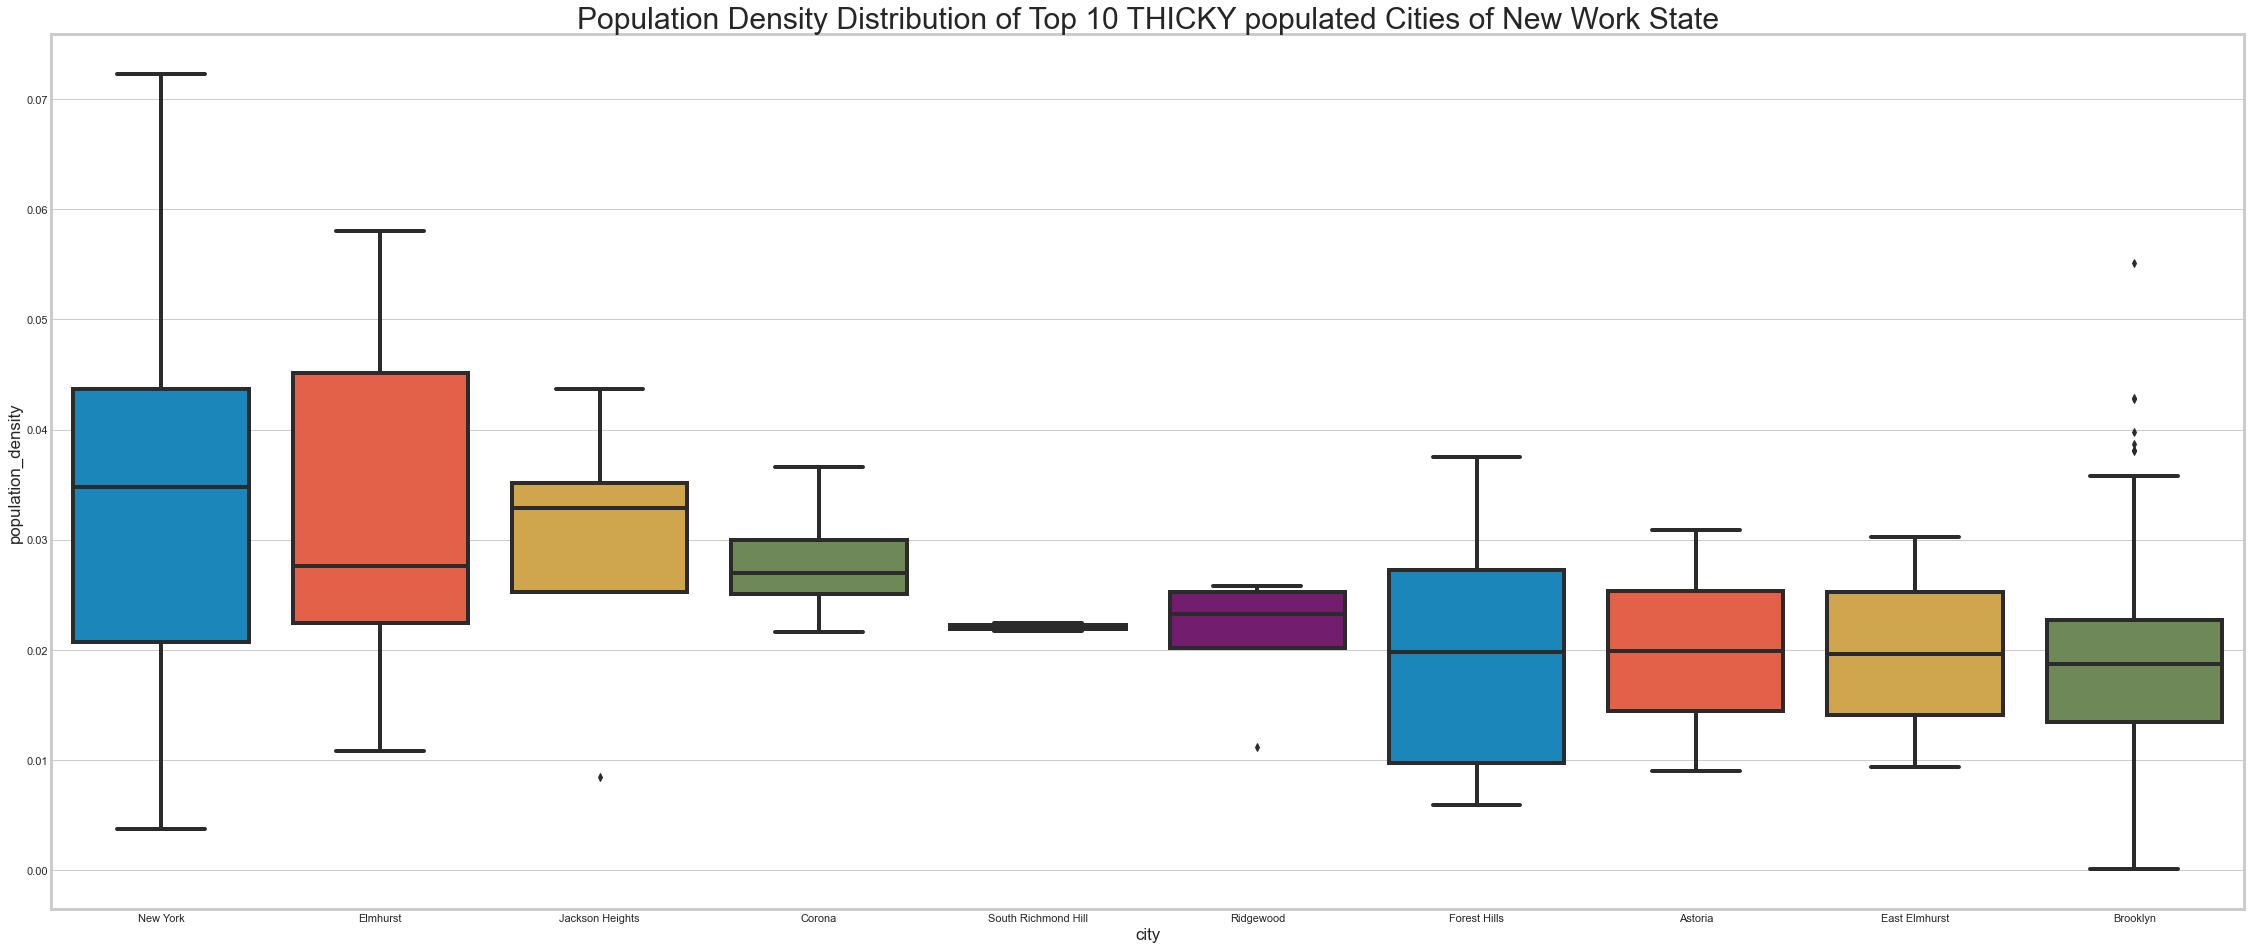

In [381]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))
sns.boxplot(x = 'city', y = 'population_density', data=df_pop[df_pop['state'] == 'New York'].nlargest(26718, 'population_density'), palette=color_pal, 
            order = ['New York', 'Elmhurst', 'Jackson Heights', 'Corona', 'South Richmond Hill', 'Ridgewood', 
                     'Forest Hills', 'Astoria', 'East Elmhurst', 'Brooklyn']).set_title('Population Density Distribution of Top 10 THICKY populated Cities of New Work State', fontsize = 30)
plt.show()

In [382]:
grouped_df7 = df_pop.loc[df_pop["state"] == "Mississippi"].groupby("city")
#calculate the averages
density_mean_df6 = grouped_df7.mean()
density_mean_df6 = density_mean_df6.reset_index()
density_mean_df6.sort_values("population_density", ascending = False, inplace = True)
density_mean_df6.head(10)

city            UID    COUNTYID  STATEID      zip_code  \
78        Memphis  258666.000000   33.000000     28.0  38120.500000   
19      Cleveland  258605.000000   11.000000     28.0  38732.000000   
36        Flowood  259104.000000  121.000000     28.0  39232.000000   
58        Jackson  258814.176471   53.235294     28.0  39210.352941   
46       Gulfport  258740.833333   47.000000     28.0  39504.666667   
49    Hattiesburg  258687.500000   35.000000     28.0  39401.000000   
20        Clinton  258809.666667   49.000000     28.0  39058.666667   
89  Ocean Springs  258852.500000   59.000000     28.0  39566.000000   
4    Bay St Louis  258713.000000   45.000000     28.0  39520.000000   
91         Oxford  258902.800000   71.000000     28.0  38655.000000   

    area_code        lat        lng         ALand        AWater          pop  \
78      901.0  34.983046 -89.913296  5.205888e+06  0.000000e+00  3895.000000   
19      662.0  33.729072 -90.718935  3.726761e+06  0.000000e+00  3563.000000   
36      601.0  32.377867 -90.019540  5.316044e+06  8.062980e+05  4353.000000   
58      601.0  32.311003 -90.215117  1.269754e+07  2.995128e+05  3765.117647   
46      228.0  30.426099 -89.062832  1.560926e+07  1.220224e+06  5259.166667   
49      601.0  31.322280 -89.298582  3.863078e+06  7.932150e+04  2242.000000   
20      601.0  32.361312 -90.327370  1.306897e+08  7.977260e+05  4320.666667   
89      228.0  30.405612 -88.808806  7.276266e+06  4.230854e+06  4625.500000   
4       228.0  30.305668 -89.335510  7.496790e+06  6.267427e+06  4697.000000   
91      662.0  34.357533 -89.544505  2.833403e+07  7.976280e+04  4949.400000   

       male_pop   female_pop    rent_mean  rent_median  rent_stdev  \
78  2010.000000  1885.000000   951.469230   896.500000  368.011080   
19  1911.000000  1652.000000   588.881730   548.000000  240.743030   
36  2052.000000  2301.000000  1150.118170  1175.000000  292.319630   
58  1798.058824  1967.058824   809.577913   790.588235  295.376549   
46  2623.333333  2635.833333   850.268547   826.833333  258.220378   
49  1170.750000  1071.250000   693.016270   641.750000  293.121857   
20  2102.333333  2218.333333   802.150860   737.666667  286.296373   
89  2034.000000  2591.500000   940.993440   856.500000  357.521440   
4   2482.000000  2215.000000   749.863960   774.000000  302.416980   
91  2326.600000  2622.800000   903.065974   831.600000  402.664494   

    rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
78          264.111765    542.500000    0.996255    0.789335    0.632415   
19          390.122430    458.000000    1.000000    0.973450    0.924780   
36          117.029090    334.000000    0.970060    0.970060    0.820360   
58          454.591658    620.647059    0.979596    0.919642    0.805219   
46          635.795803    972.333333    0.968323    0.911345    0.788447   
49          356.865273    452.500000    0.943542    0.901195    0.802450   
20          326.903880    471.333333    0.984363    0.947100    0.808387   
89          282.842630    489.500000    0.953070    0.882685    0.600930   
4           554.358650    754.000000    0.968170    0.885940    0.810340   
91          594.892848    933.800000    0.981322    0.945084    0.848312   

    rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50  \
78    0.548660    0.472670    0.420205    0.393440    0.314210   
19    0.889380    0.721240    0.615040    0.387170    0.336280   
36    0.464070    0.176650    0.125750    0.125750    0.029940   
58    0.705729    0.614850    0.512385    0.445724    0.320122   
46    0.699765    0.616395    0.502325    0.448107    0.326608   
49    0.727472    0.628463    0.540663    0.496605    0.305720   
20    0.665917    0.524617    0.391327    0.346743    0.239623   
89    0.498105    0.400055    0.301470    0.232575    0.111960   
4     0.558360    0.372680    0.283820    0.246680    0.228120   
91    0.777260    0.672876    0.630128    0.570786    0.506518   

    universe_sa

- Hence the top 10 Cities in 'Mississippi' state as per population_density in decreasing order is: 'Memphis', 'Cleveland', 'Flowood', 'Jackson', 'Gulfport', 'Hattiesburg', 'Clinton', 'Ocean Springs', 'Bay St Louis', 'Oxford'.

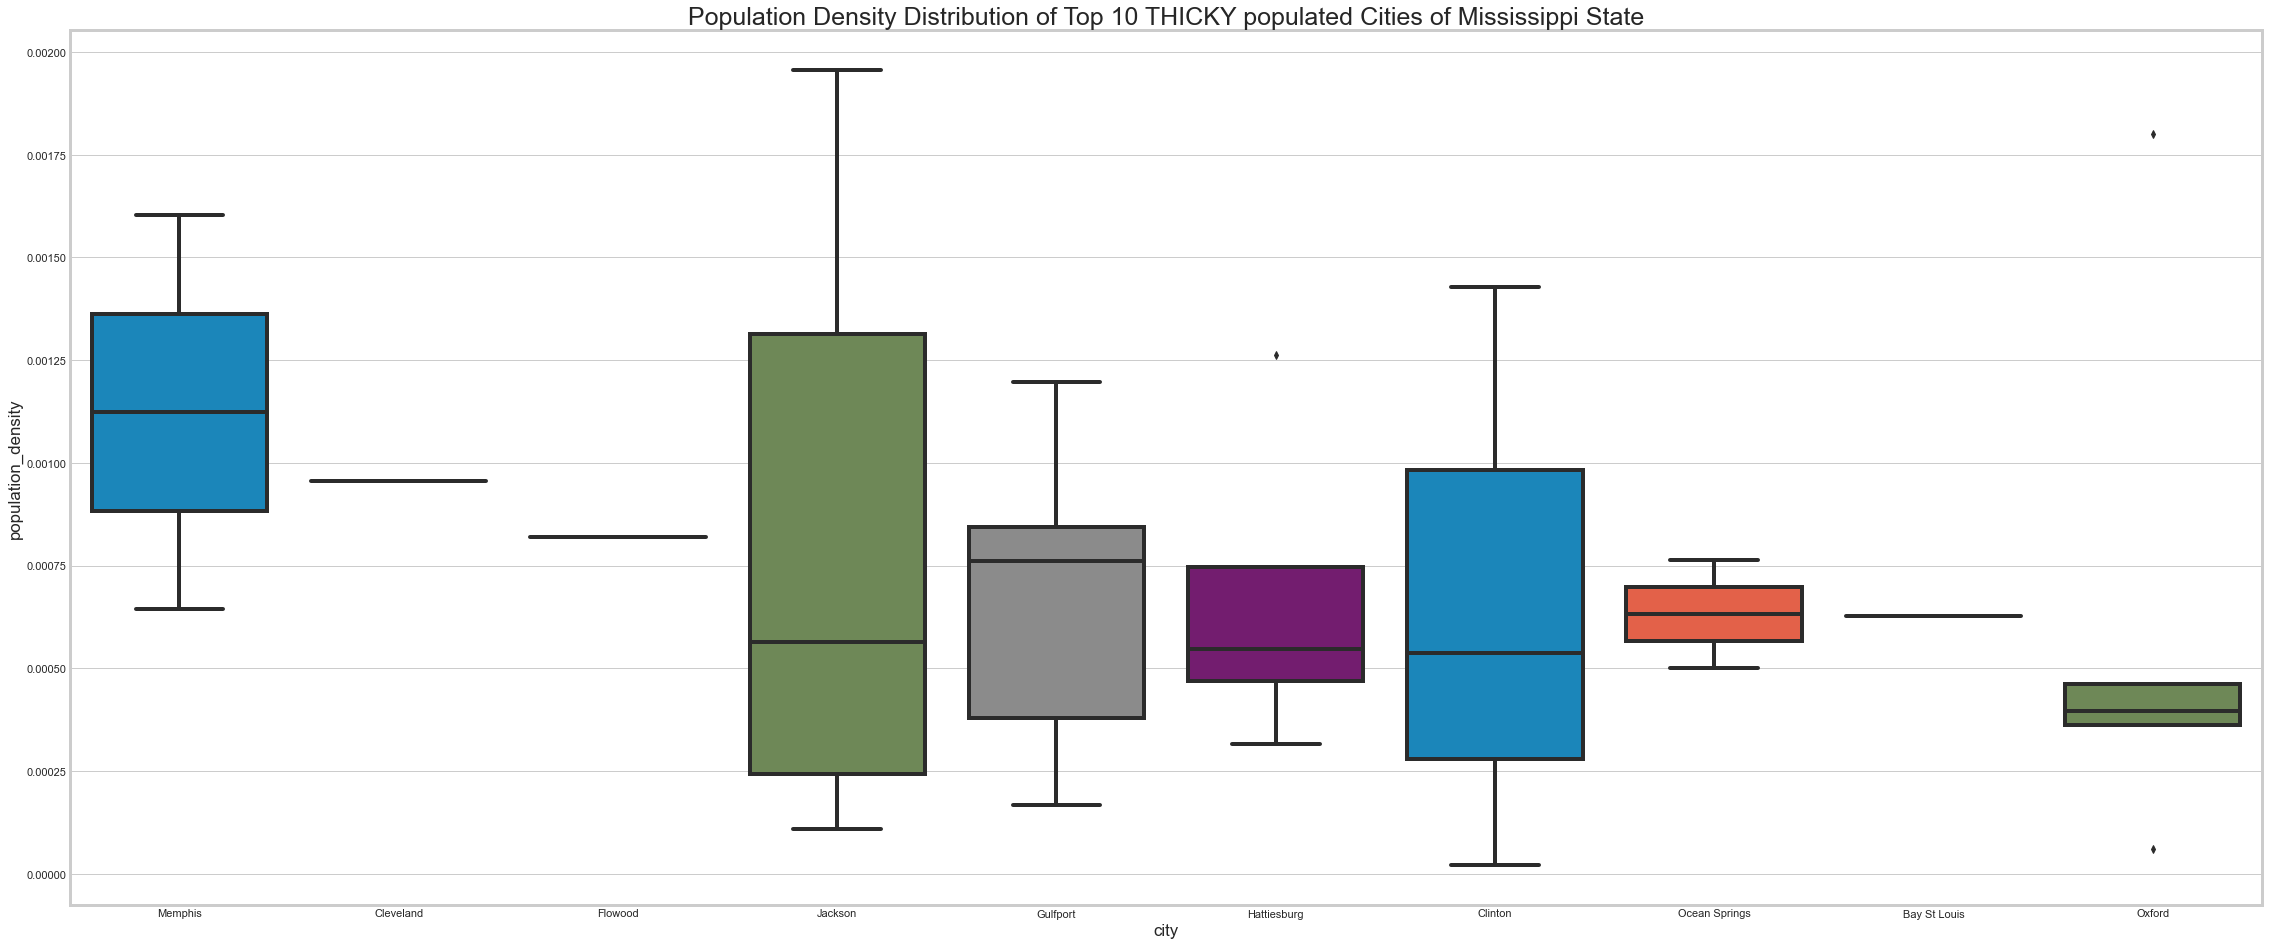

In [383]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))
sns.boxplot(x = 'city', y = 'population_density', data=df_pop[df_pop['state'] == 'Mississippi'].nlargest(26718, 'population_density'), palette=color_pal, 
            order = ['Memphis', 'Cleveland', 'Flowood', 'Jackson', 'Gulfport', 'Hattiesburg', 'Clinton', 
                     'Ocean Springs', 'Bay St Louis', 'Oxford']).set_title('Population Density Distribution of Top 10 THICKY populated Cities of Mississippi State', fontsize = 25)
plt.show()

In [384]:
print(list(df_pop.nlargest(500, 'median_age').state.unique()))
print(len(list(df_pop.nlargest(500, 'median_age').state.unique())))

['New York', 'Florida', 'California', 'Maryland', 'New Jersey', 'Arizona', 'Nevada', 'Arkansas', 'Illinois', 'North Carolina', 'South Carolina', 'Delaware', 'Ohio', 'Texas', 'Georgia', 'Alabama', 'New Mexico', 'Tennessee', 'Oregon', 'Michigan', 'Hawaii', 'Massachusetts', 'Minnesota', 'Wisconsin', 'Missouri', 'Washington', 'Colorado', 'Virginia', 'Maine', 'Mississippi', 'Pennsylvania', 'Louisiana', 'Indiana', 'Oklahoma', 'Wyoming', 'Montana', 'Connecticut']
37


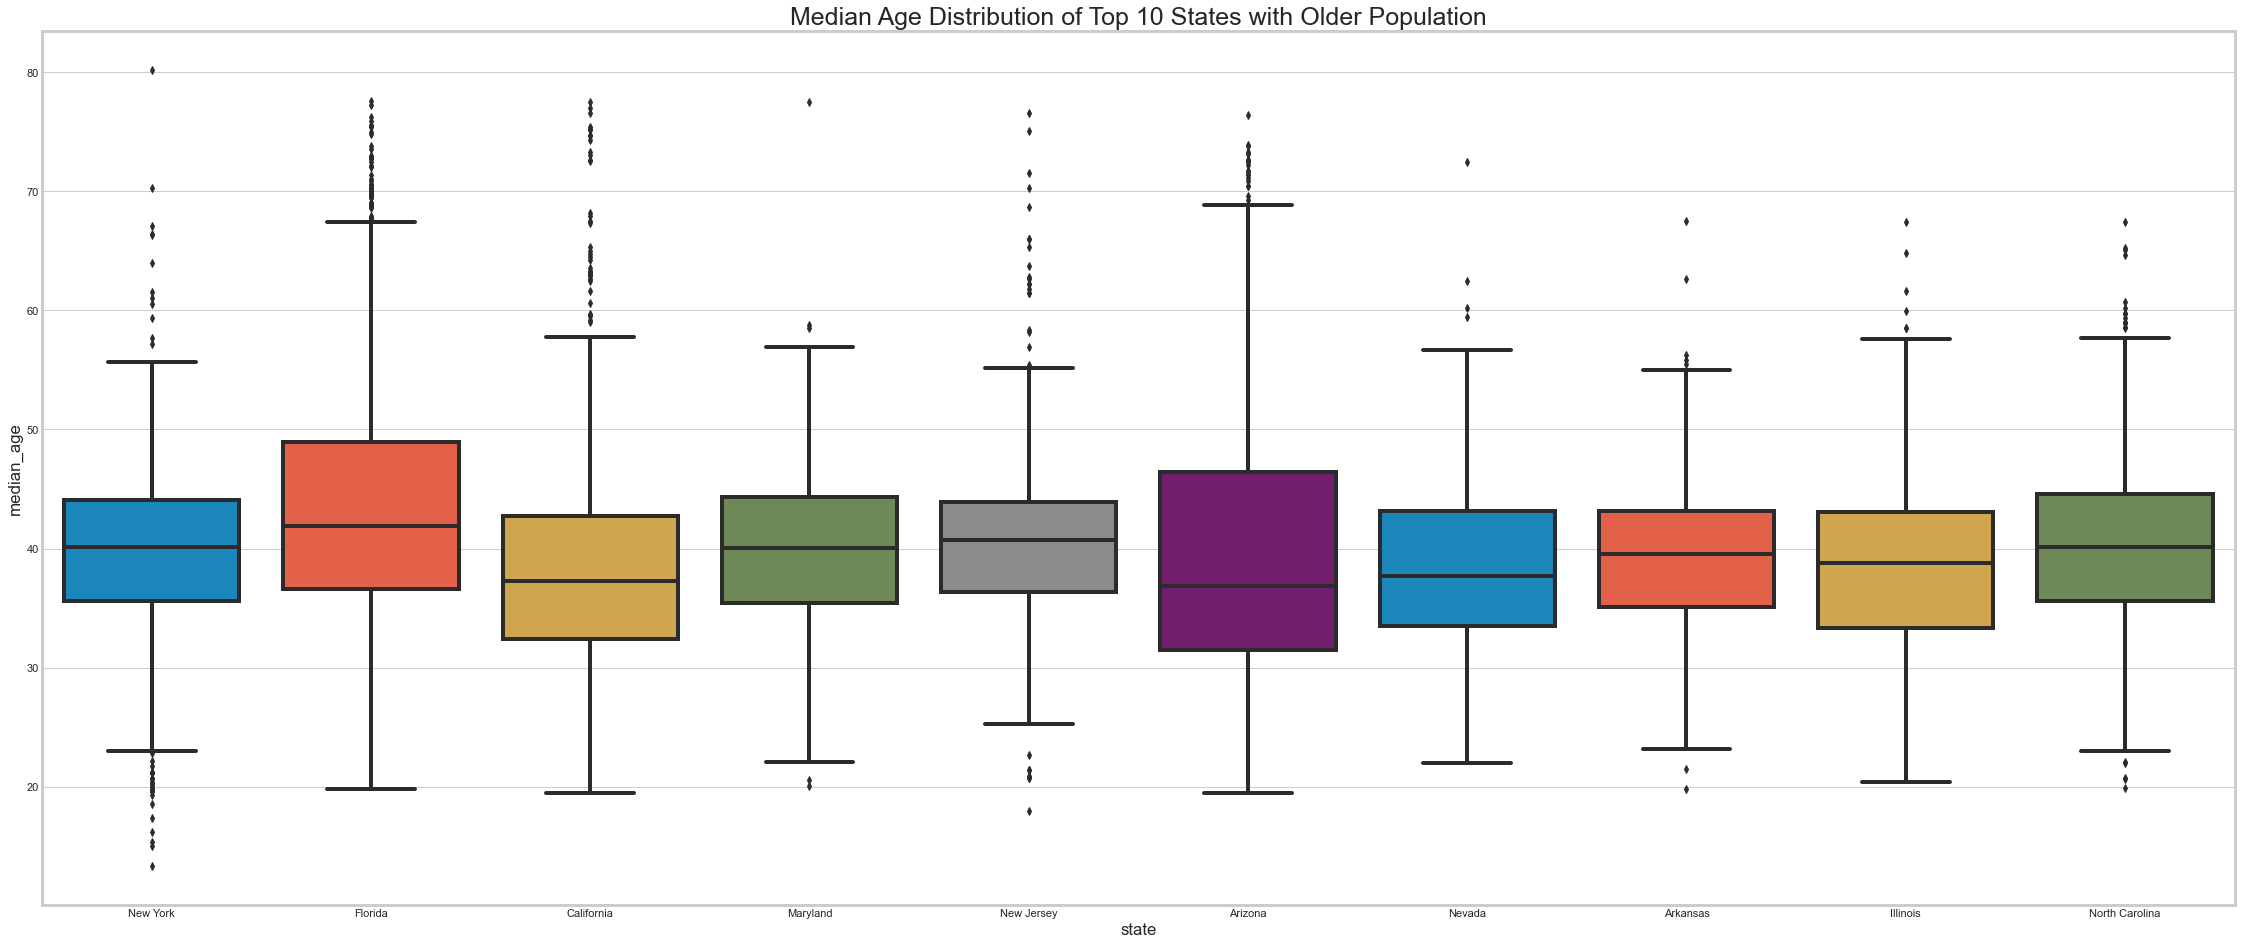

In [385]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))

sns.boxplot(x = 'state', y = 'median_age', data=df_pop.nlargest(26585, 'median_age'), palette=color_pal, 
            order = ['New York', 'Florida', 'California', 'Maryland', 'New Jersey', 'Arizona', 'Nevada', 
                     'Arkansas', 'Illinois', 'North Carolina']).set_title('Median Age Distribution of Top 10 States with Older Population', fontsize = 25)

plt.show()

In [386]:
print(list(df_pop.nsmallest(50, 'median_age').state.unique()))
print(len(list(df_pop.nsmallest(50, 'median_age').state.unique())))

['New York', 'New Jersey', 'Ohio', 'Virginia', 'Texas', 'Mississippi', 'Colorado', 'Oregon', 'Arizona', 'California', 'Utah', 'Pennsylvania', 'Michigan', 'Arkansas', 'Maine', 'Florida', 'North Carolina', 'Minnesota', 'Georgia', 'Connecticut', 'Maryland', 'Wisconsin', 'Louisiana', 'Massachusetts']
24


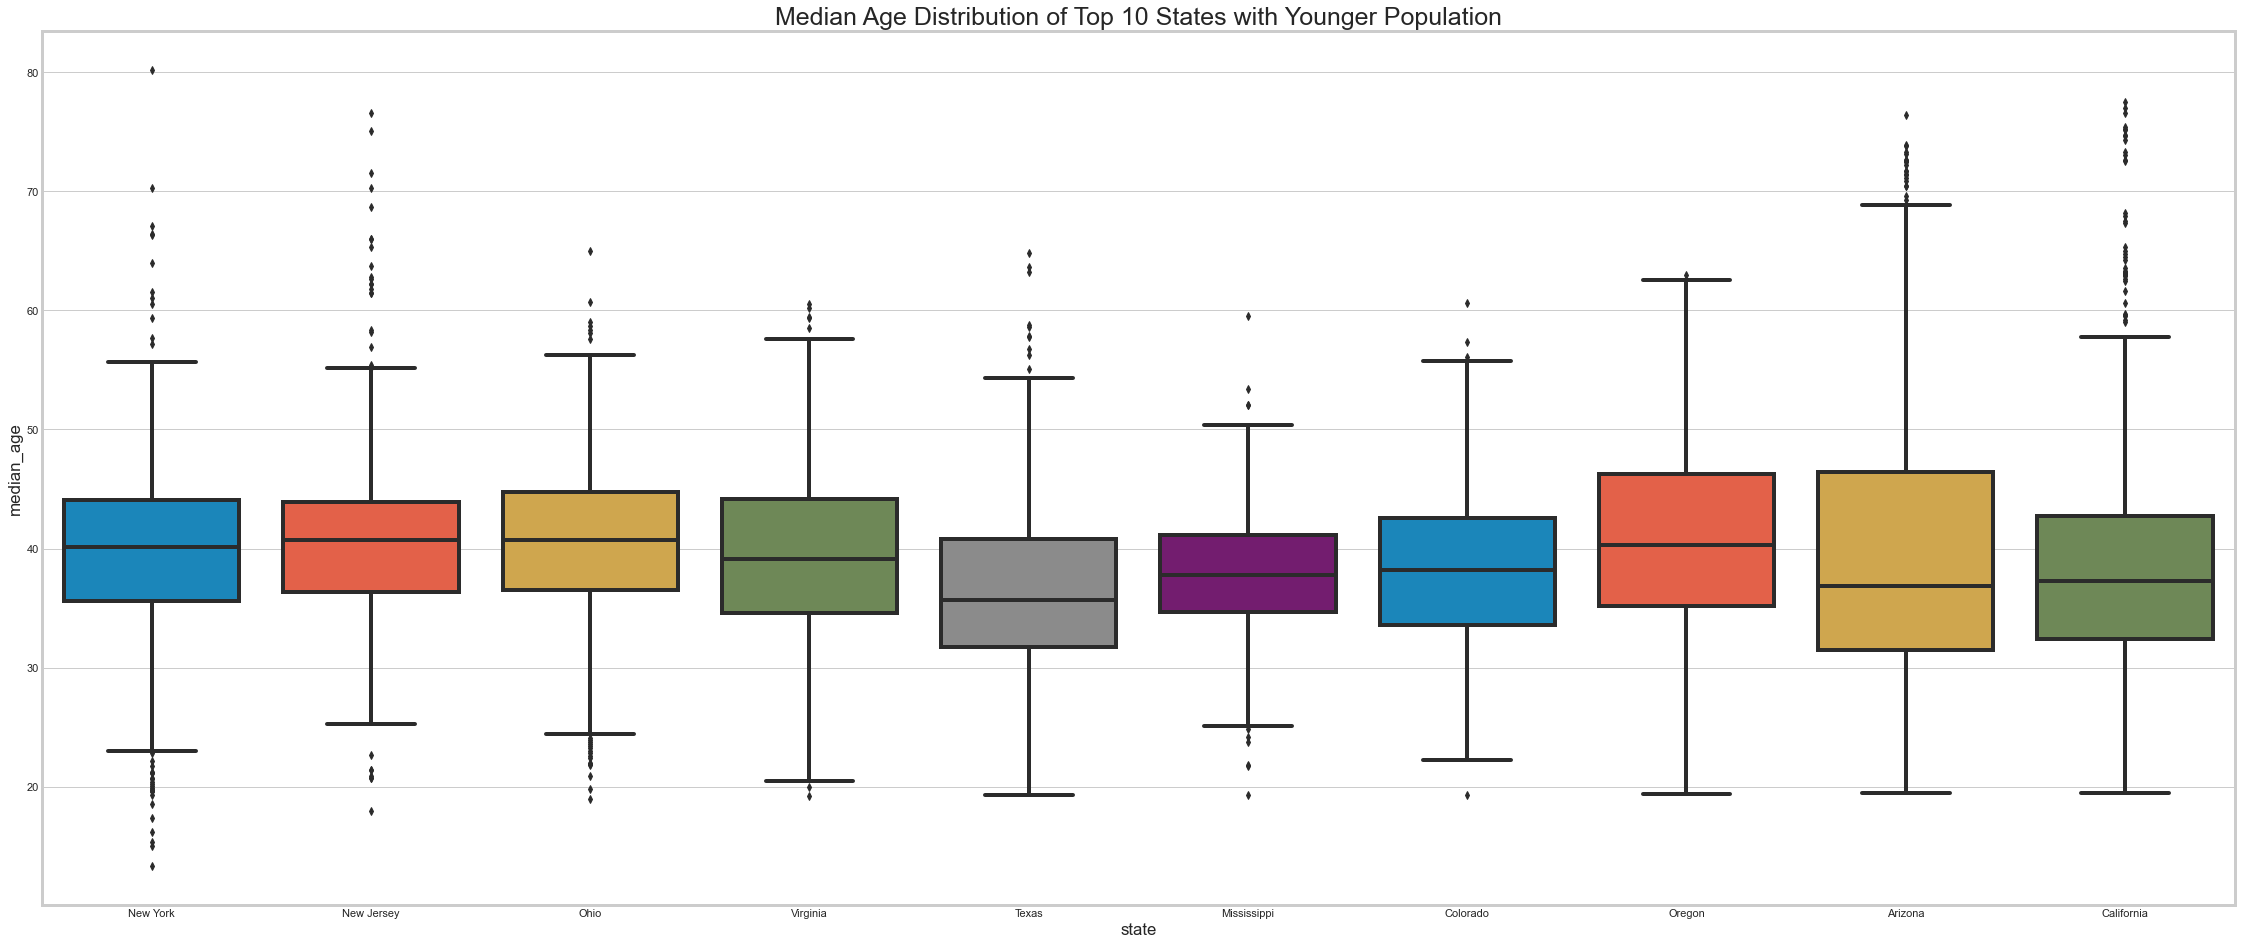

In [387]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))

sns.boxplot(x = 'state', y = 'median_age', data=df_pop.nsmallest(26585, 'median_age'), palette=color_pal, 
            order = ['New York', 'New Jersey', 'Ohio', 'Virginia', 'Texas', 'Mississippi', 
                     'Colorado', 'Oregon', 'Arizona', 'California']).set_title('Median Age Distribution of Top 10 States with Younger Population', fontsize = 25)

plt.show()

In [388]:
print(list(df_pop[df_pop['state'] == 'New York'].nlargest(100, 'median_age').city.unique()))
print(len(list(df_pop[df_pop['state'] == 'New York'].nlargest(100, 'median_age').city.unique())))

['Bellerose', 'Ridge', 'Somers', 'Bronx', 'Yorktown Heights', 'Johnson City', 'Brooklyn', 'Williamsville', 'Fishers Island', 'Lake George', 'Chestertown', 'Rhinebeck', 'Southampton', 'Richmond Hill', 'Mount Vernon', 'Jamaica', 'Long Lake', 'Melville', 'Amityville', 'East Rochester', 'Rome', 'Calverton', 'Woodstock', 'White Plains', 'Craryville', 'Rochester', 'Youngstown', 'Sag Harbor', 'Valatie', 'Yonkers', 'Hammondsport', 'Utica', 'Middle Island', 'New York', 'Staten Island', 'Caroga Lake', 'Willsboro', 'Margaretville', 'Canandaigua', 'Bayside', 'Elma', 'Cambria Heights', 'Depew', 'Ellicottville', 'Endwell', 'Syosset', 'Grahamsville', 'Hurley', 'Honeoye', 'Great Neck', 'Greenfield Center', 'Hollis', 'Nedrow', 'Pawling', 'Webster', 'Jeffersonville', 'North Tonawanda', 'Amsterdam', 'Rushville', 'Delmar', 'Hamburg', 'Bemus Point', 'Orchard Park', 'Flushing', 'Long Island City', 'North Salem', 'Fairport', 'Ossining', 'Kingston', 'Port Washington', 'Mattituck', 'Scotia', 'Lake Katrine', 'H

- Hence the top 10 Cities in 'New York' state as per median age in decreasing order is: 'Bellerose', 'Ridge', 'Somers', 'Bronx', 'Yorktown Heights', 'Johnson City', 'Brooklyn', 'Williamsville', 'Fishers Island', 'Lake George'.

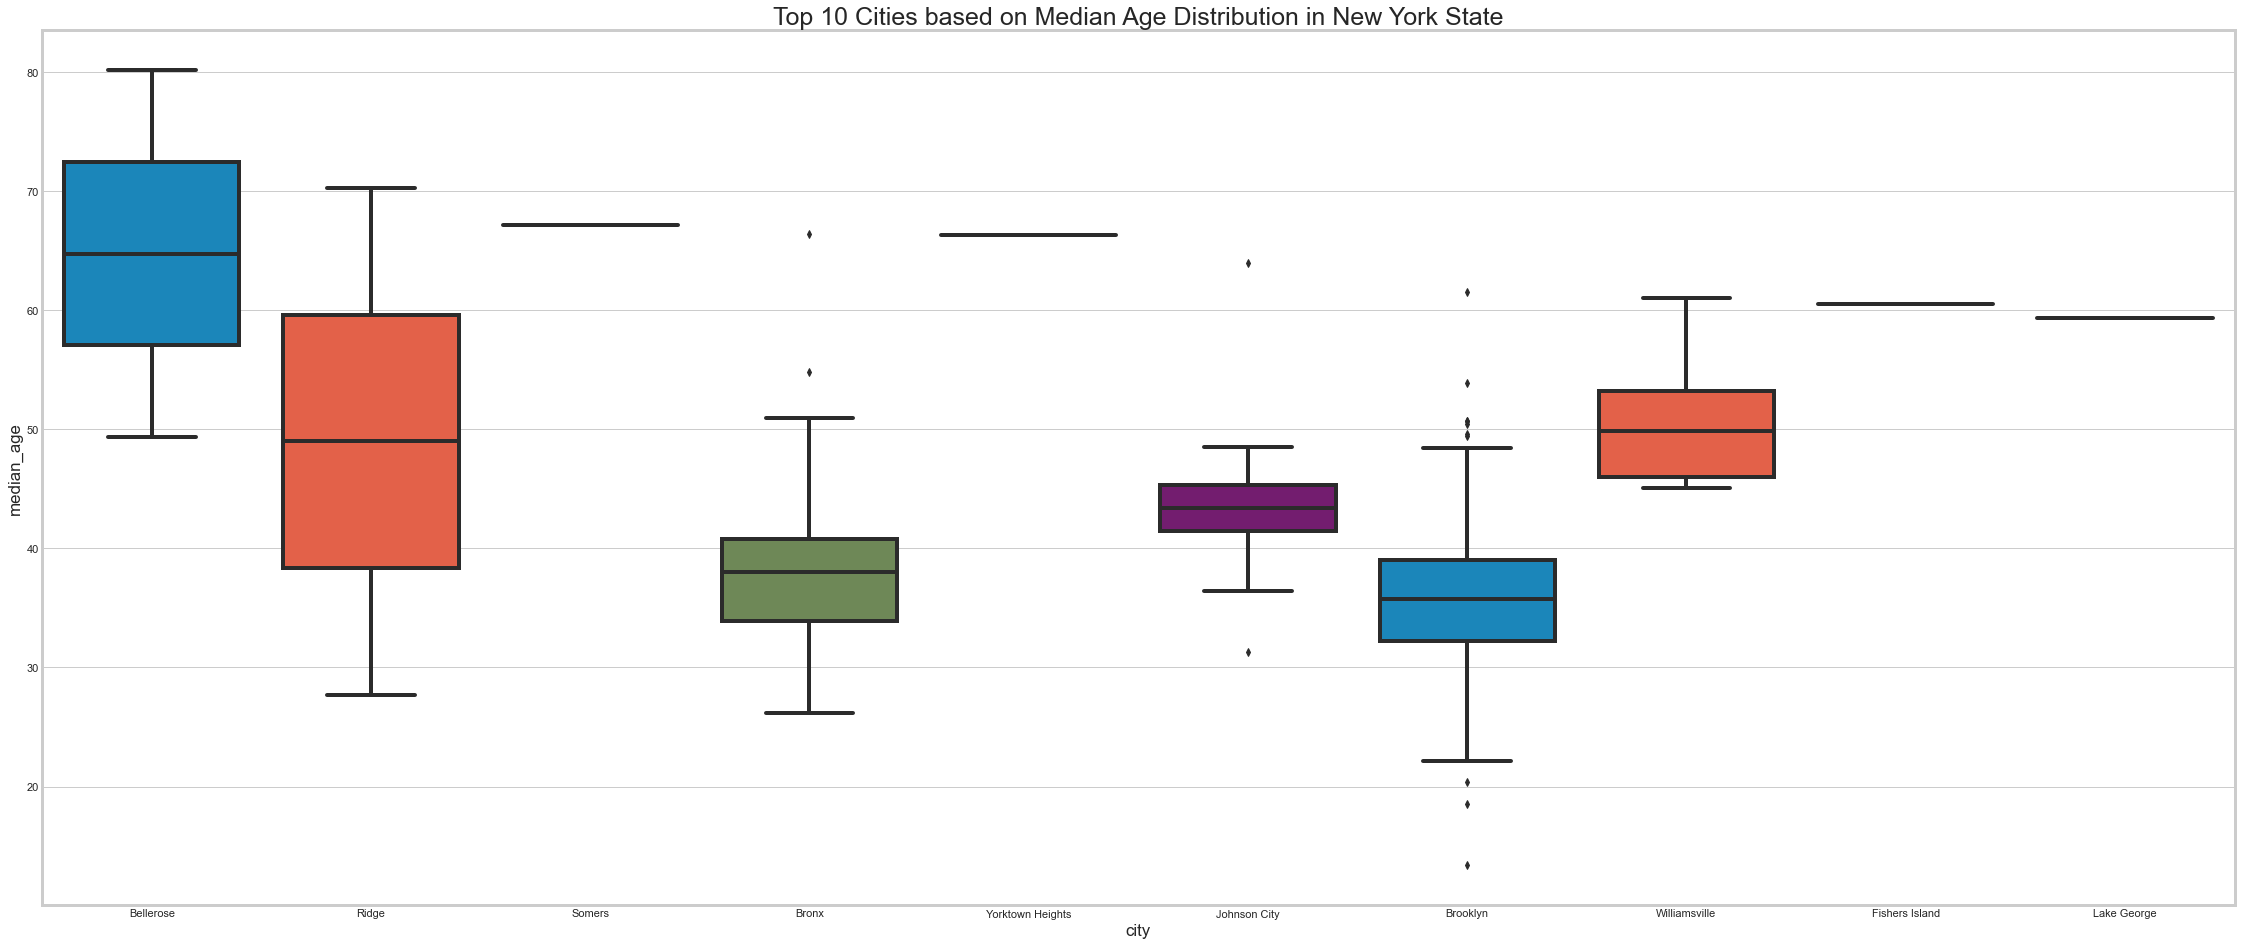

In [389]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))

sns.boxplot(x = 'city', y = 'median_age', data=df_pop.nlargest(26585, 'median_age'), palette=color_pal, 
            order = ['Bellerose', 'Ridge', 'Somers', 'Bronx', 'Yorktown Heights', 'Johnson City', 'Brooklyn', 
                     'Williamsville', 'Fishers Island', 'Lake George']).set_title('Top 10 Cities based on Median Age Distribution in New York State', fontsize = 25)

plt.show()

In [390]:
print(list(df_pop[df_pop['state'] == 'Mississippi'].nlargest(100, 'median_age').city.unique()))
print(len(list(df_pop[df_pop['state'] == 'Mississippi'].nlargest(100, 'median_age').city.unique())))

['Long Beach', 'Natchez', 'Bay St Louis', 'Ocean Springs', 'Jackson', 'Flowood', 'Camden', 'Pearl', 'Liberty', 'Moss Point', 'Decatur', 'Belzoni', 'Sallis', 'Biloxi', 'Vicksburg', 'Clinton', 'Holly Springs', 'Louisville', 'Carthage', 'Collinsville', 'Coffeeville', 'Crystal Springs', 'Wesson', 'Greenville', 'Prentiss', 'Ridgeland', 'Heidelberg', 'Hattiesburg', 'Meridian', 'Calhoun City', 'North Carrollton', 'Poplarville', 'Utica', 'Dekalb', 'Brookhaven', 'Tylertown', 'Guntown', 'Pope', 'Marietta', 'Gulfport', 'Aberdeen', 'Laurel', 'Columbus', 'Madison', 'Brandon', 'Hernando', 'Woodville', 'Bay St. Louis', 'Corinth', 'Foxworth', 'Eupora', 'Mccool', 'Inverness', 'Pontotoc', 'Glen', 'Weir', 'Pinola', 'Okolona', 'Florence', 'Newton', 'Macon', 'Maben', 'Canton', 'Purvis', 'Ellisville', 'Bay Springs', 'Water Valley', 'Mantachie', 'Cedar Bluff', 'Wiggins', 'Ashland', 'Grenada', 'Bolton', 'Pascagoula', 'Waynesboro', 'Pelahatchie', 'Hurley', 'Magnolia', 'Petal', 'Whitfield', 'Diberville', 'Quitm

- Hence the top 10 Cities in 'Mississippi' state as per median age in decreasing order is: 'Long Beach', 'Natchez', 'Bay St Louis', 'Ocean Springs', 'Jackson', 'Flowood', 'Camden', 'Pearl', 'Liberty', 'Moss Point'.

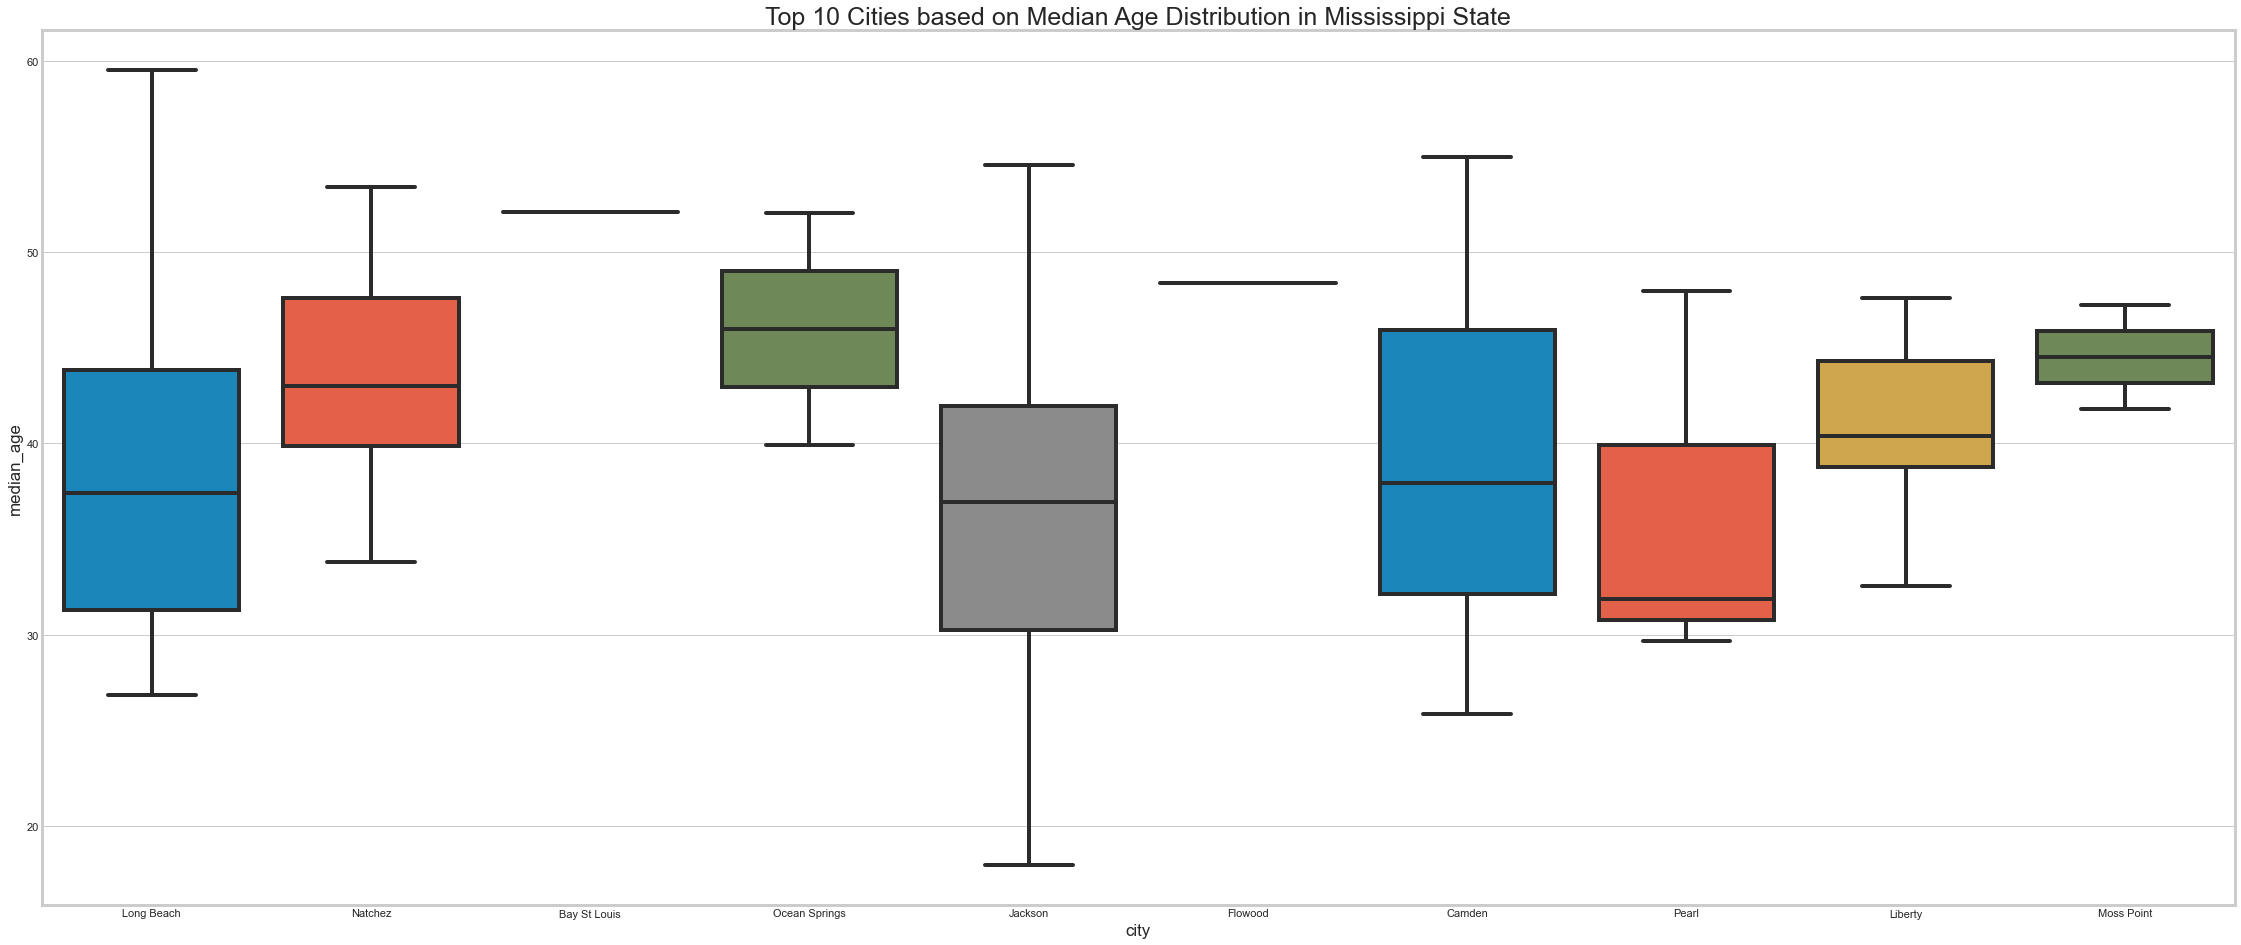

In [391]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 15))

sns.boxplot(x = 'city', y = 'median_age', data=df_pop.nlargest(26585, 'median_age'), palette=color_pal, 
            order = ['Long Beach', 'Natchez', 'Bay St Louis', 'Ocean Springs', 'Jackson', 
                     'Flowood', 'Camden', 'Pearl', 'Liberty', 'Moss Point']).set_title('Top 10 Cities based on Median Age Distribution in Mississippi State', fontsize = 25)

plt.show()

## Creating bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.
### Analyzing & Visualizing married, separated and divorced population

In [392]:
married_stat_df = train_data[['state', 'city', 'place', 'pop', 'male_pop', 'female_pop', 'male_age_median', 
                        'female_age_median', 'married', 'separated', 'divorced']]
married_stat_df.head()

state        city           place   pop  male_pop  female_pop  \
0     New York    Hamilton        Hamilton  5230      2612        2618   
1      Indiana  South Bend        Roseland  2633      1349        1284   
2      Indiana    Danville        Danville  6881      3643        3238   
3  Puerto Rico    San Juan        Guaynabo  2700      1141        1559   
4       Kansas   Manhattan  Manhattan City  5637      2586        3051   

   male_age_median  female_age_median  married  separated  divorced  
0         44.00000           45.33333  0.57851    0.01240   0.08770  
1         32.00000           37.58333  0.34886    0.01426   0.09030  
2         40.83333           42.83333  0.64745    0.01607   0.10657  
3         48.91667           50.58333  0.47257    0.02021   0.10106  
4         22.41667           21.58333  0.12356    0.00000   0.03109

In [393]:
married_stat_df.shape

(26585, 11)

In [394]:
married_stat_df.male_age_median.unique()

array([44.     , 32.     , 40.83333, 48.91667, 22.41667, 41.41667,
       40.     , 53.08333, 30.66667, 47.33333, 34.33333, 46.91667,
       49.75   , 34.66667, 42.58333, 45.83333, 44.16667, 32.5    ,
       30.41667, 27.41667, 30.08333, 41.16667, 38.75   , 30.     ,
       31.16667, 46.75   , 36.66667, 38.16667, 34.91667, 40.16667,
       27.66667, 39.33333, 42.83333, 36.41667, 41.91667, 44.5    ,
       51.75   , 43.41667, 51.66667, 34.     , 64.08333, 51.41667,
       20.25   , 29.     , 28.     , 41.25   , 49.83333, 24.91667,
       45.41667, 28.16667, 34.08333, 36.91667, 46.66667, 36.16667,
       36.75   , 38.5    , 36.08333, 47.5    , 51.16667, 48.16667,
       33.     , 25.25   , 37.08333, 42.66667, 40.25   , 29.75   ,
       38.41667, 37.41667, 42.     , 44.08333, 36.5    , 32.16667,
       35.91667, 39.5    , 37.75   , 38.58333, 21.25   , 35.33333,
       40.41667, 46.08333, 54.41667, 41.5    , 37.83333, 31.41667,
       41.75   , 32.41667, 26.66667, 39.83333, 31.91667, 34.58

- Age group defaults: Kids (0 - 12), Youth (13 - 18), Young Adult (18 - 35), Adult (36 - 55) & Senior Citizen (>= 56)

In [395]:
bins = [0, 12, 18, 35, 55, 100]
labels = ["Kids", "Youth", "Young Adult", "Adult", "Senior Citizen"]

In [396]:
#separating male & female age median into different bins as defined above
married_stat_df["male_population_bracket"] = pd.cut(married_stat_df["male_age_median"], bins, labels = labels)
married_stat_df["female_population_bracket"] = pd.cut(married_stat_df["female_age_median"], bins, labels = labels)

In [397]:
married_stat_df.head()

state        city           place   pop  male_pop  female_pop  \
0     New York    Hamilton        Hamilton  5230      2612        2618   
1      Indiana  South Bend        Roseland  2633      1349        1284   
2      Indiana    Danville        Danville  6881      3643        3238   
3  Puerto Rico    San Juan        Guaynabo  2700      1141        1559   
4       Kansas   Manhattan  Manhattan City  5637      2586        3051   

   male_age_median  female_age_median  married  separated  divorced  \
0         44.00000           45.33333  0.57851    0.01240   0.08770   
1         32.00000           37.58333  0.34886    0.01426   0.09030   
2         40.83333           42.83333  0.64745    0.01607   0.10657   
3         48.91667           50.58333  0.47257    0.02021   0.10106   
4         22.41667           21.58333  0.12356    0.00000   0.03109   

  male_population_bracket female_population_bracket  
0                   Adult                     Adult  
1             Young Adult                     Adult  
2                   Adult                     Adult  
3                   Adult                     Adult  
4             Young Adult               Young Adult

In [398]:
for i in married_stat_df['state'].unique():
    print(i)

New York
Indiana
Puerto Rico
Kansas
Alabama
Texas
South Carolina
California
Arkansas
Maryland
Illinois
Iowa
Tennessee
Nevada
Louisiana
Colorado
Rhode Island
Mississippi
New Jersey
Oregon
Arizona
Florida
Wisconsin
Pennsylvania
North Carolina
Virginia
Michigan
Ohio
Oklahoma
Georgia
Idaho
South Dakota
Minnesota
Missouri
Washington
Wyoming
Connecticut
West Virginia
Kentucky
Massachusetts
District of Columbia
Hawaii
Montana
Alaska
New Hampshire
Utah
Vermont
Nebraska
North Dakota
New Mexico
Maine
Delaware


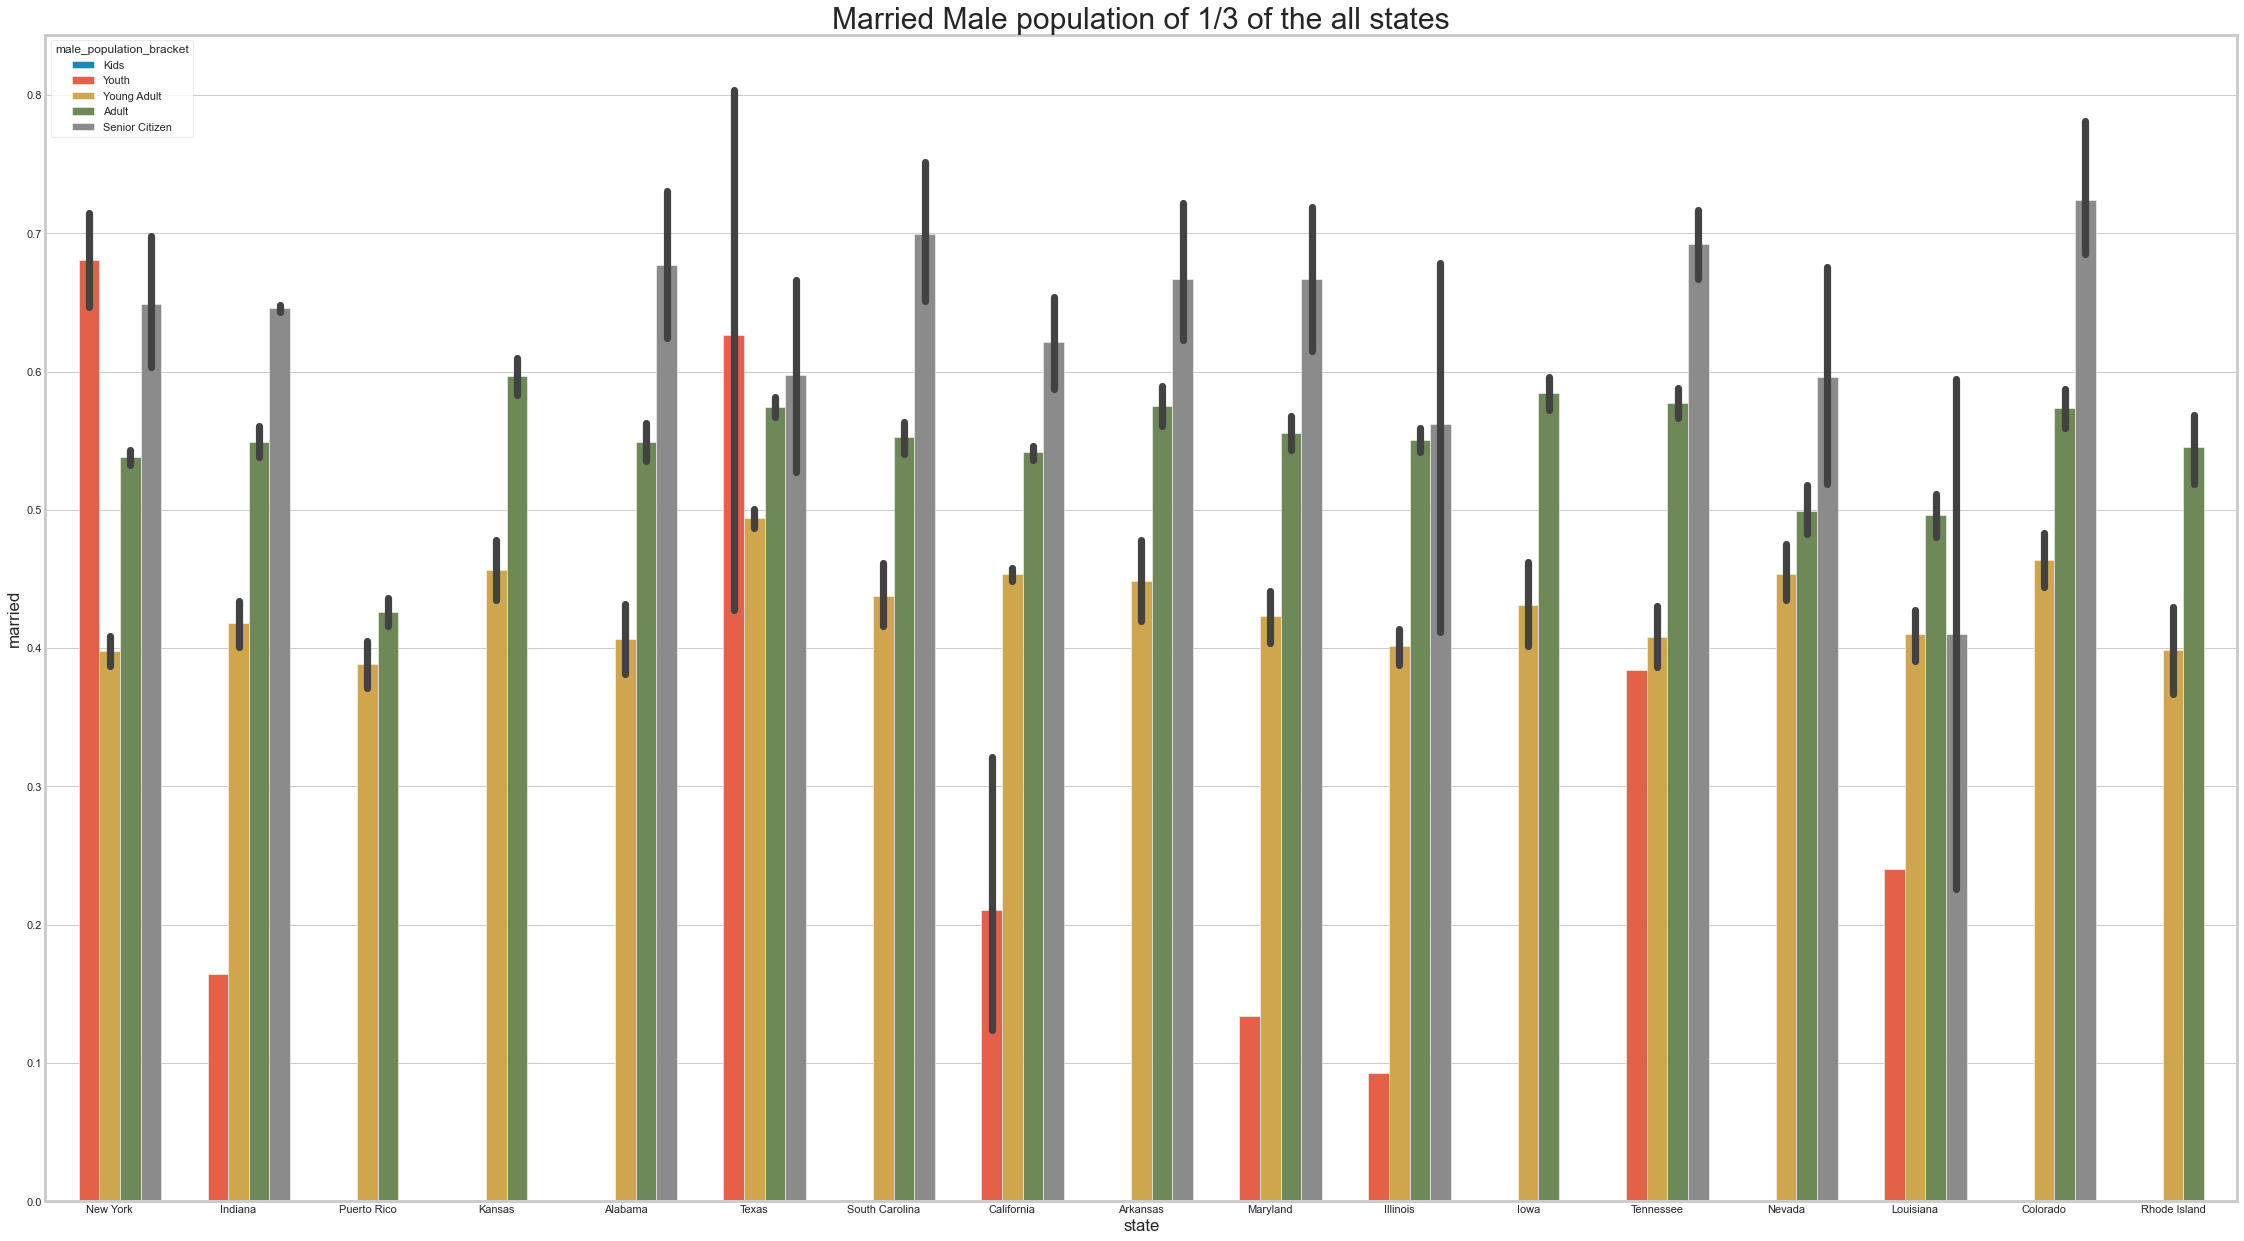

In [399]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas', 'South Carolina', 'California', 
                    'Arkansas', 'Maryland', 'Illinois', 'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado', 
                    'Rhode Island']).set_title('Married Male population of 1/3 of the all states', fontsize = 30)

plt.show()

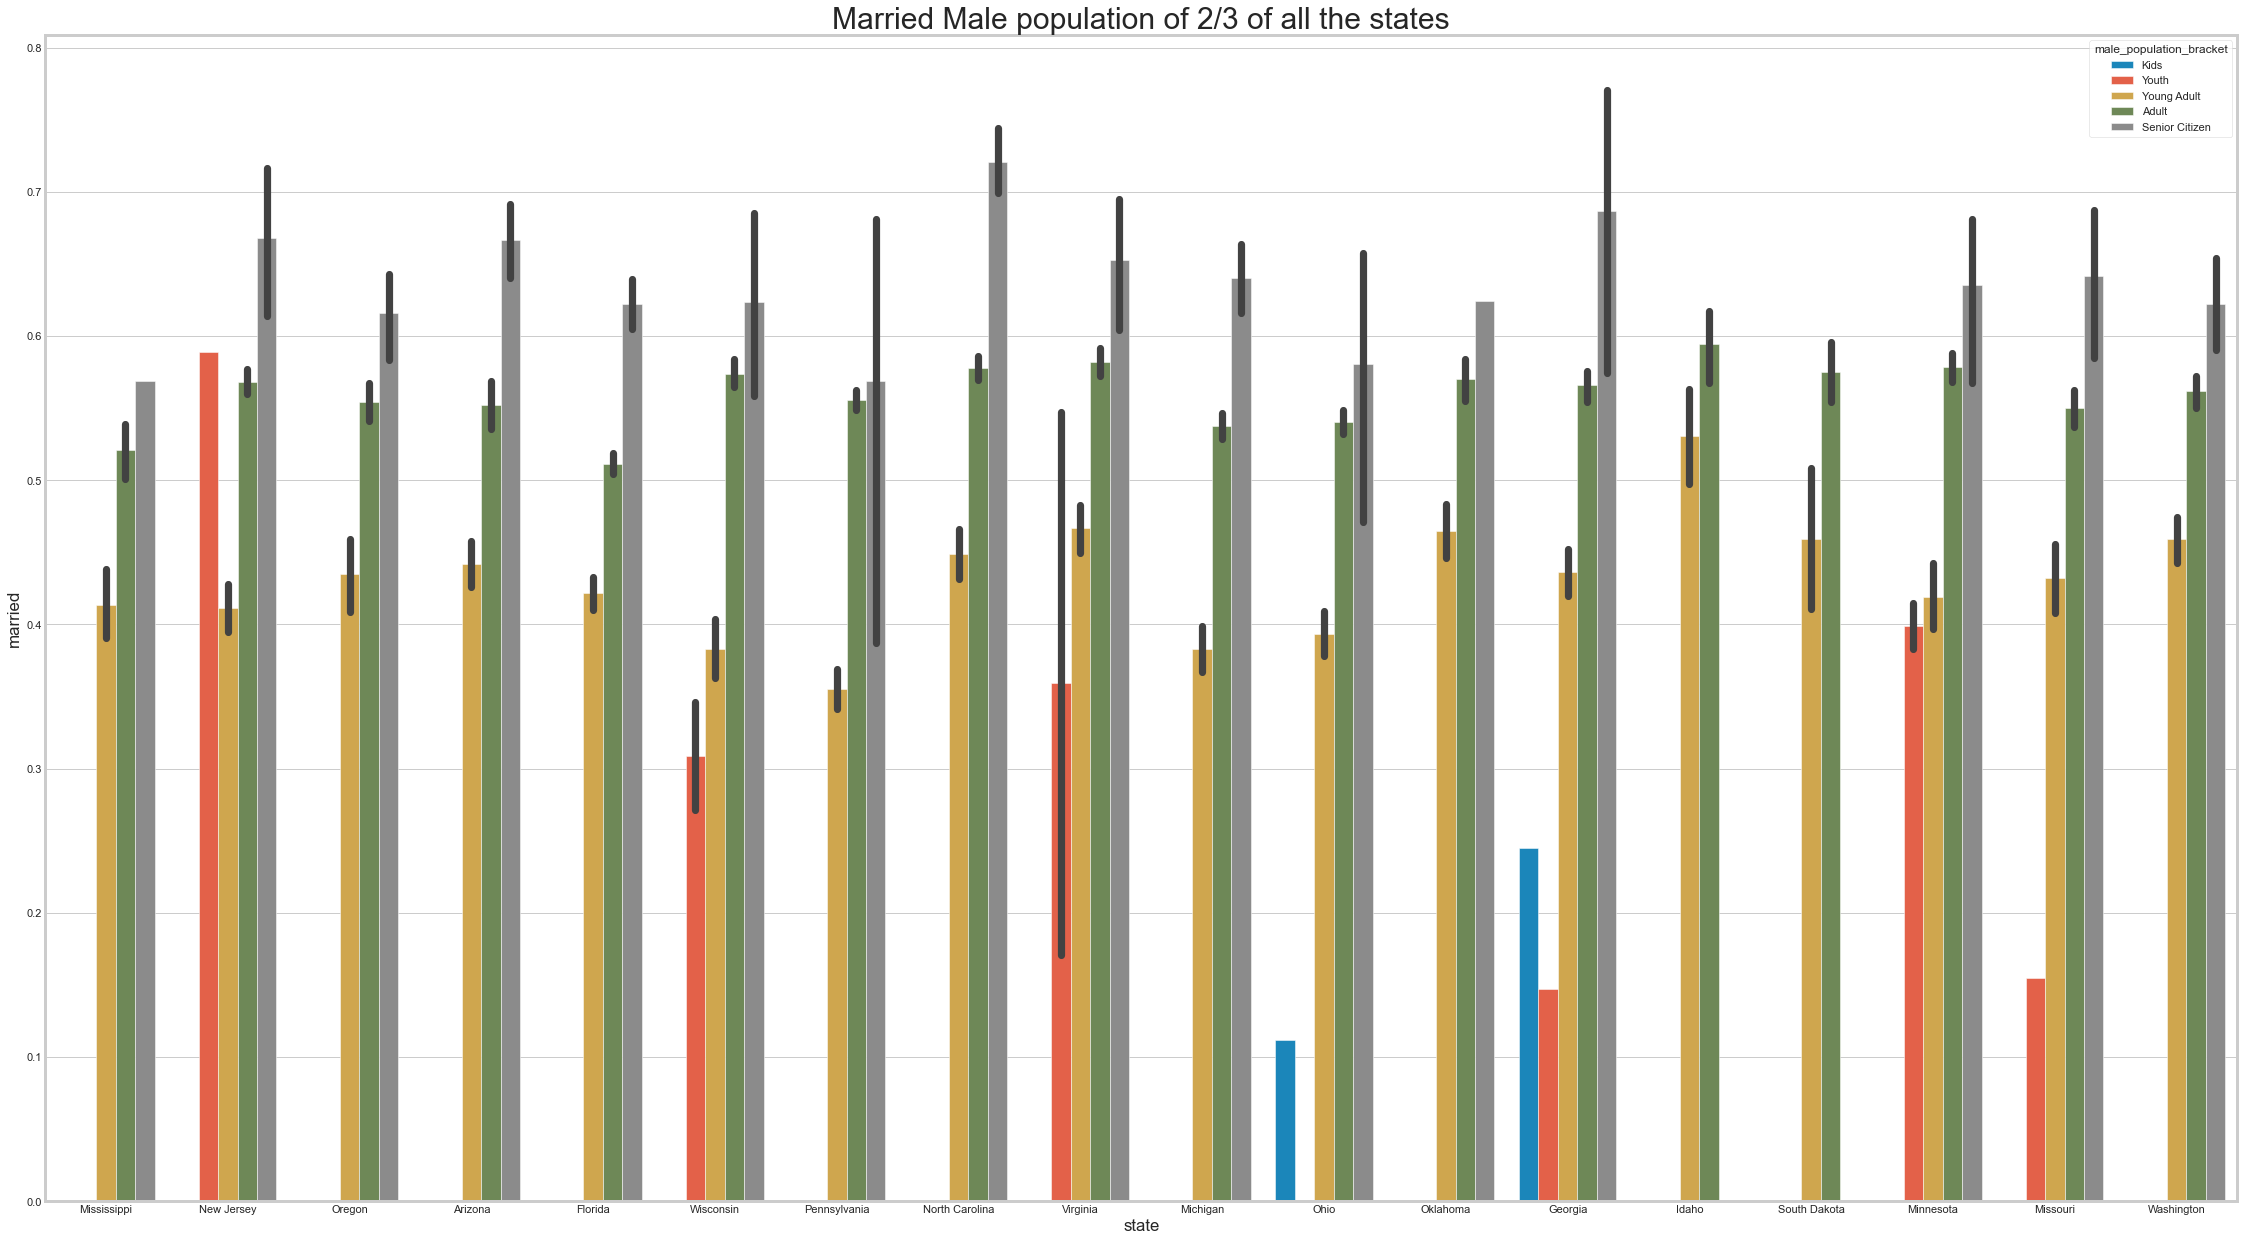

In [400]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Mississippi', 'New Jersey', 'Oregon', 'Arizona', 'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina', 
                    'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota', 'Missouri', 
                    'Washington']).set_title('Married Male population of 2/3 of all the states', fontsize = 30)

plt.show()

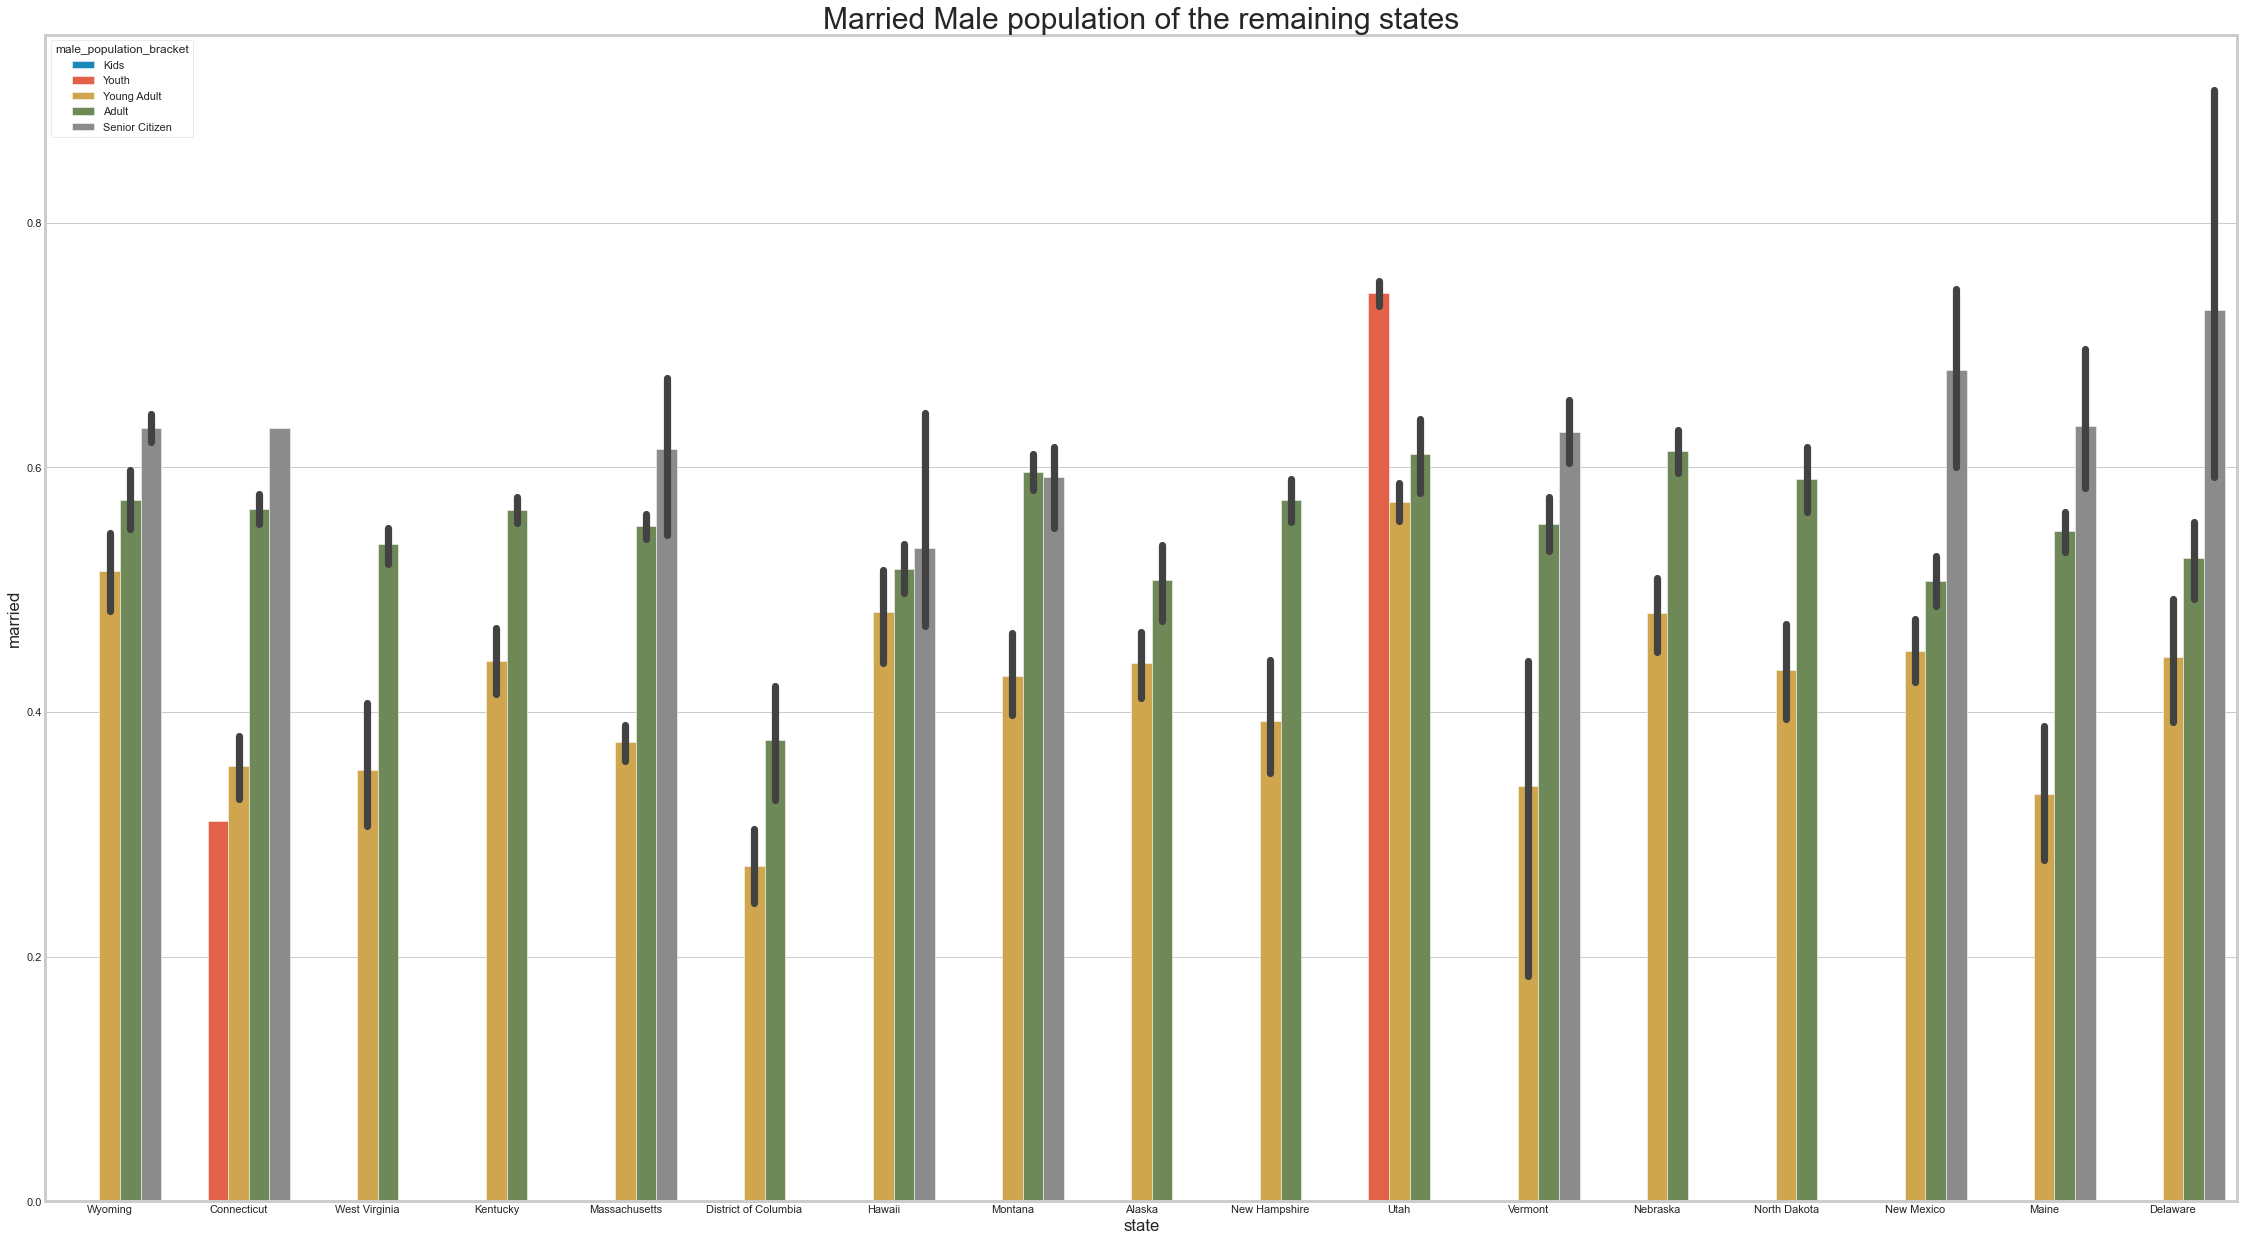

In [401]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Wyoming', 'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts', 'District of Columbia', 
                    'Hawaii', 'Montana', 'Alaska', 'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 
                    'New Mexico', 'Maine', 'Delaware']).set_title('Married Male population of the remaining states', fontsize = 30)

plt.show()

- We can see from the above 3 plots that Ohio & Georgia states have married male Kids which is quite surprising.
- New York state has the highest married Youth among all the states.

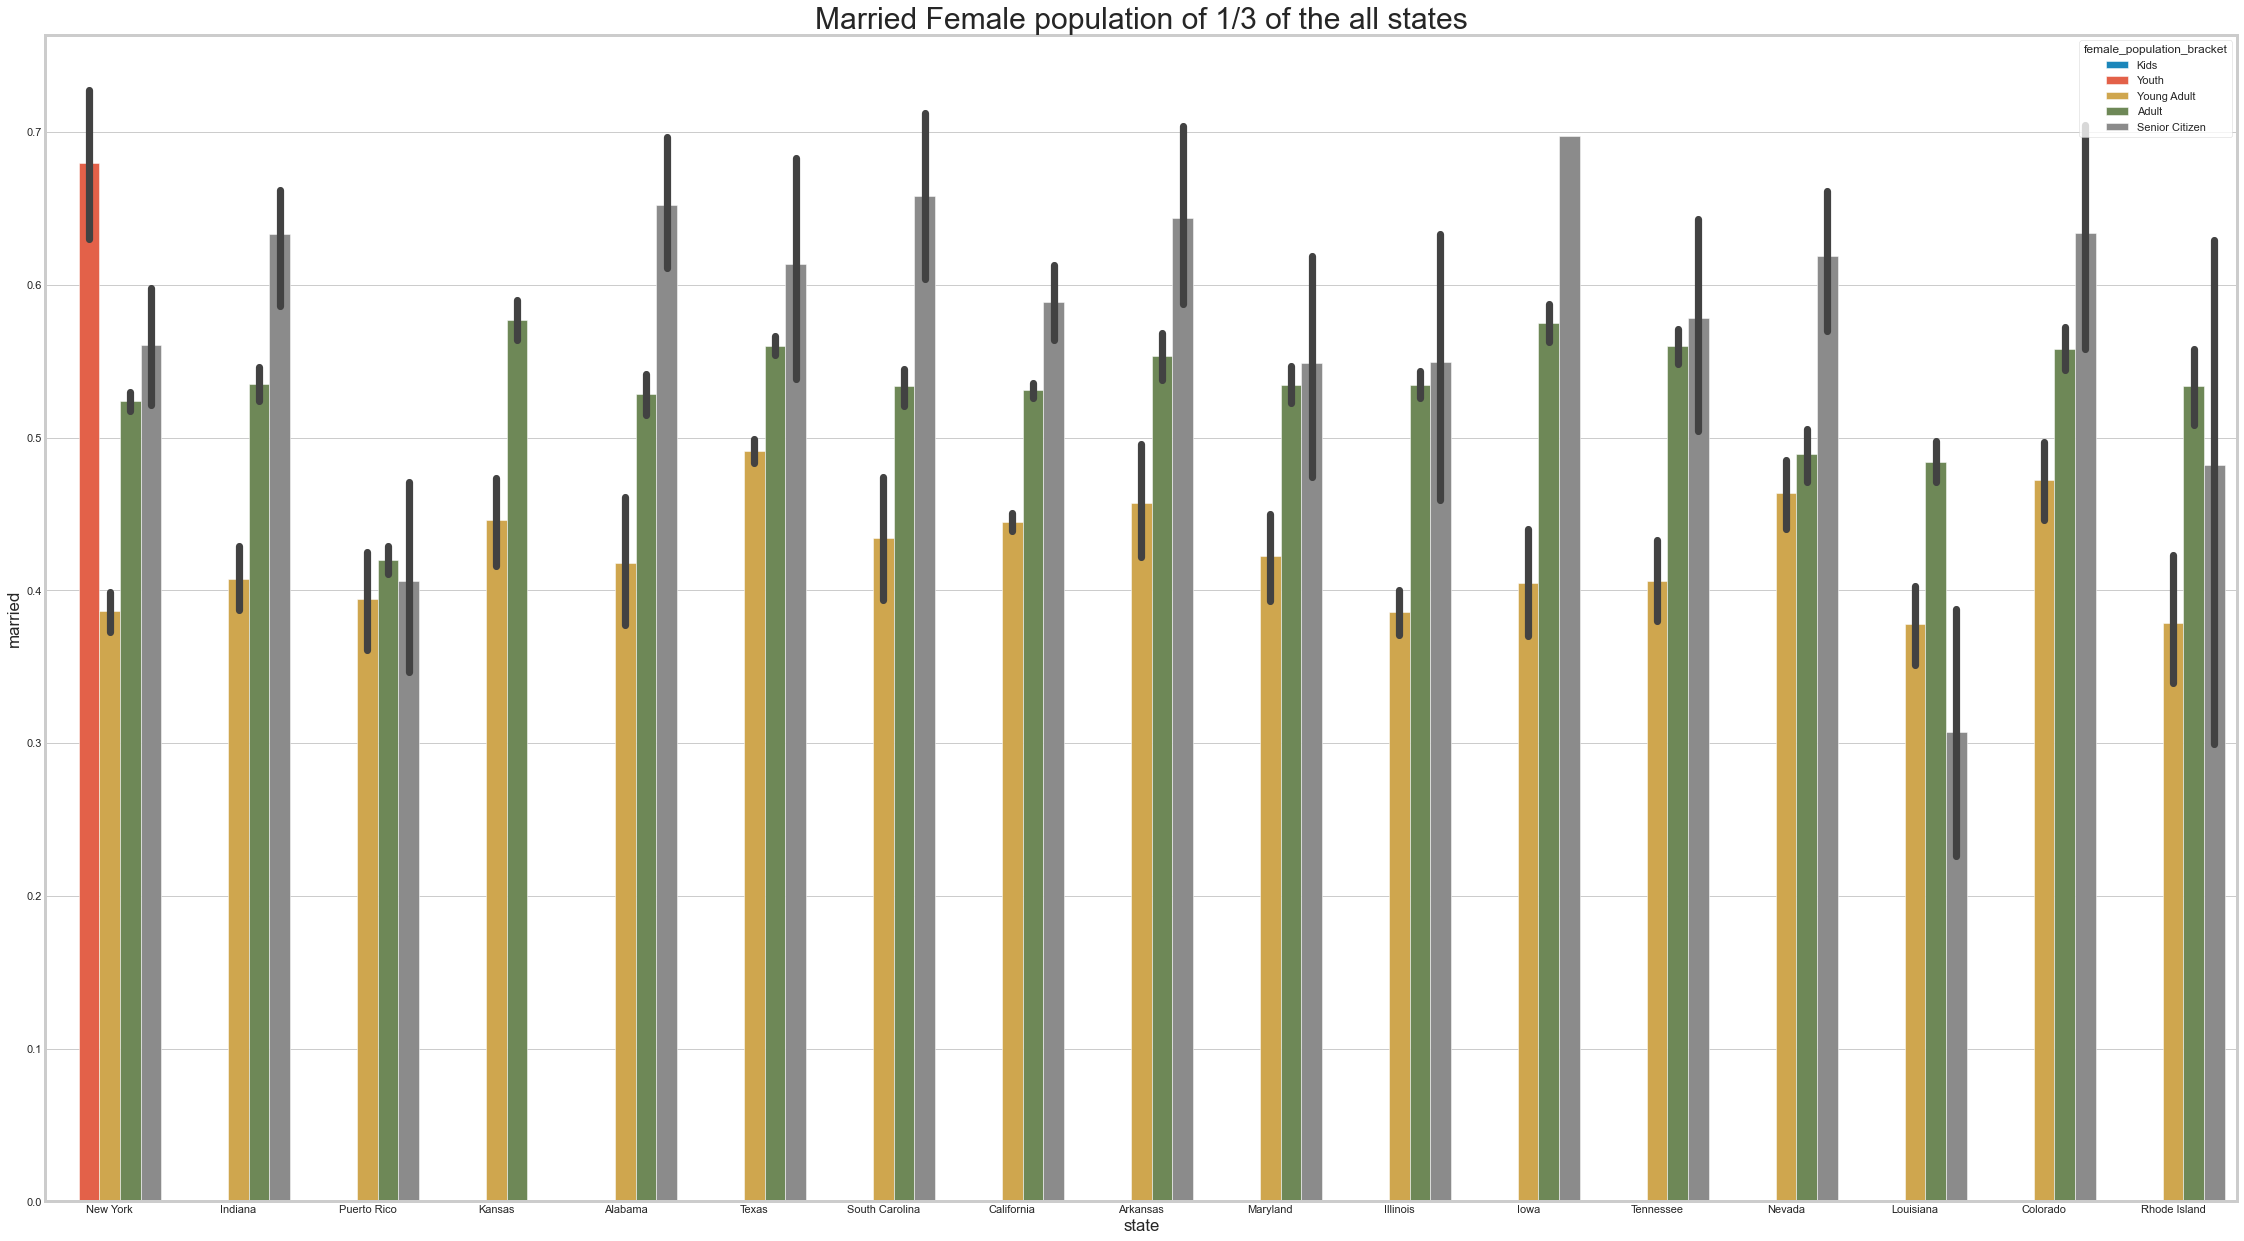

In [402]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas', 'South Carolina', 'California', 
                    'Arkansas', 'Maryland', 'Illinois', 'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado', 
                    'Rhode Island']).set_title('Married Female population of 1/3 of the all states', fontsize = 30)

plt.show()

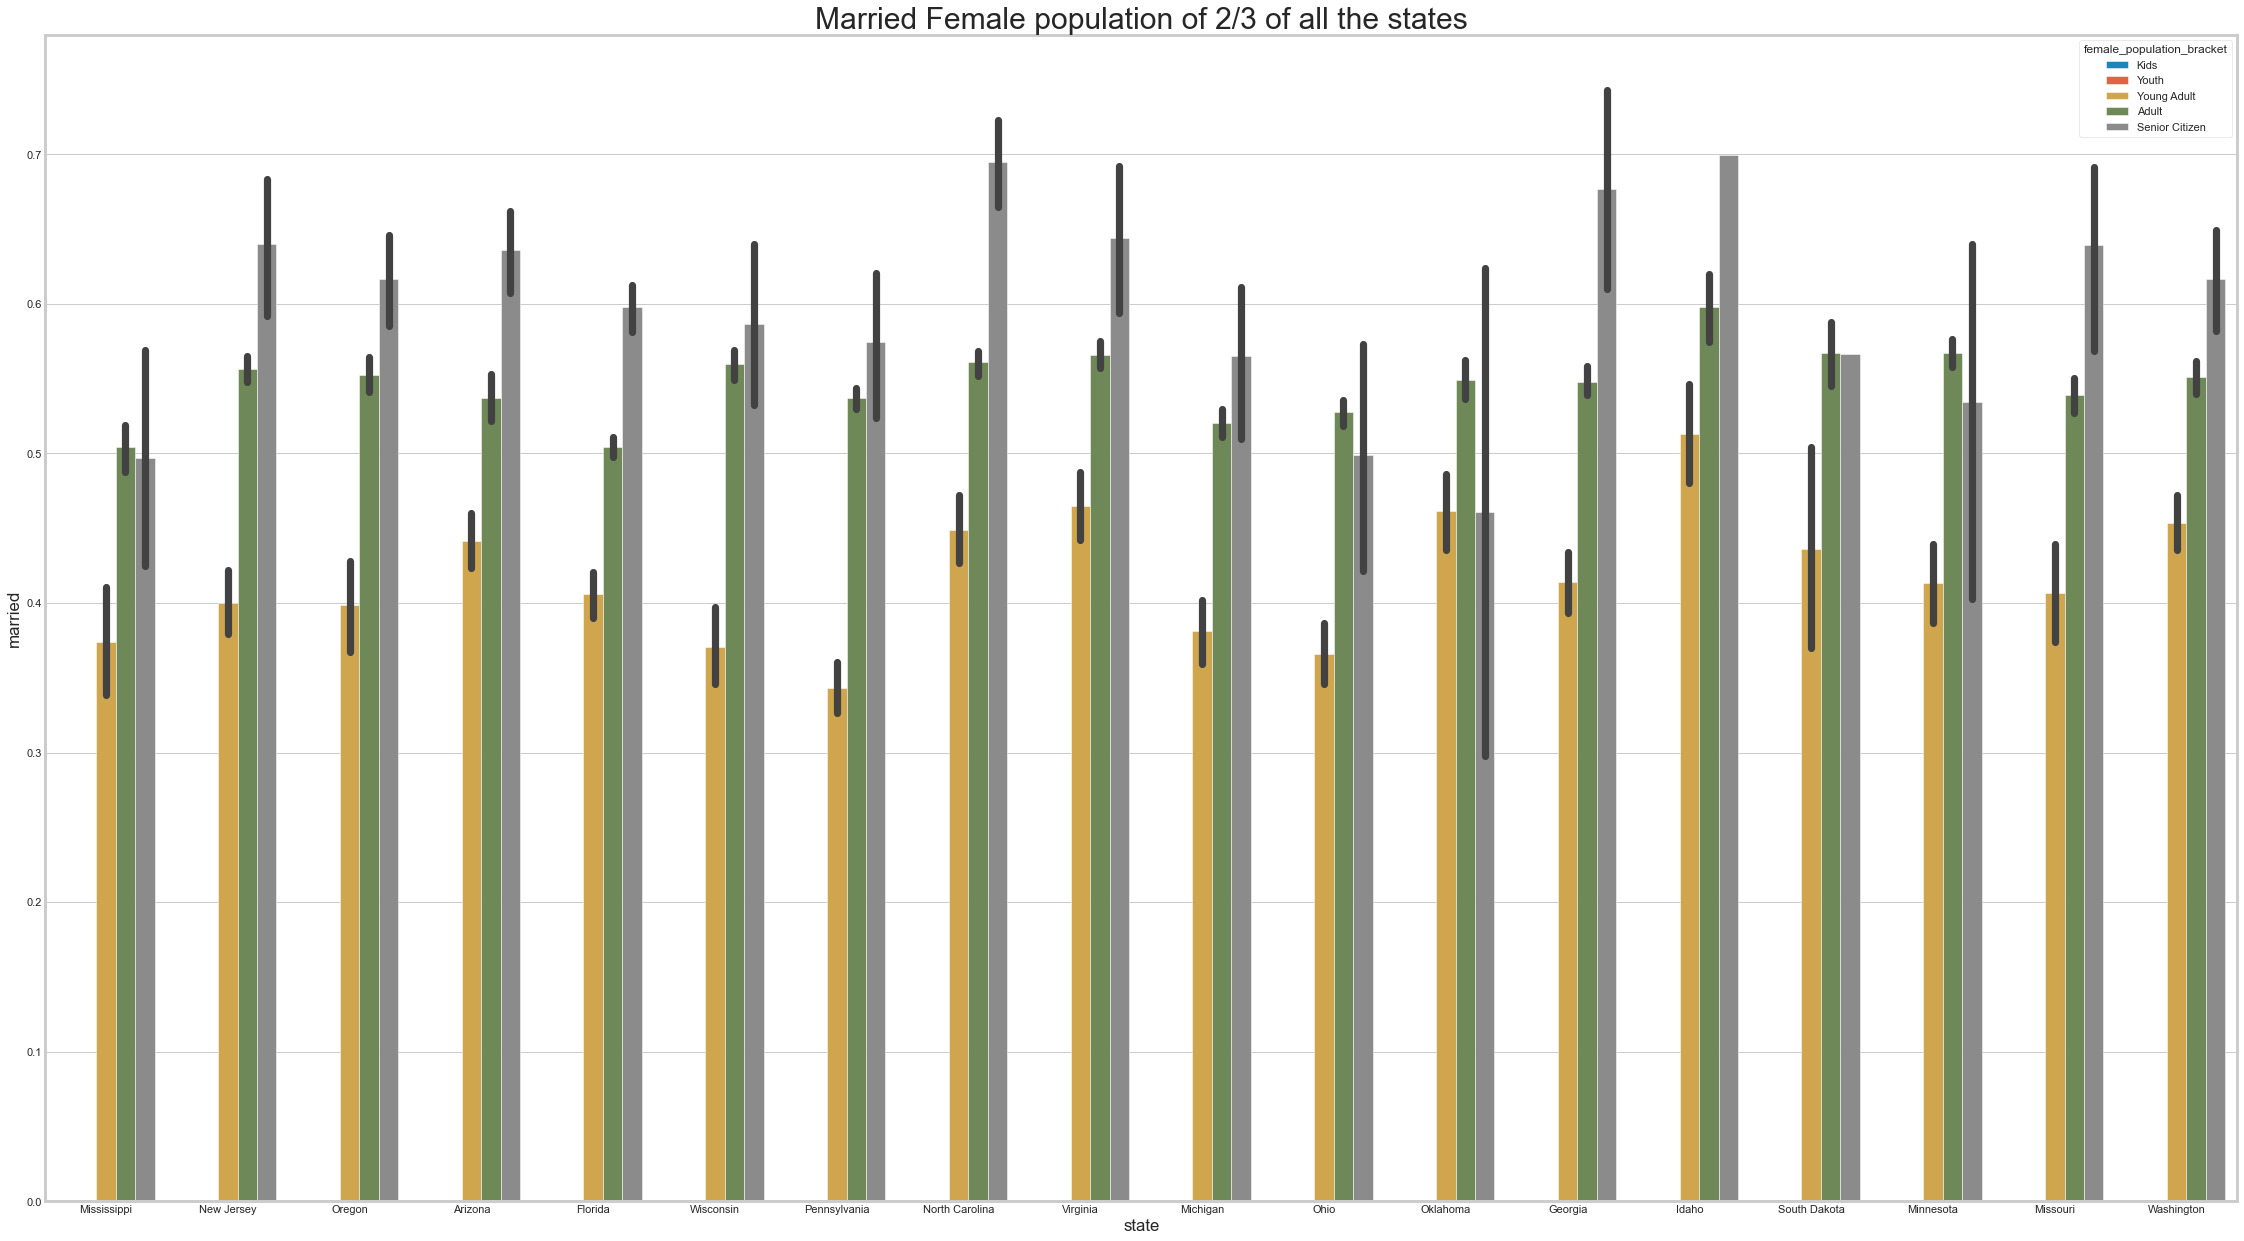

In [403]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Mississippi', 'New Jersey', 'Oregon', 'Arizona', 'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina', 
                    'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota', 'Missouri', 
                    'Washington']).set_title('Married Female population of 2/3 of all the states', fontsize = 30)

plt.show()

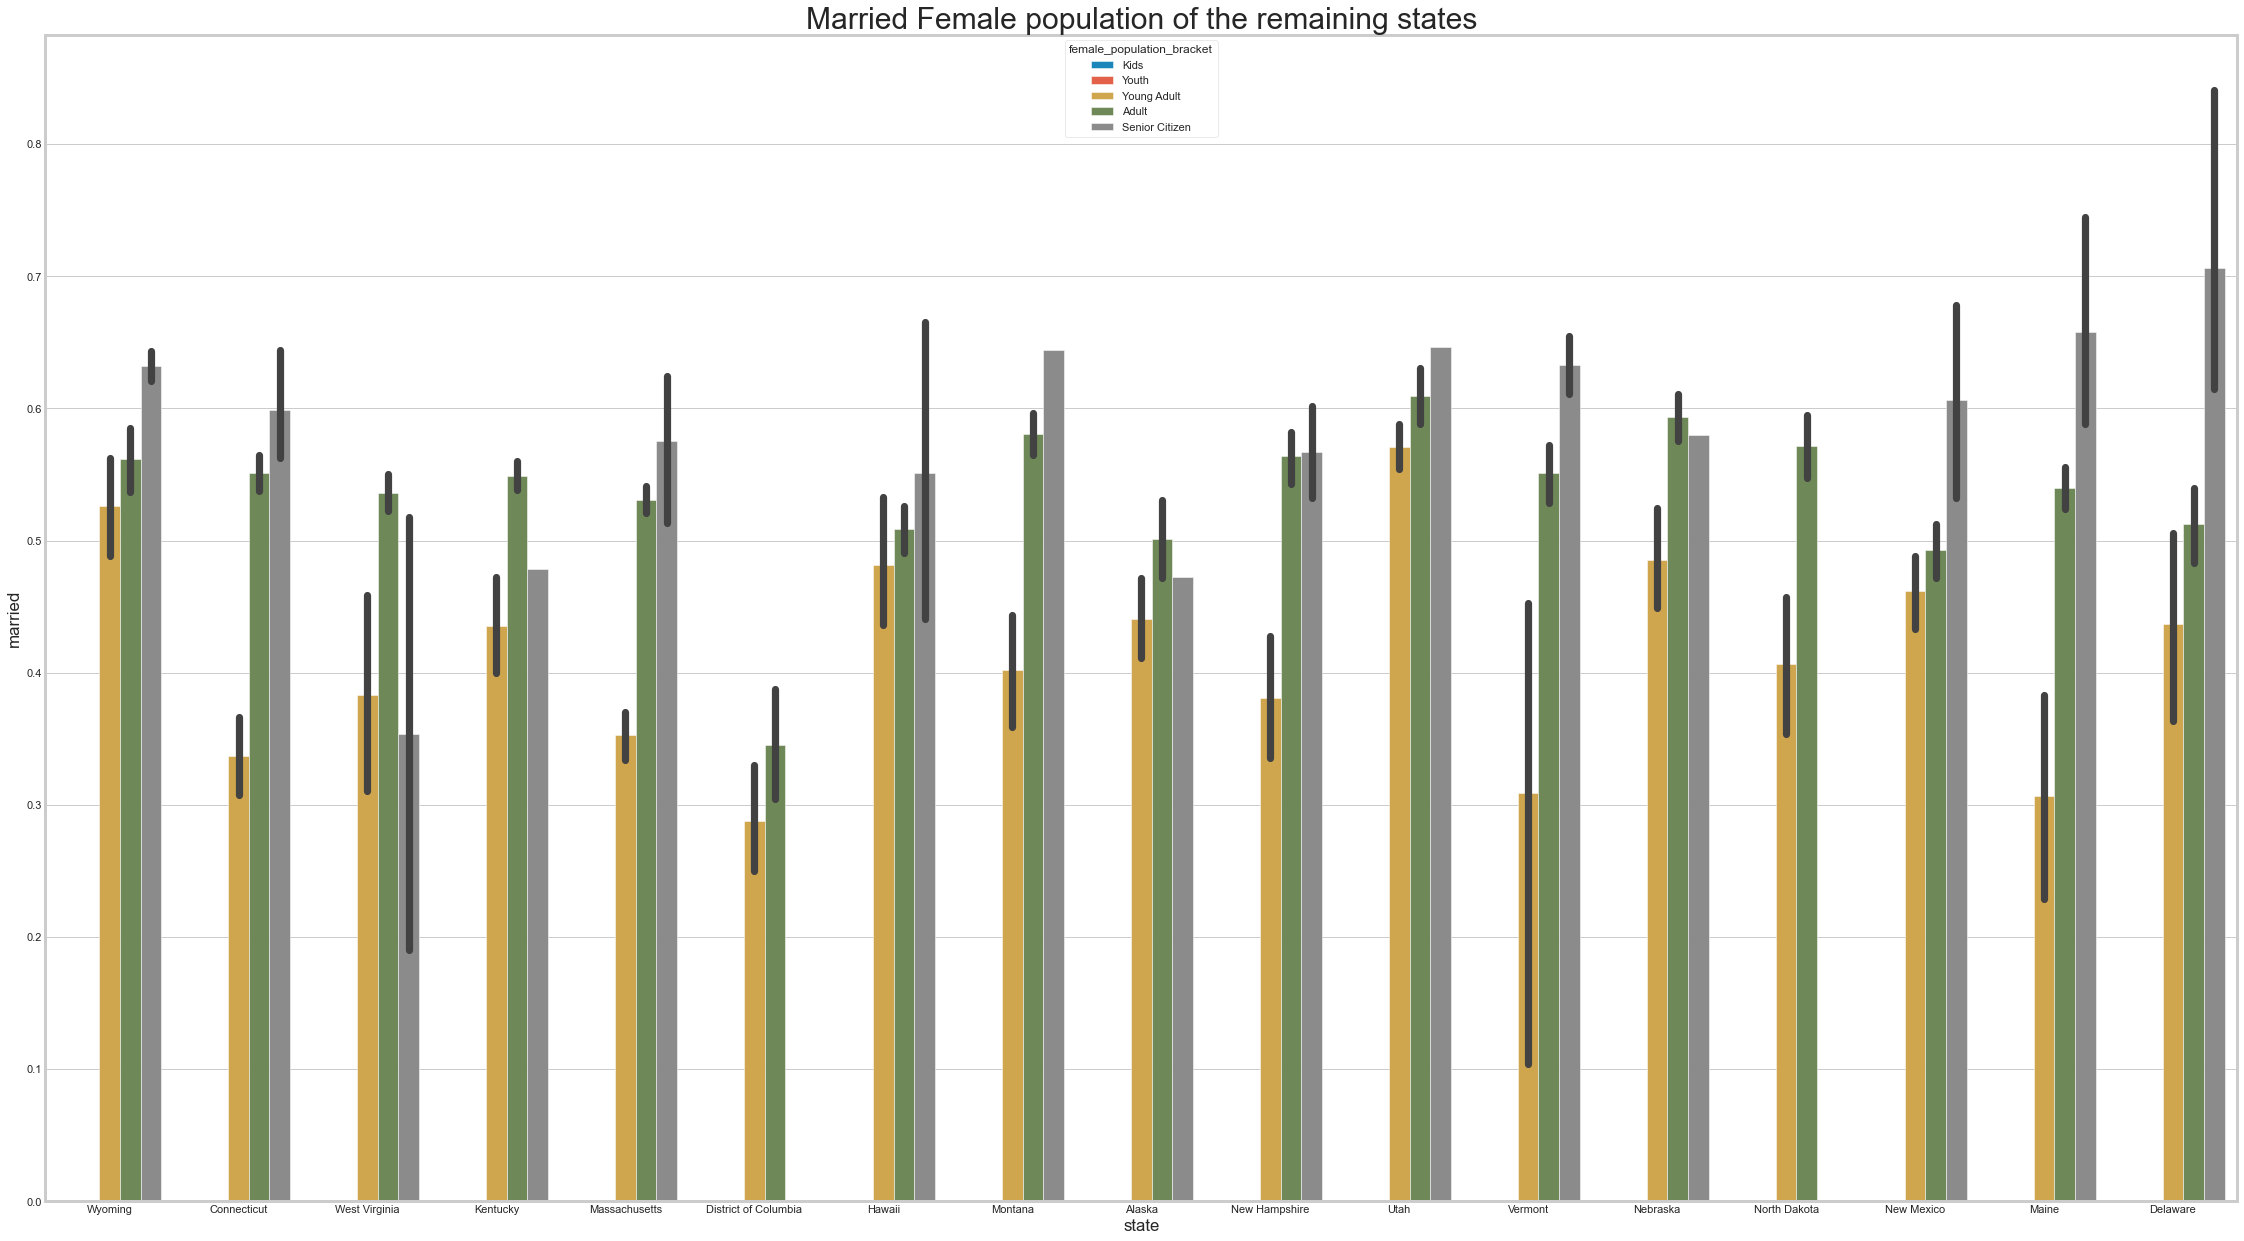

In [404]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Wyoming', 'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts', 'District of Columbia', 
                    'Hawaii', 'Montana', 'Alaska', 'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 
                    'New Mexico', 'Maine', 'Delaware']).set_title('Married Female population of the remaining states', fontsize = 30)

plt.show()

- New York state is the only state having married Female Youth, while in case of male population there are multiple states having married male Youth. That means either the female partners of those males are dead and these males are considered as Married as there is no column for widower population or the female partners are non resident of USA and they are staying outside USA when this data was collected.
- Similarly Ohio & Gorgia states are having married male kids with no married female kids population.

## Separated Population Analysis of all states

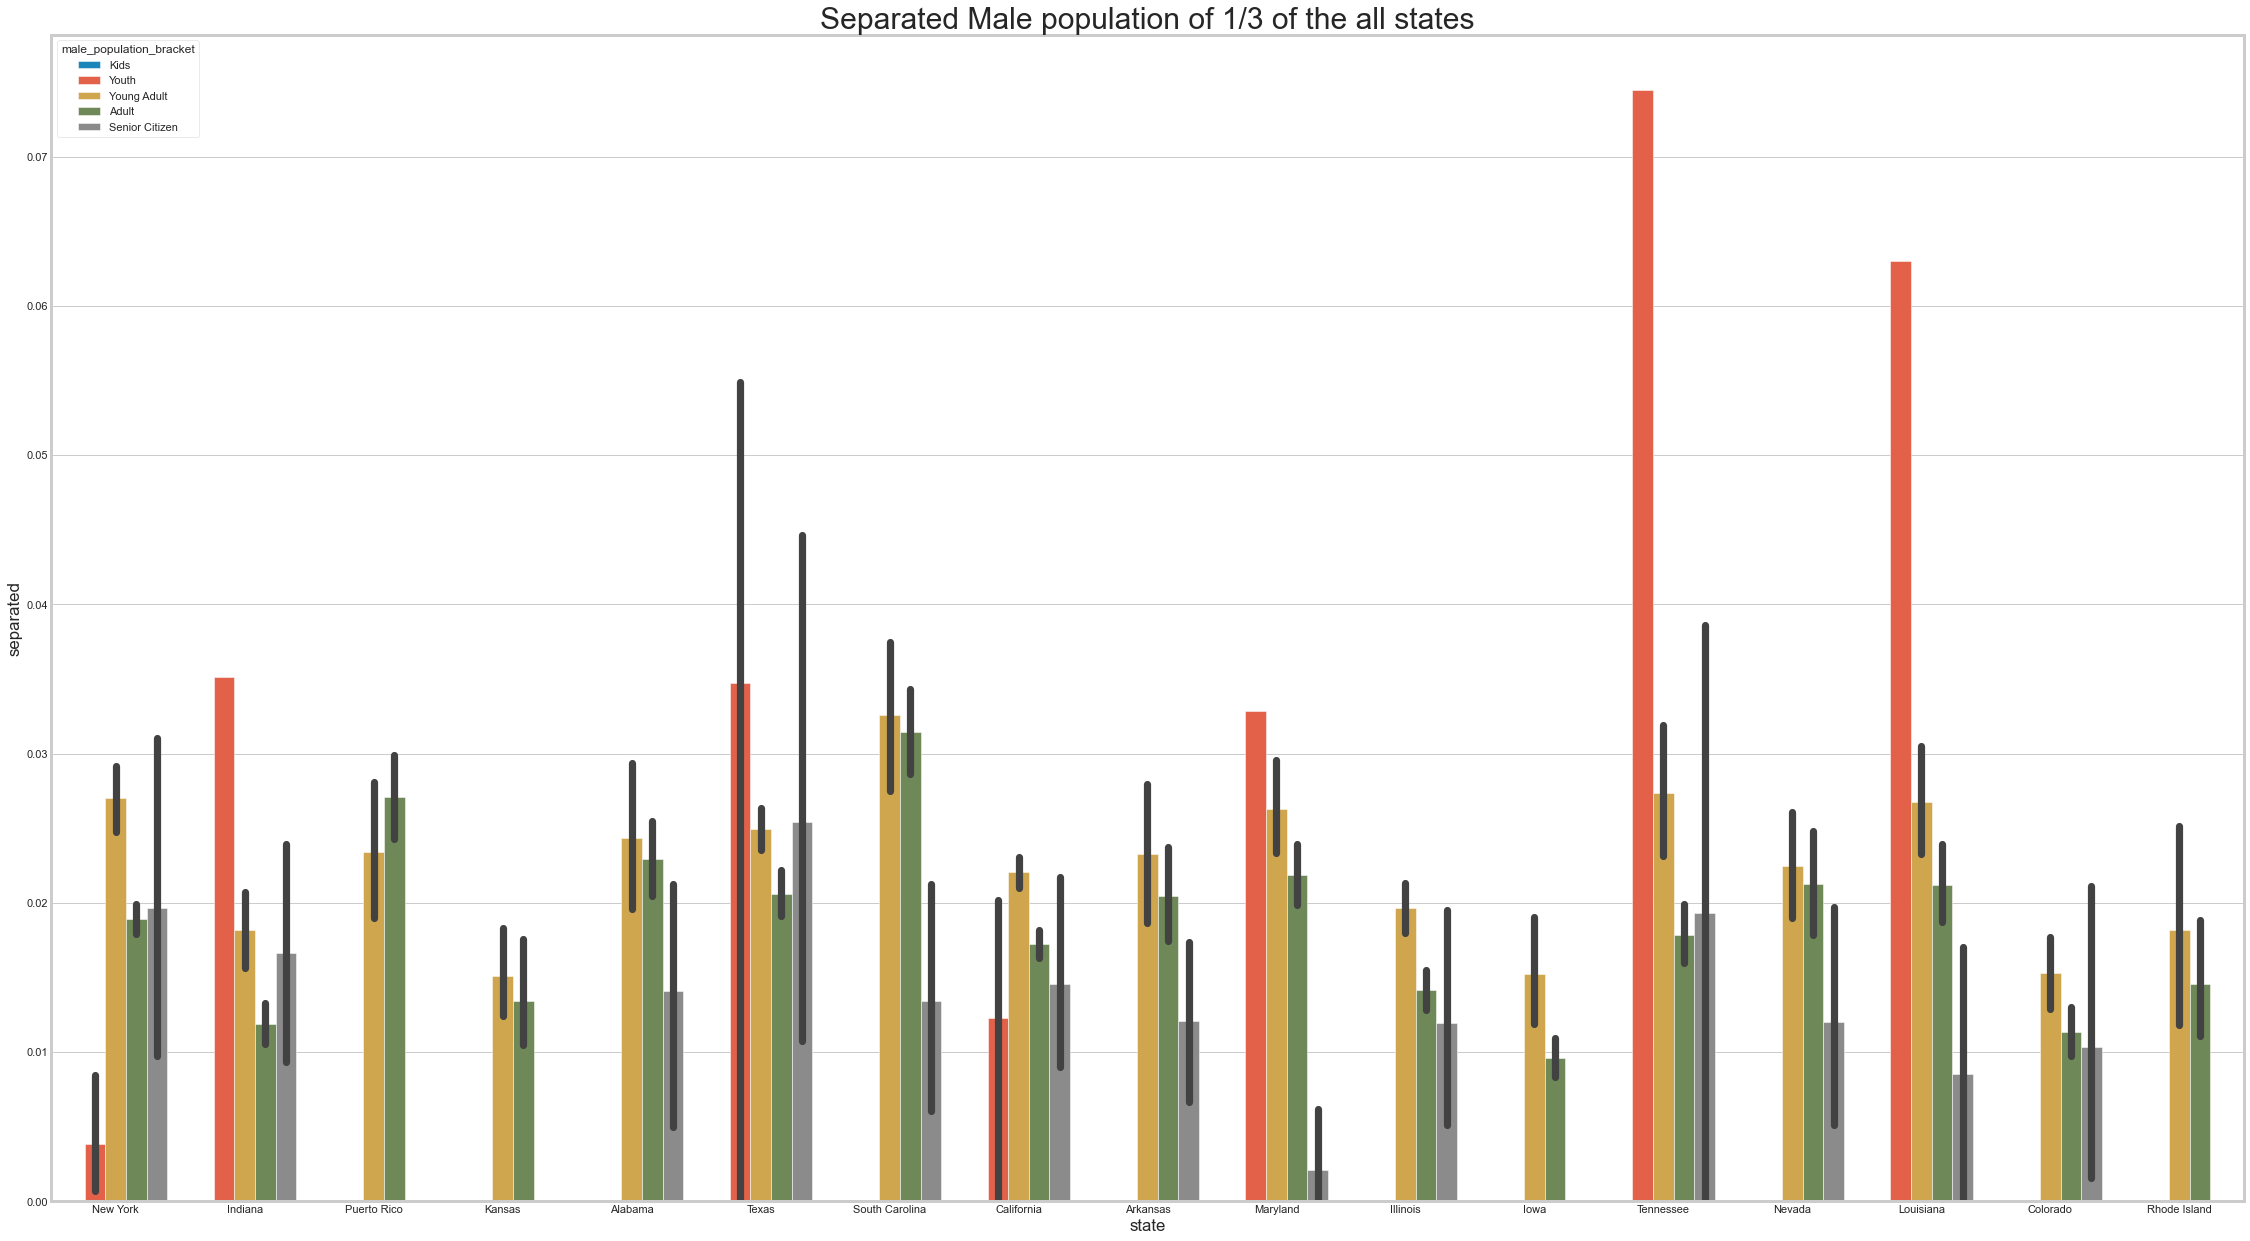

In [405]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas', 'South Carolina', 'California', 
                    'Arkansas', 'Maryland', 'Illinois', 'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado', 
                    'Rhode Island']).set_title('Separated Male population of 1/3 of the all states', fontsize = 30)

plt.show()

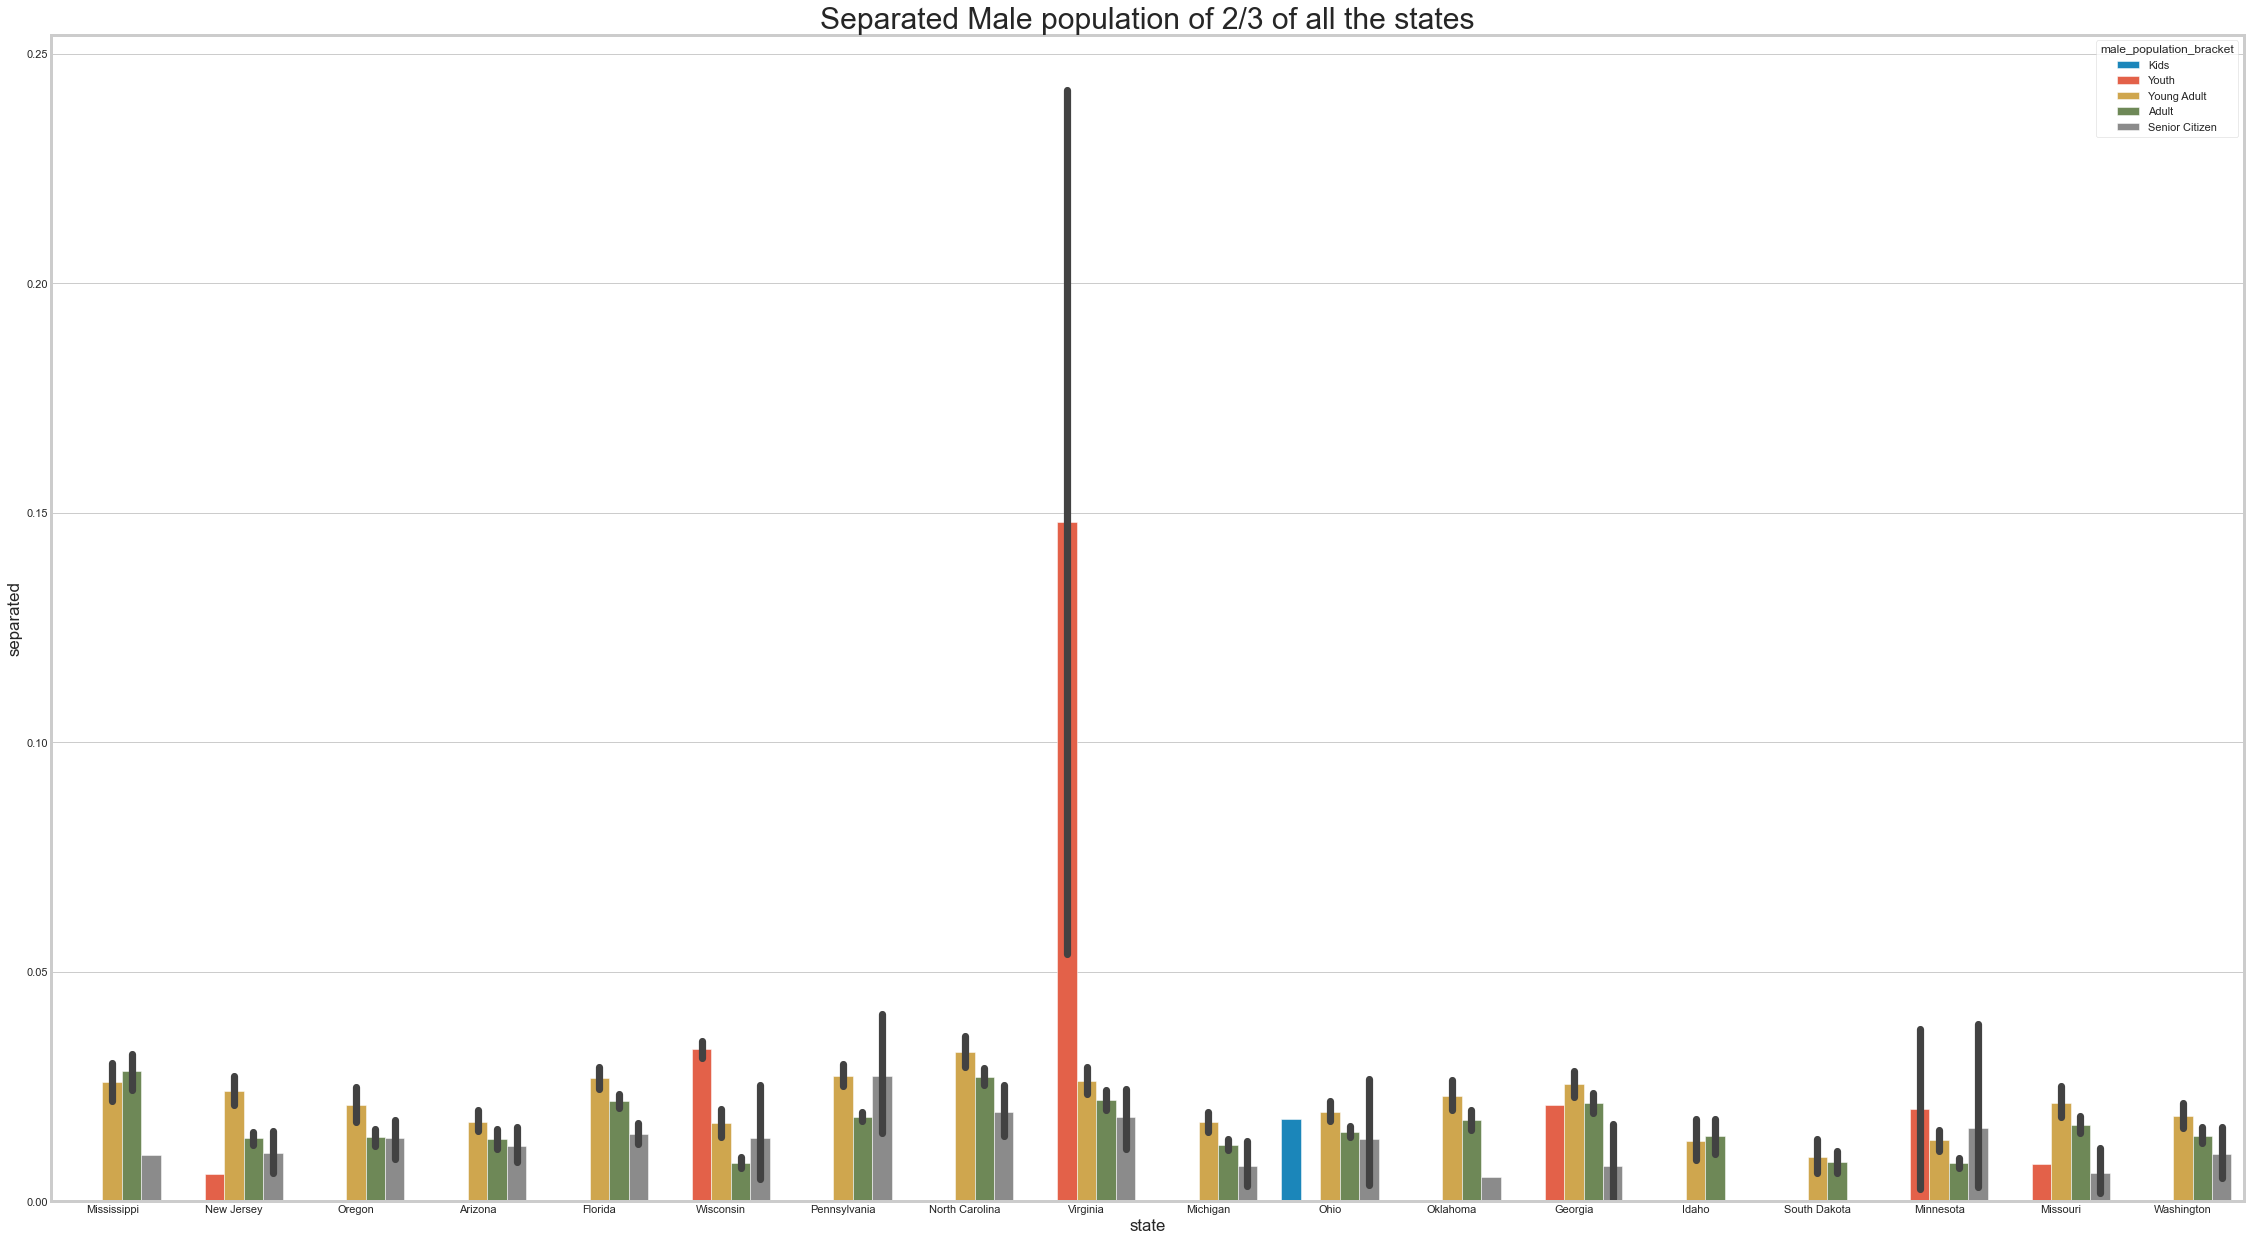

In [406]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Mississippi', 'New Jersey', 'Oregon', 'Arizona', 'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina', 
                    'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota', 'Missouri', 
                    'Washington']).set_title('Separated Male population of 2/3 of all the states', fontsize = 30)

plt.show()

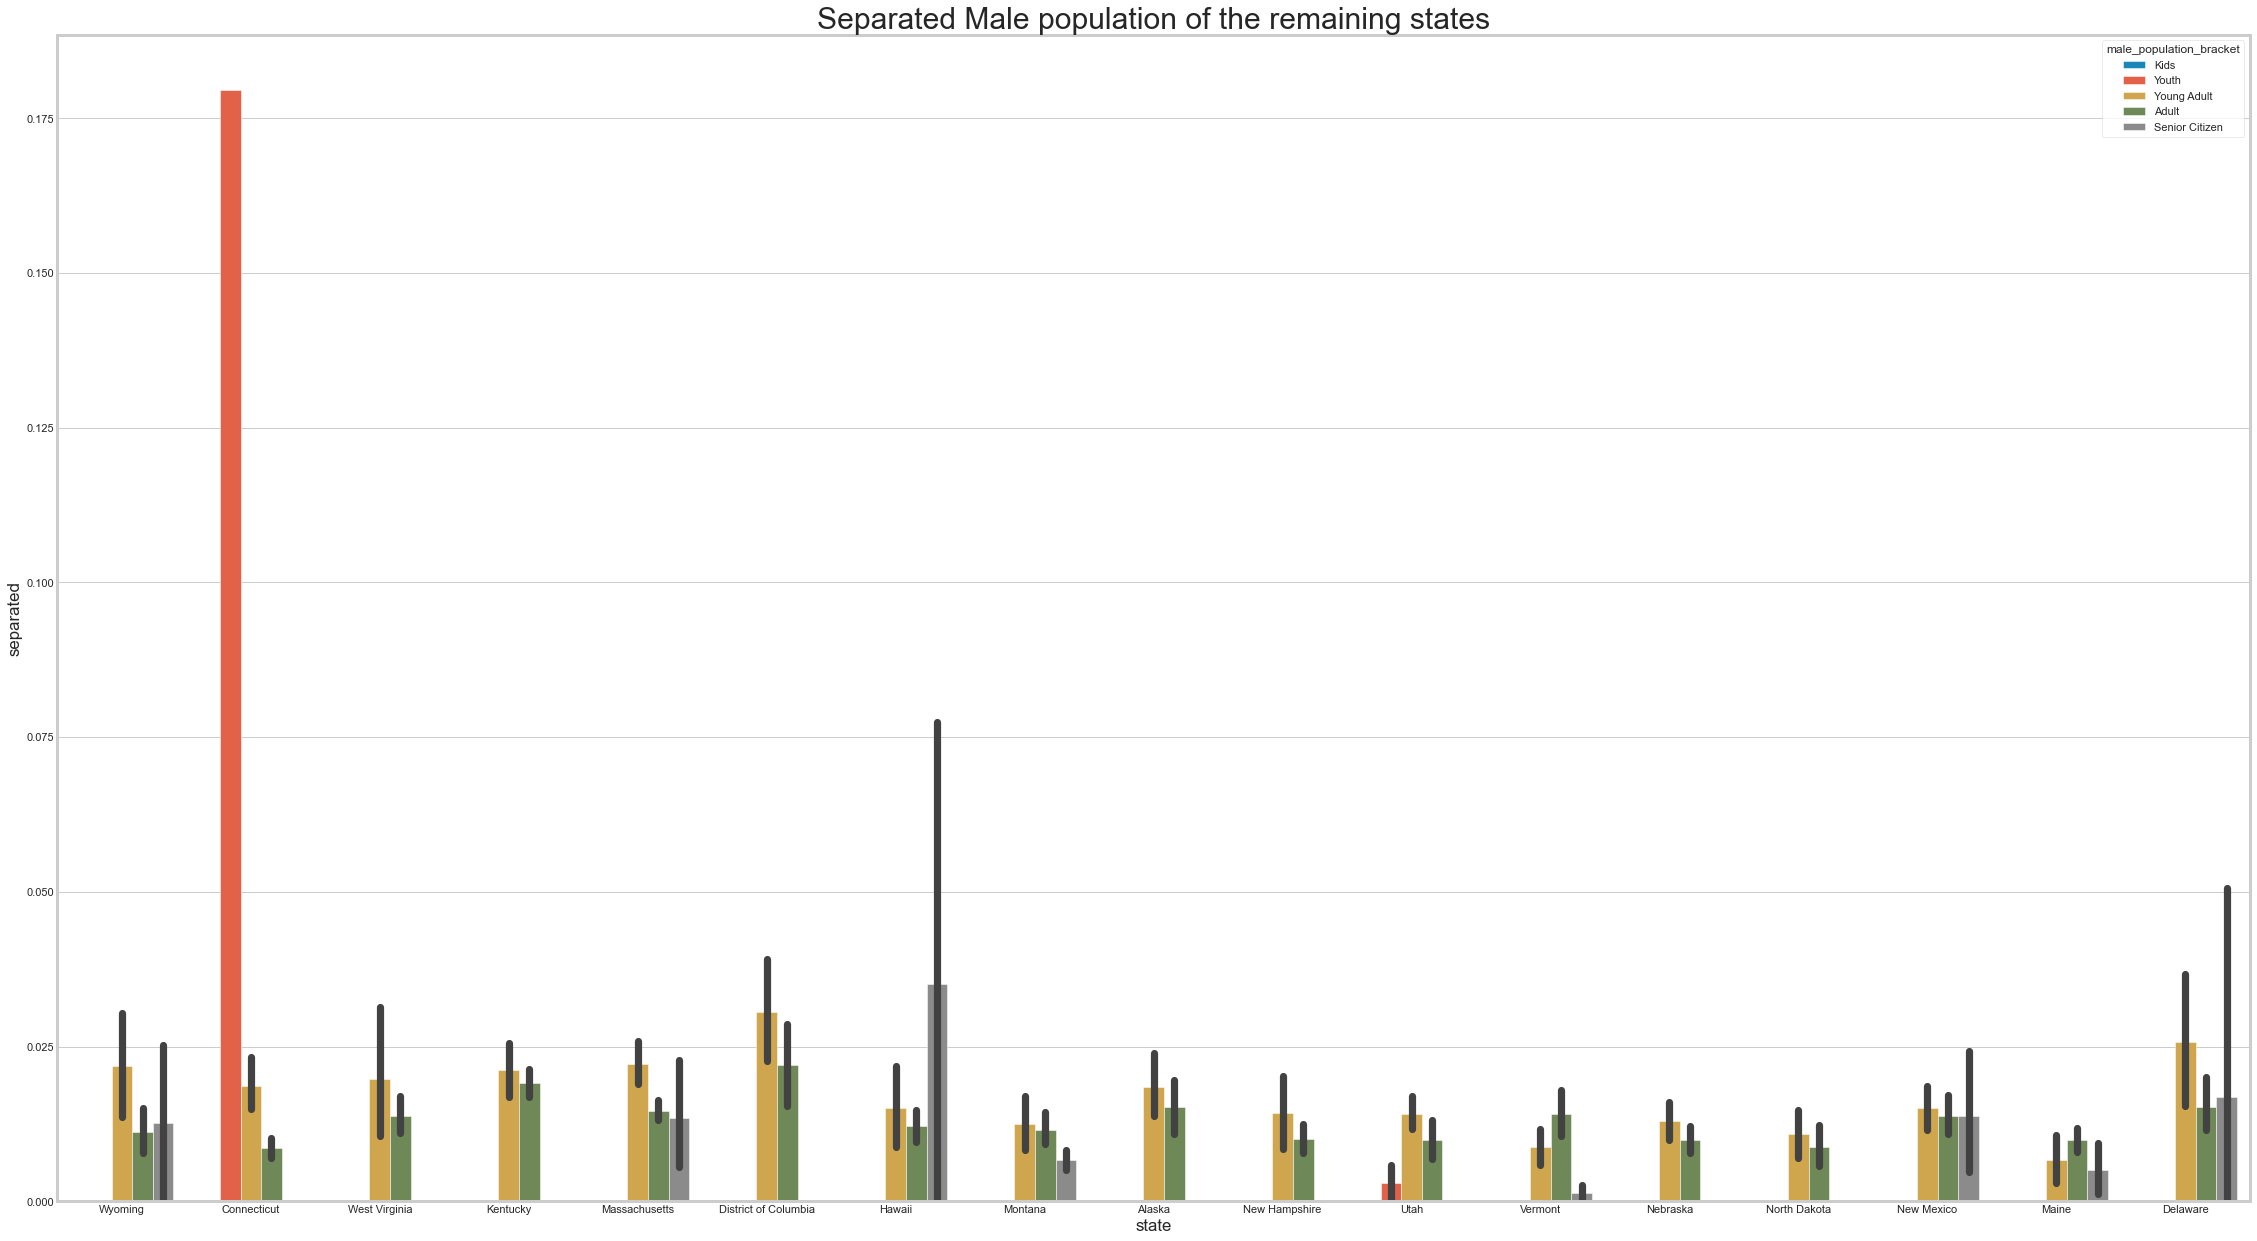

In [407]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Wyoming', 'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts', 'District of Columbia', 
                    'Hawaii', 'Montana', 'Alaska', 'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 
                    'New Mexico', 'Maine', 'Delaware']).set_title('Separated Male population of the remaining states', fontsize = 30)

plt.show()

- Ohio state has separated male Kids Population!
- Connecticut state has the highest separated male Youth population.

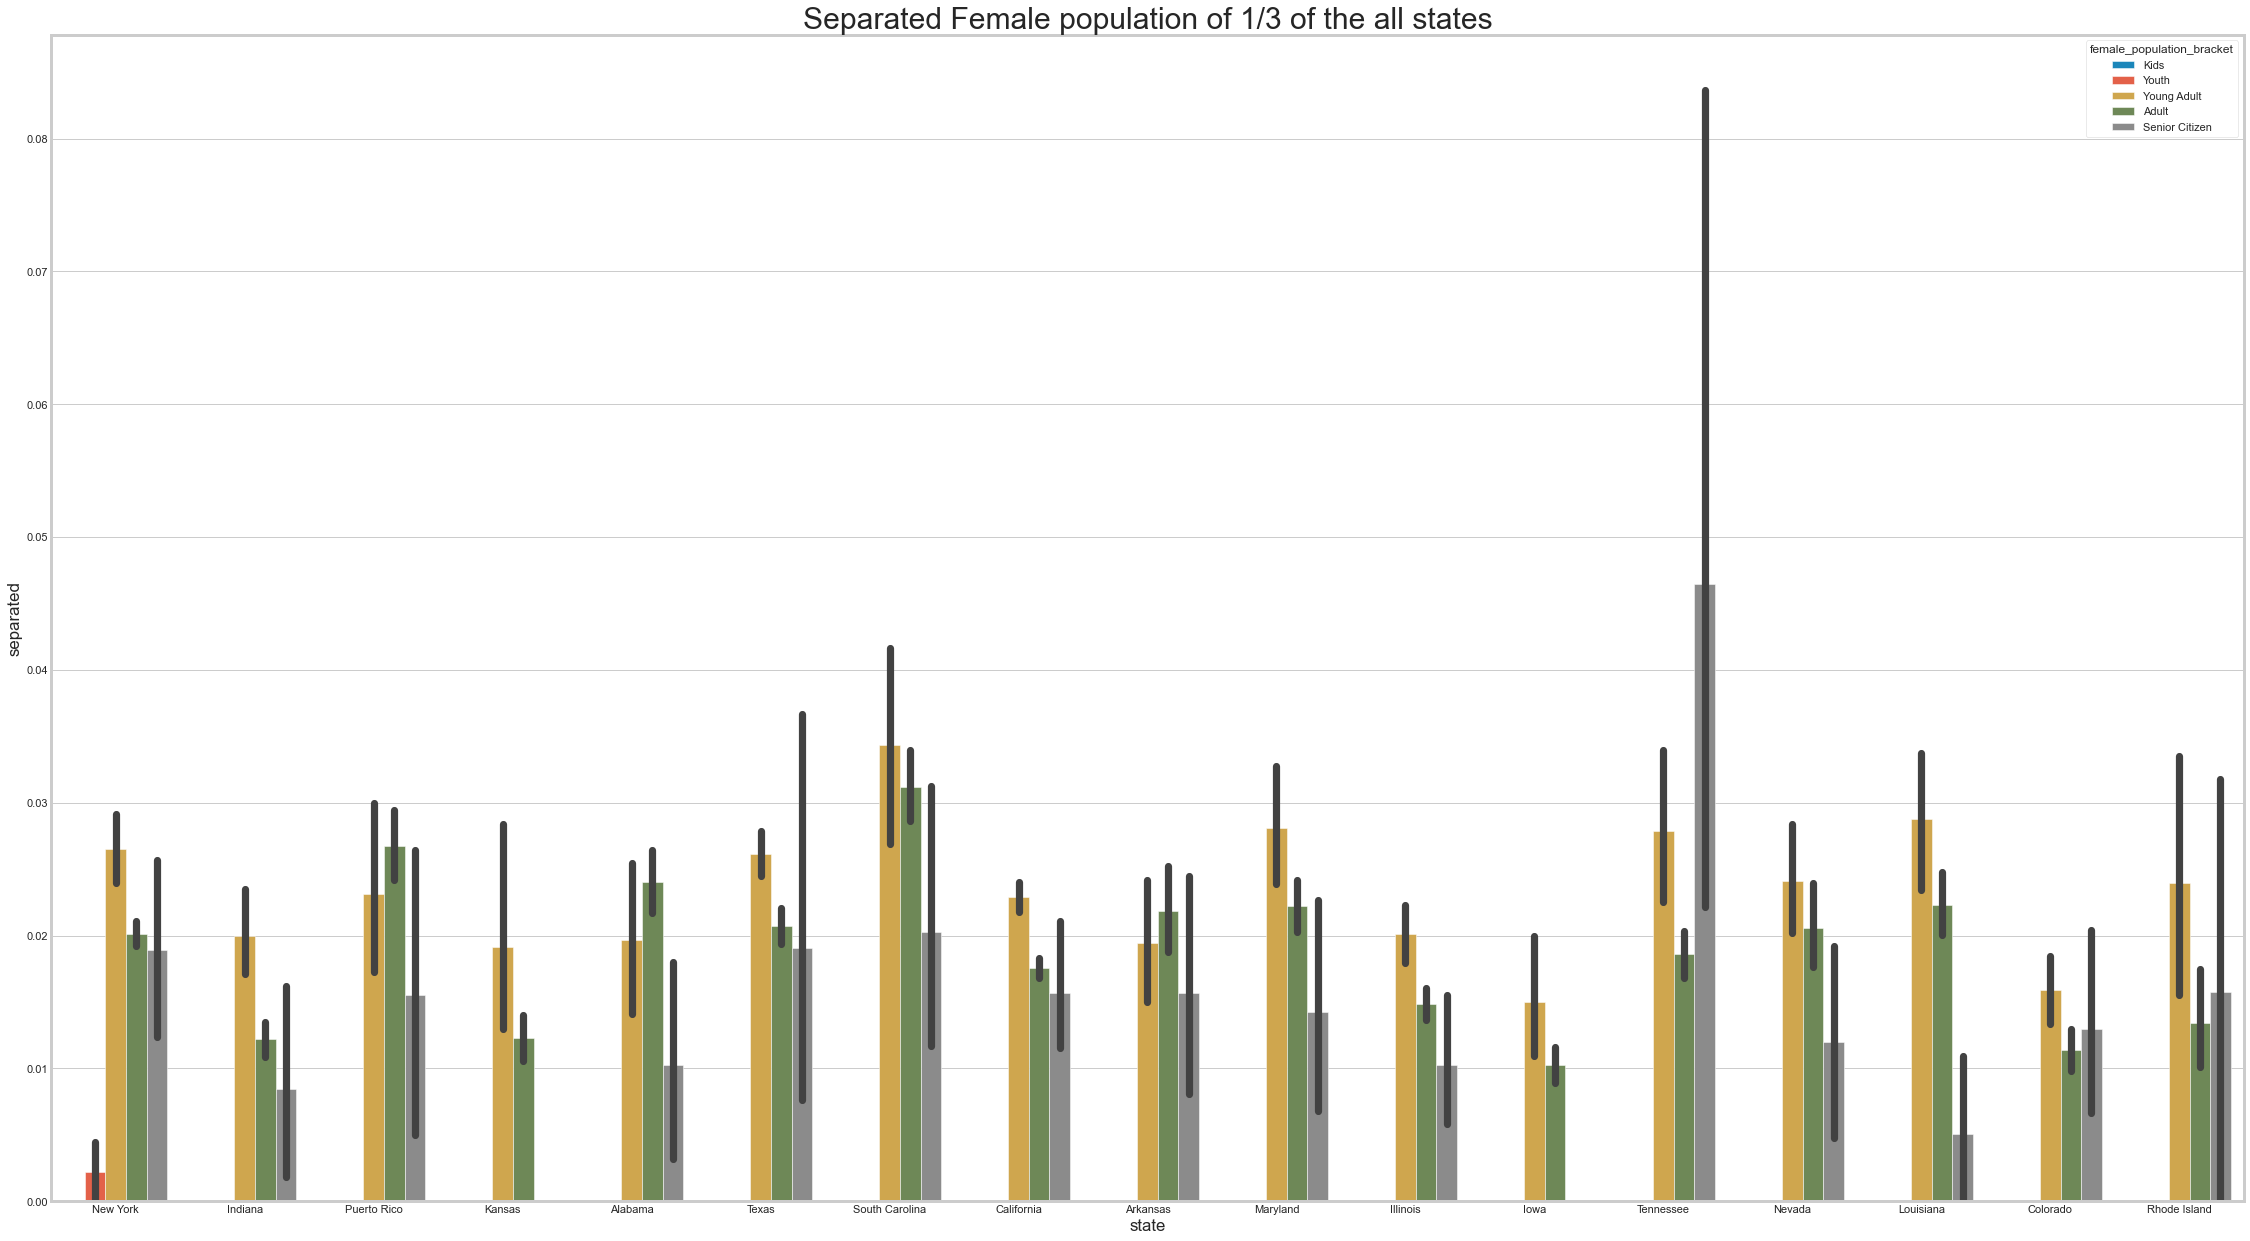

In [408]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas', 'South Carolina', 'California', 
                    'Arkansas', 'Maryland', 'Illinois', 'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado', 
                    'Rhode Island']).set_title('Separated Female population of 1/3 of the all states', fontsize = 30)

plt.show()

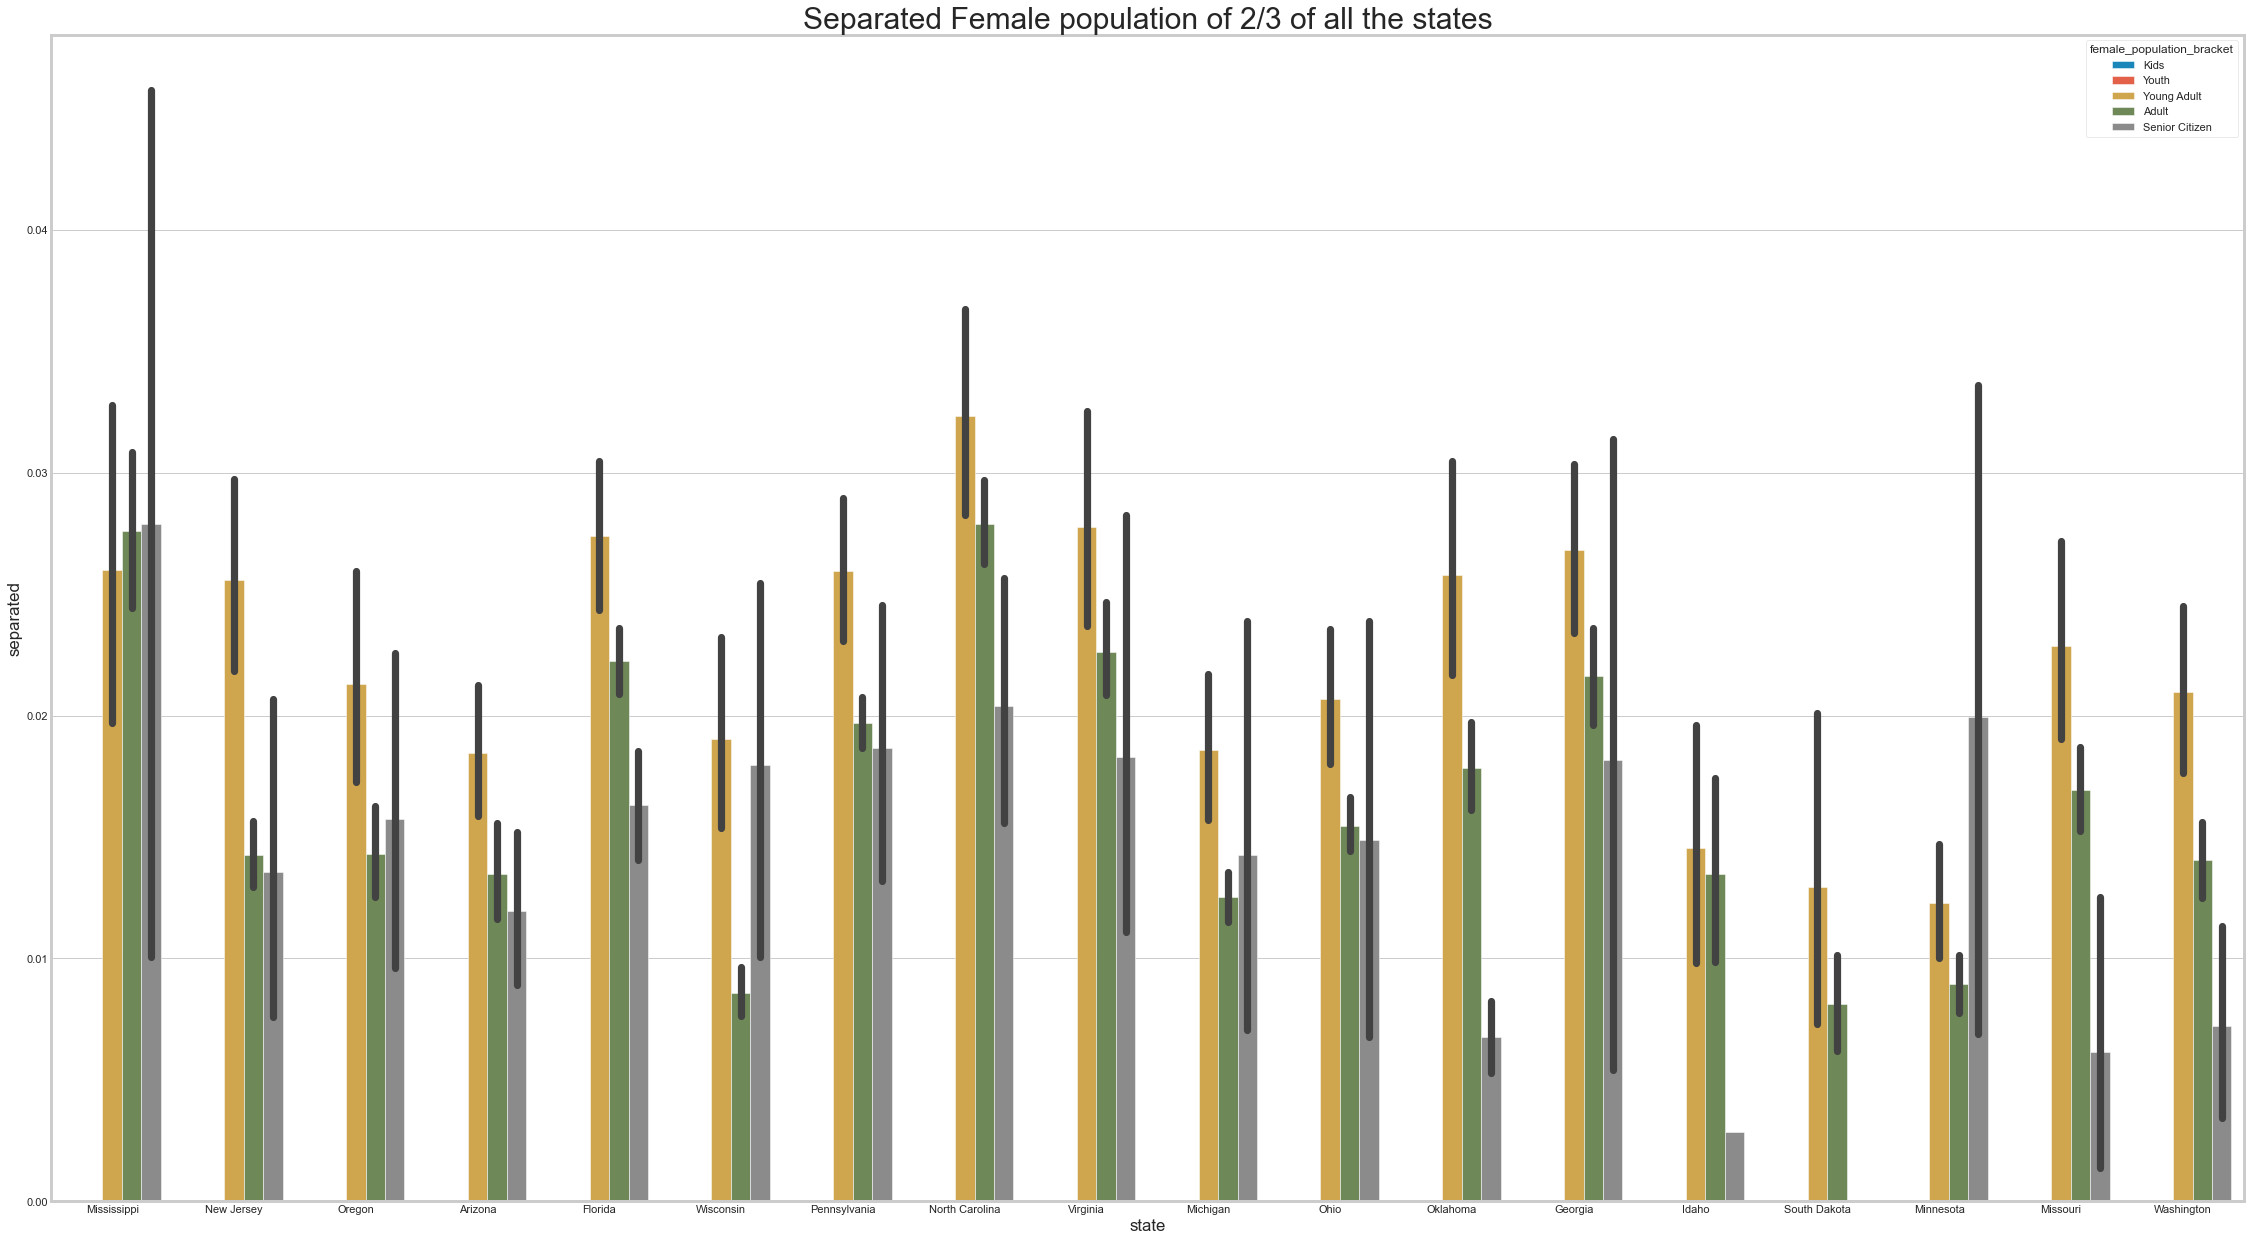

In [409]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Mississippi', 'New Jersey', 'Oregon', 'Arizona', 'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina', 
                    'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota', 'Missouri', 
                    'Washington']).set_title('Separated Female population of 2/3 of all the states', fontsize = 30)

plt.show()

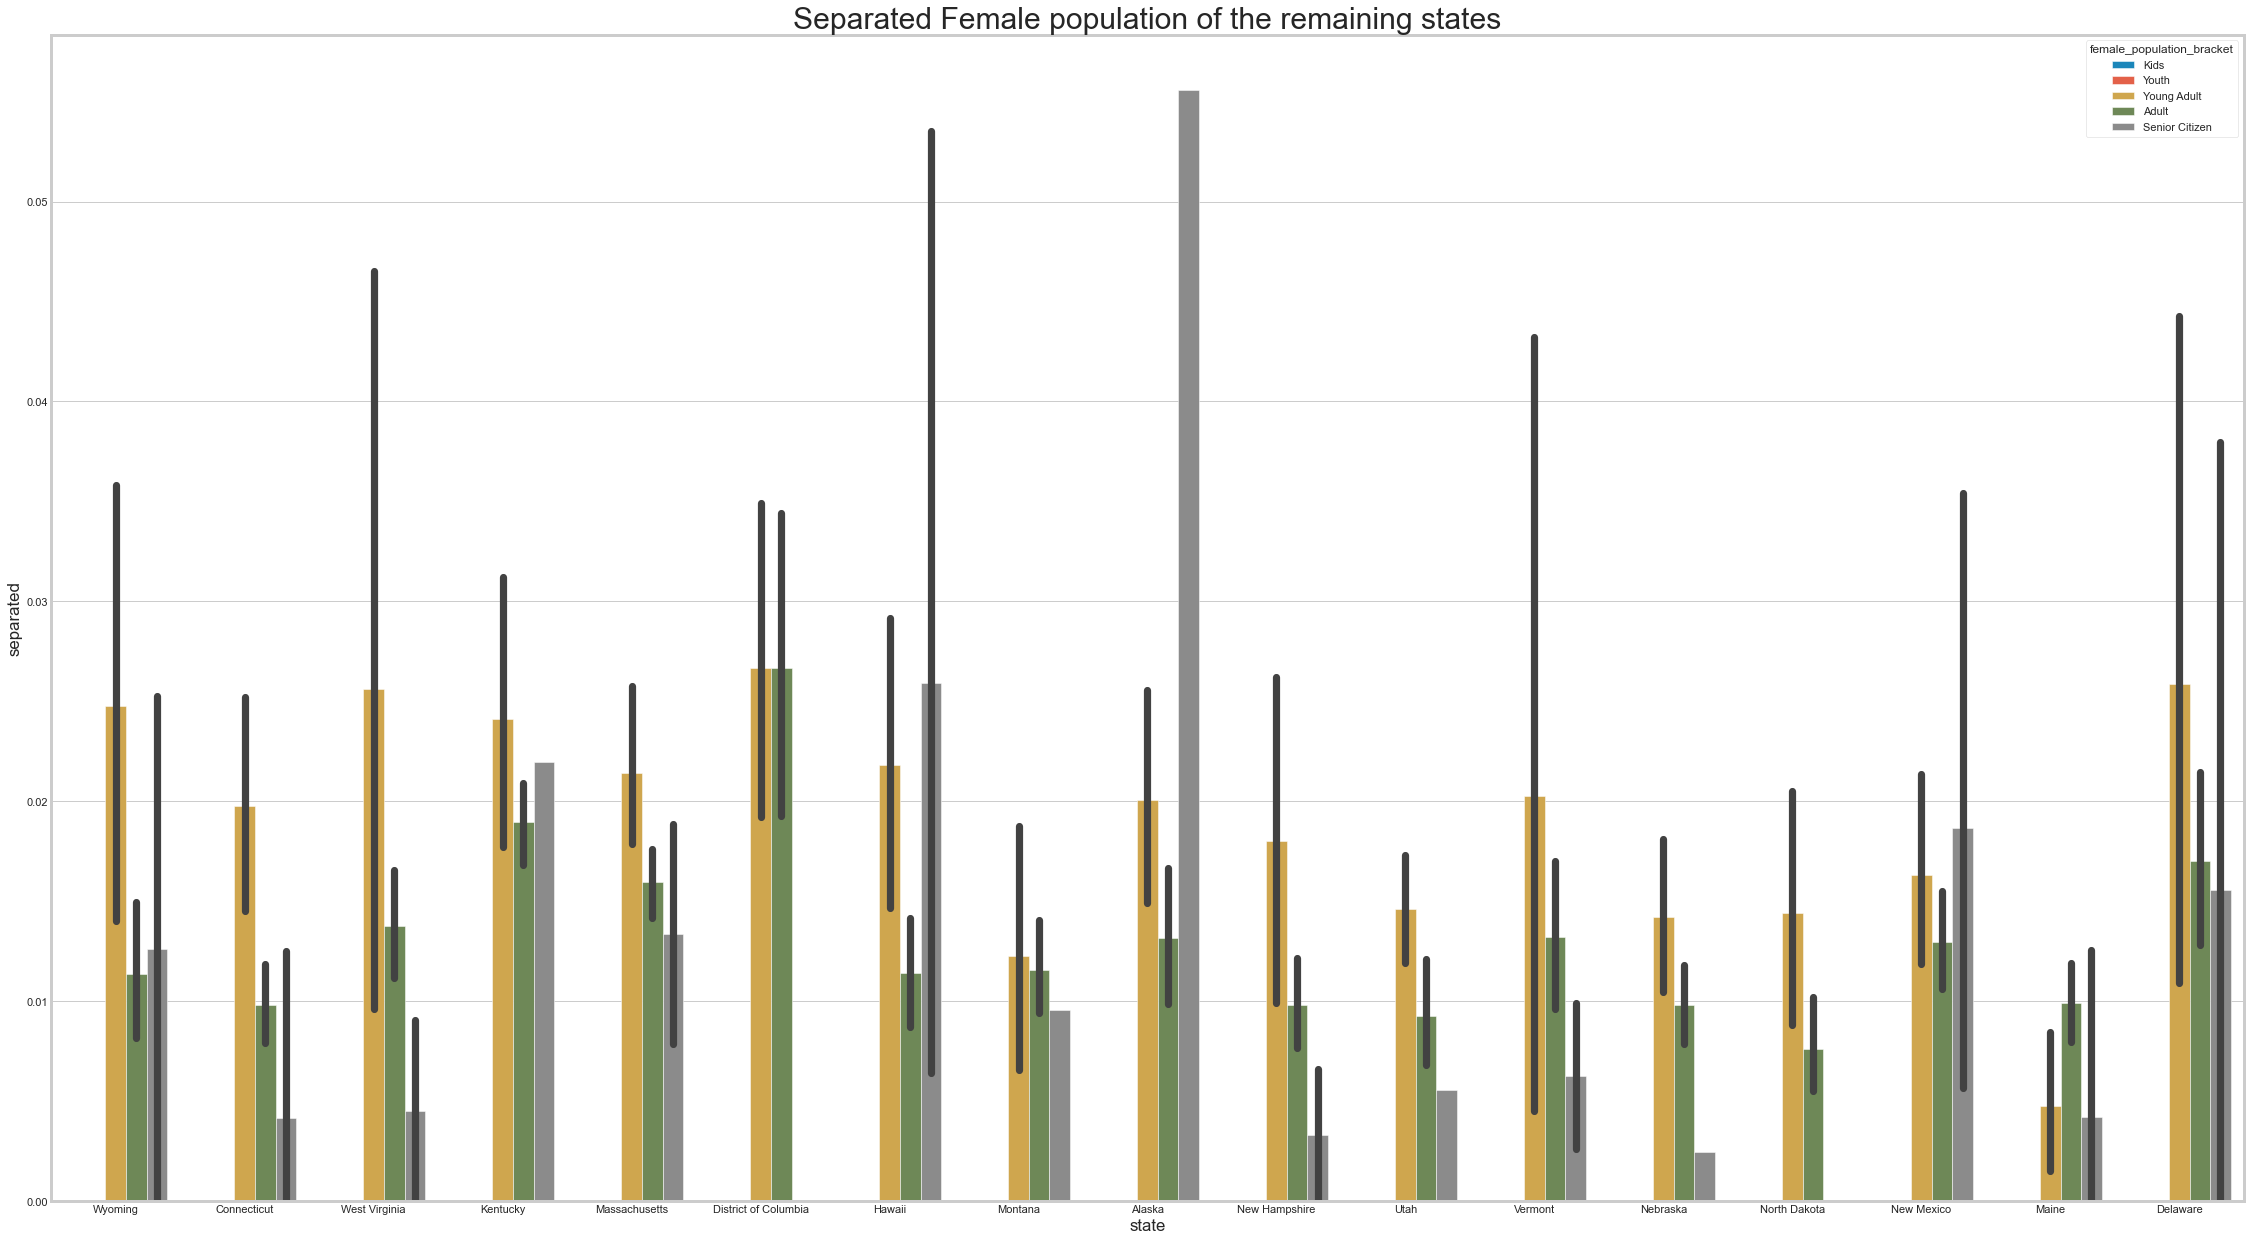

In [410]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Wyoming', 'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts', 'District of Columbia', 
                    'Hawaii', 'Montana', 'Alaska', 'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 
                    'New Mexico', 'Maine', 'Delaware']).set_title('Separated Female population of the remaining states', fontsize = 30)

plt.show()

- Except New York, no other state has separated female youth population.

## Divorced Population Analysis

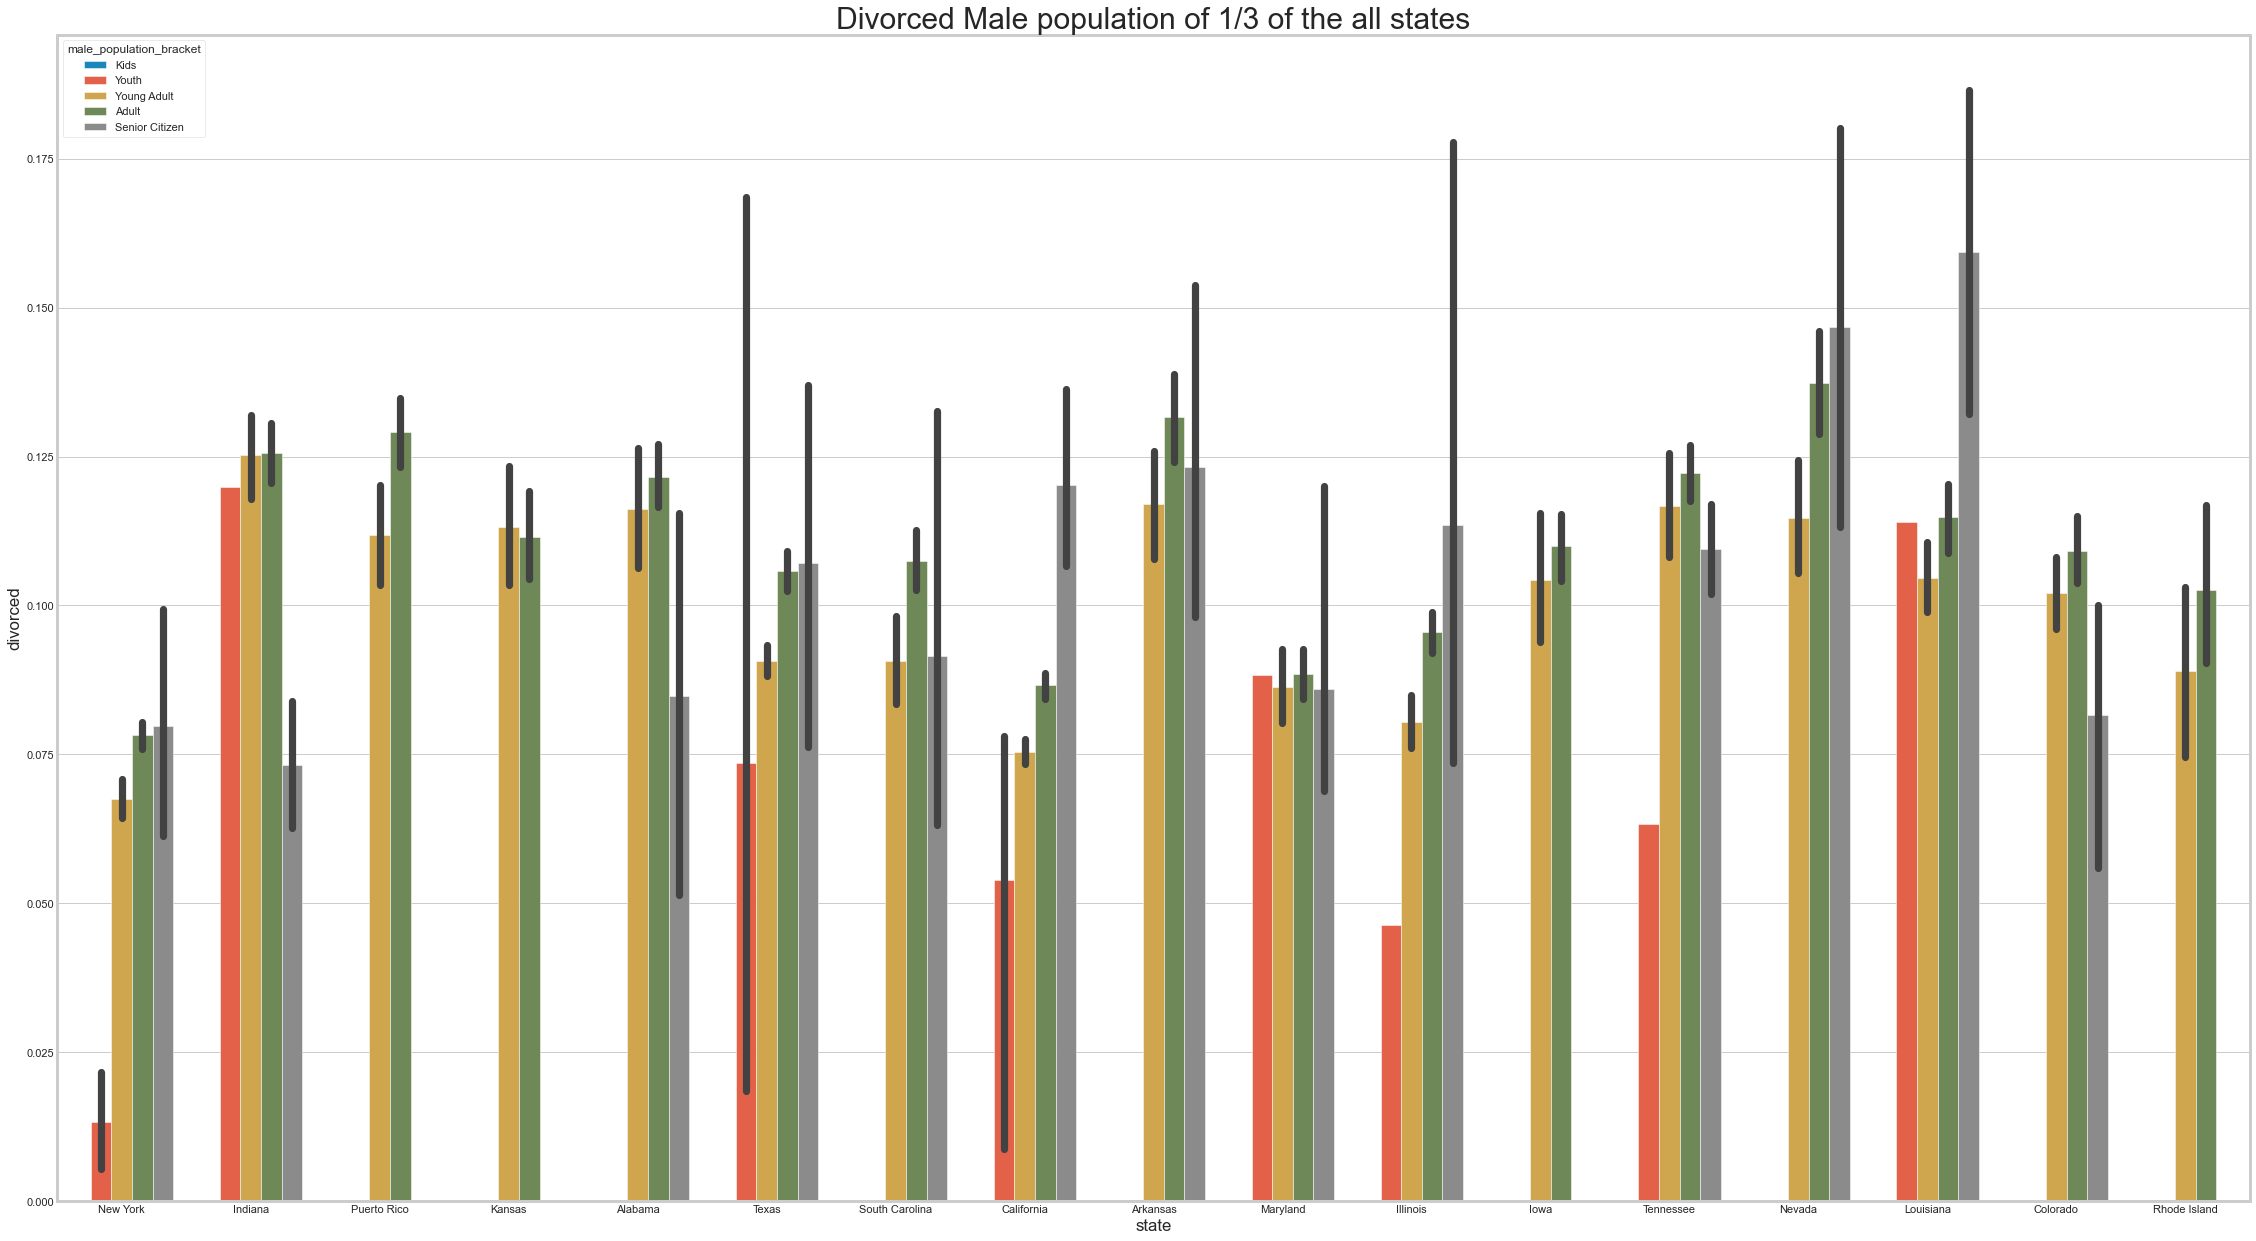

In [411]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'divorced', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas', 'South Carolina', 'California', 
                    'Arkansas', 'Maryland', 'Illinois', 'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado', 
                    'Rhode Island']).set_title('Divorced Male population of 1/3 of the all states', fontsize = 30)

plt.show()

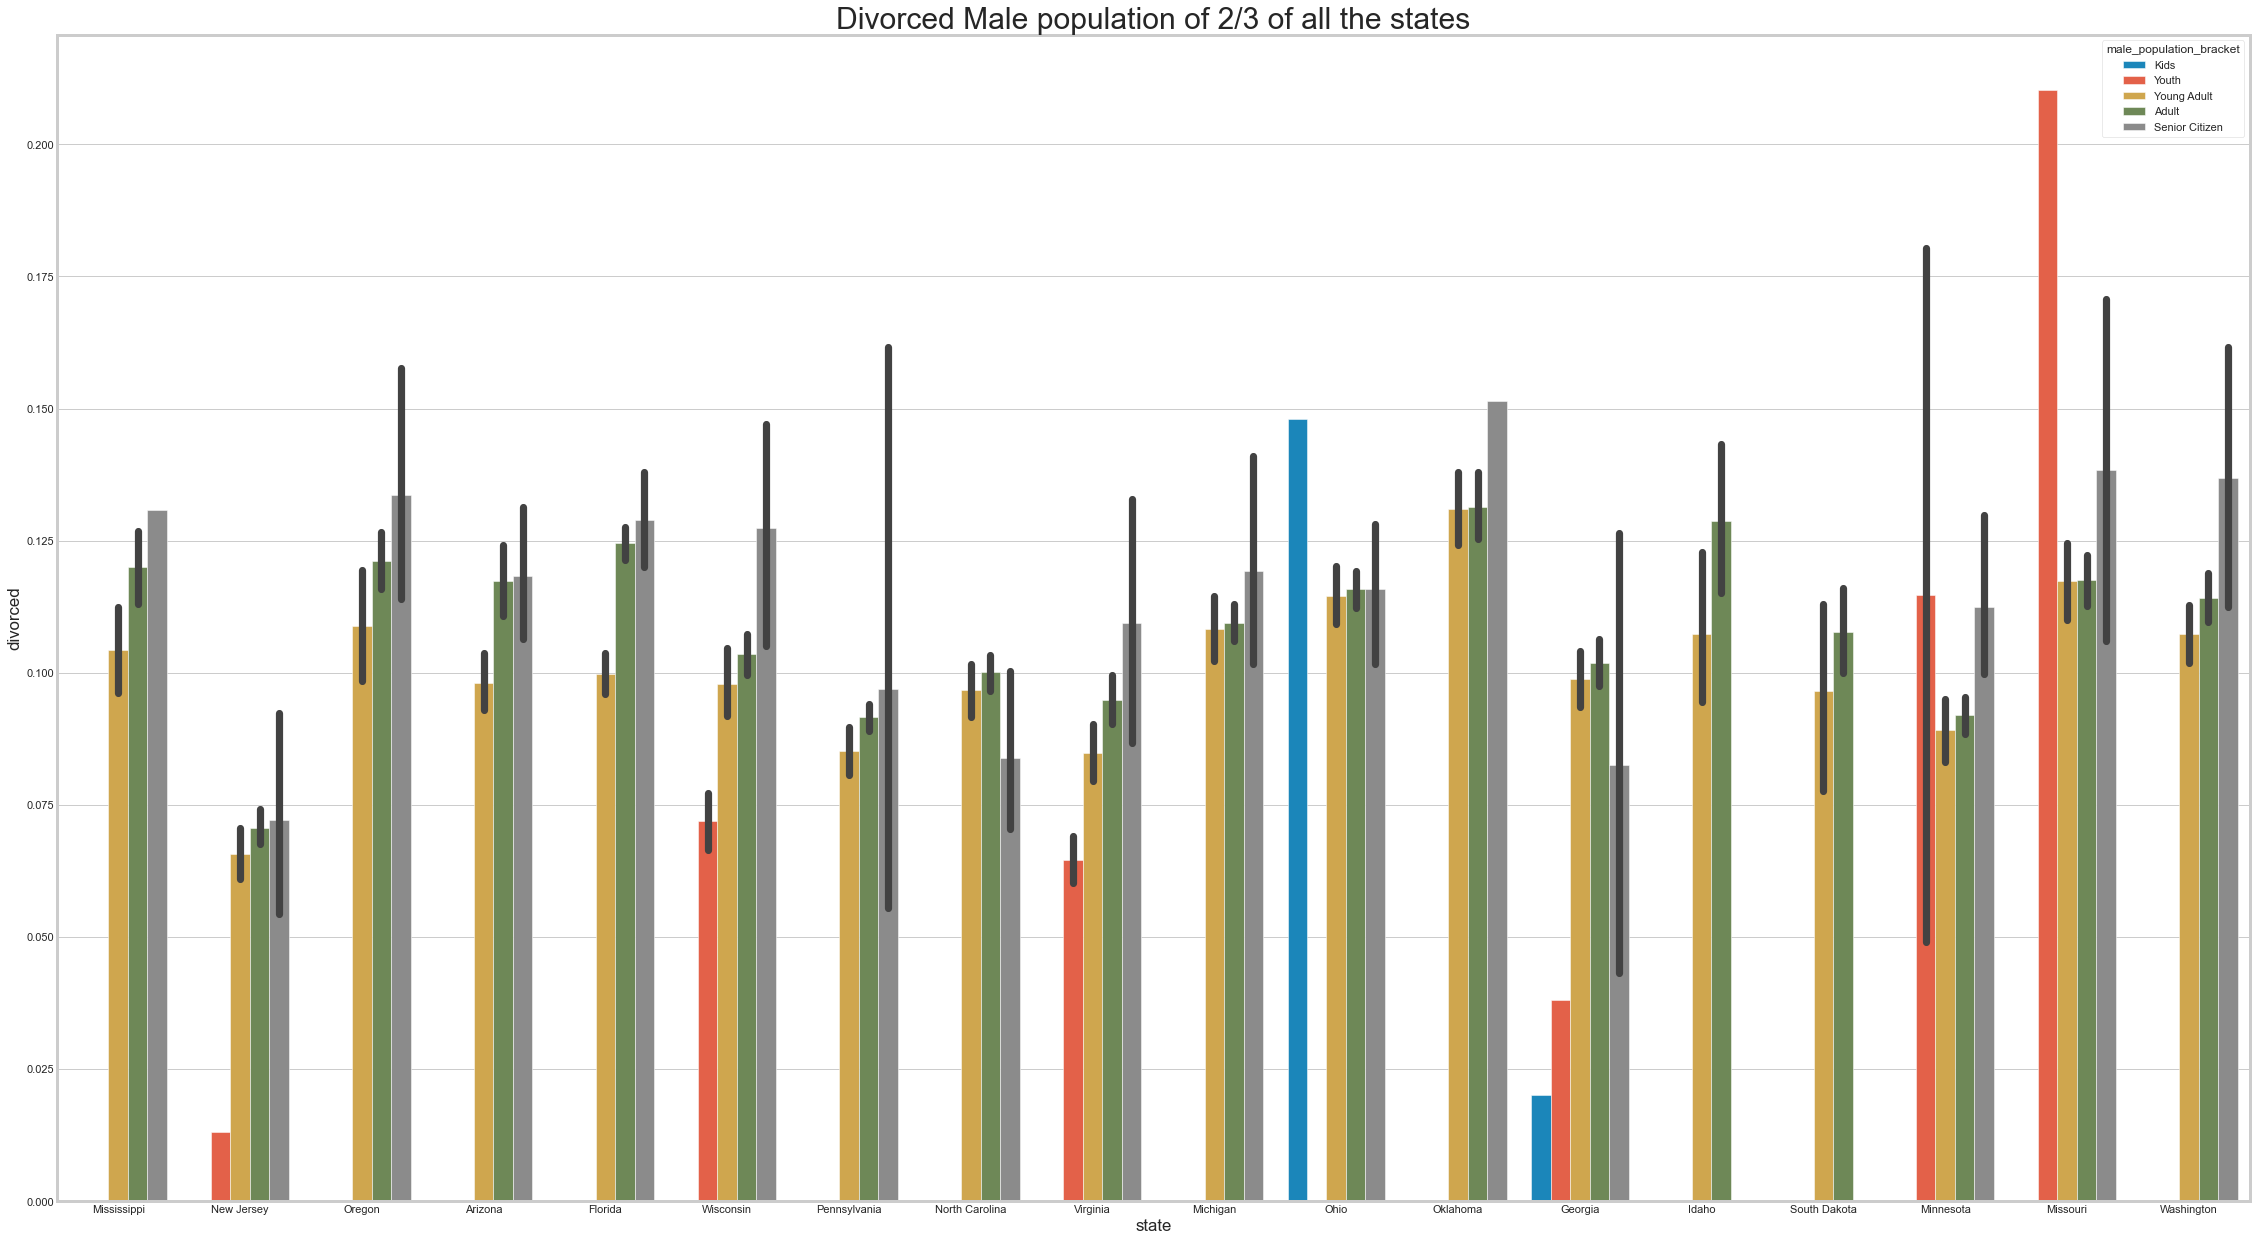

In [412]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'divorced', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Mississippi', 'New Jersey', 'Oregon', 'Arizona', 'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina', 
                    'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota', 'Missouri', 
                    'Washington']).set_title('Divorced Male population of 2/3 of all the states', fontsize = 30)

plt.show()

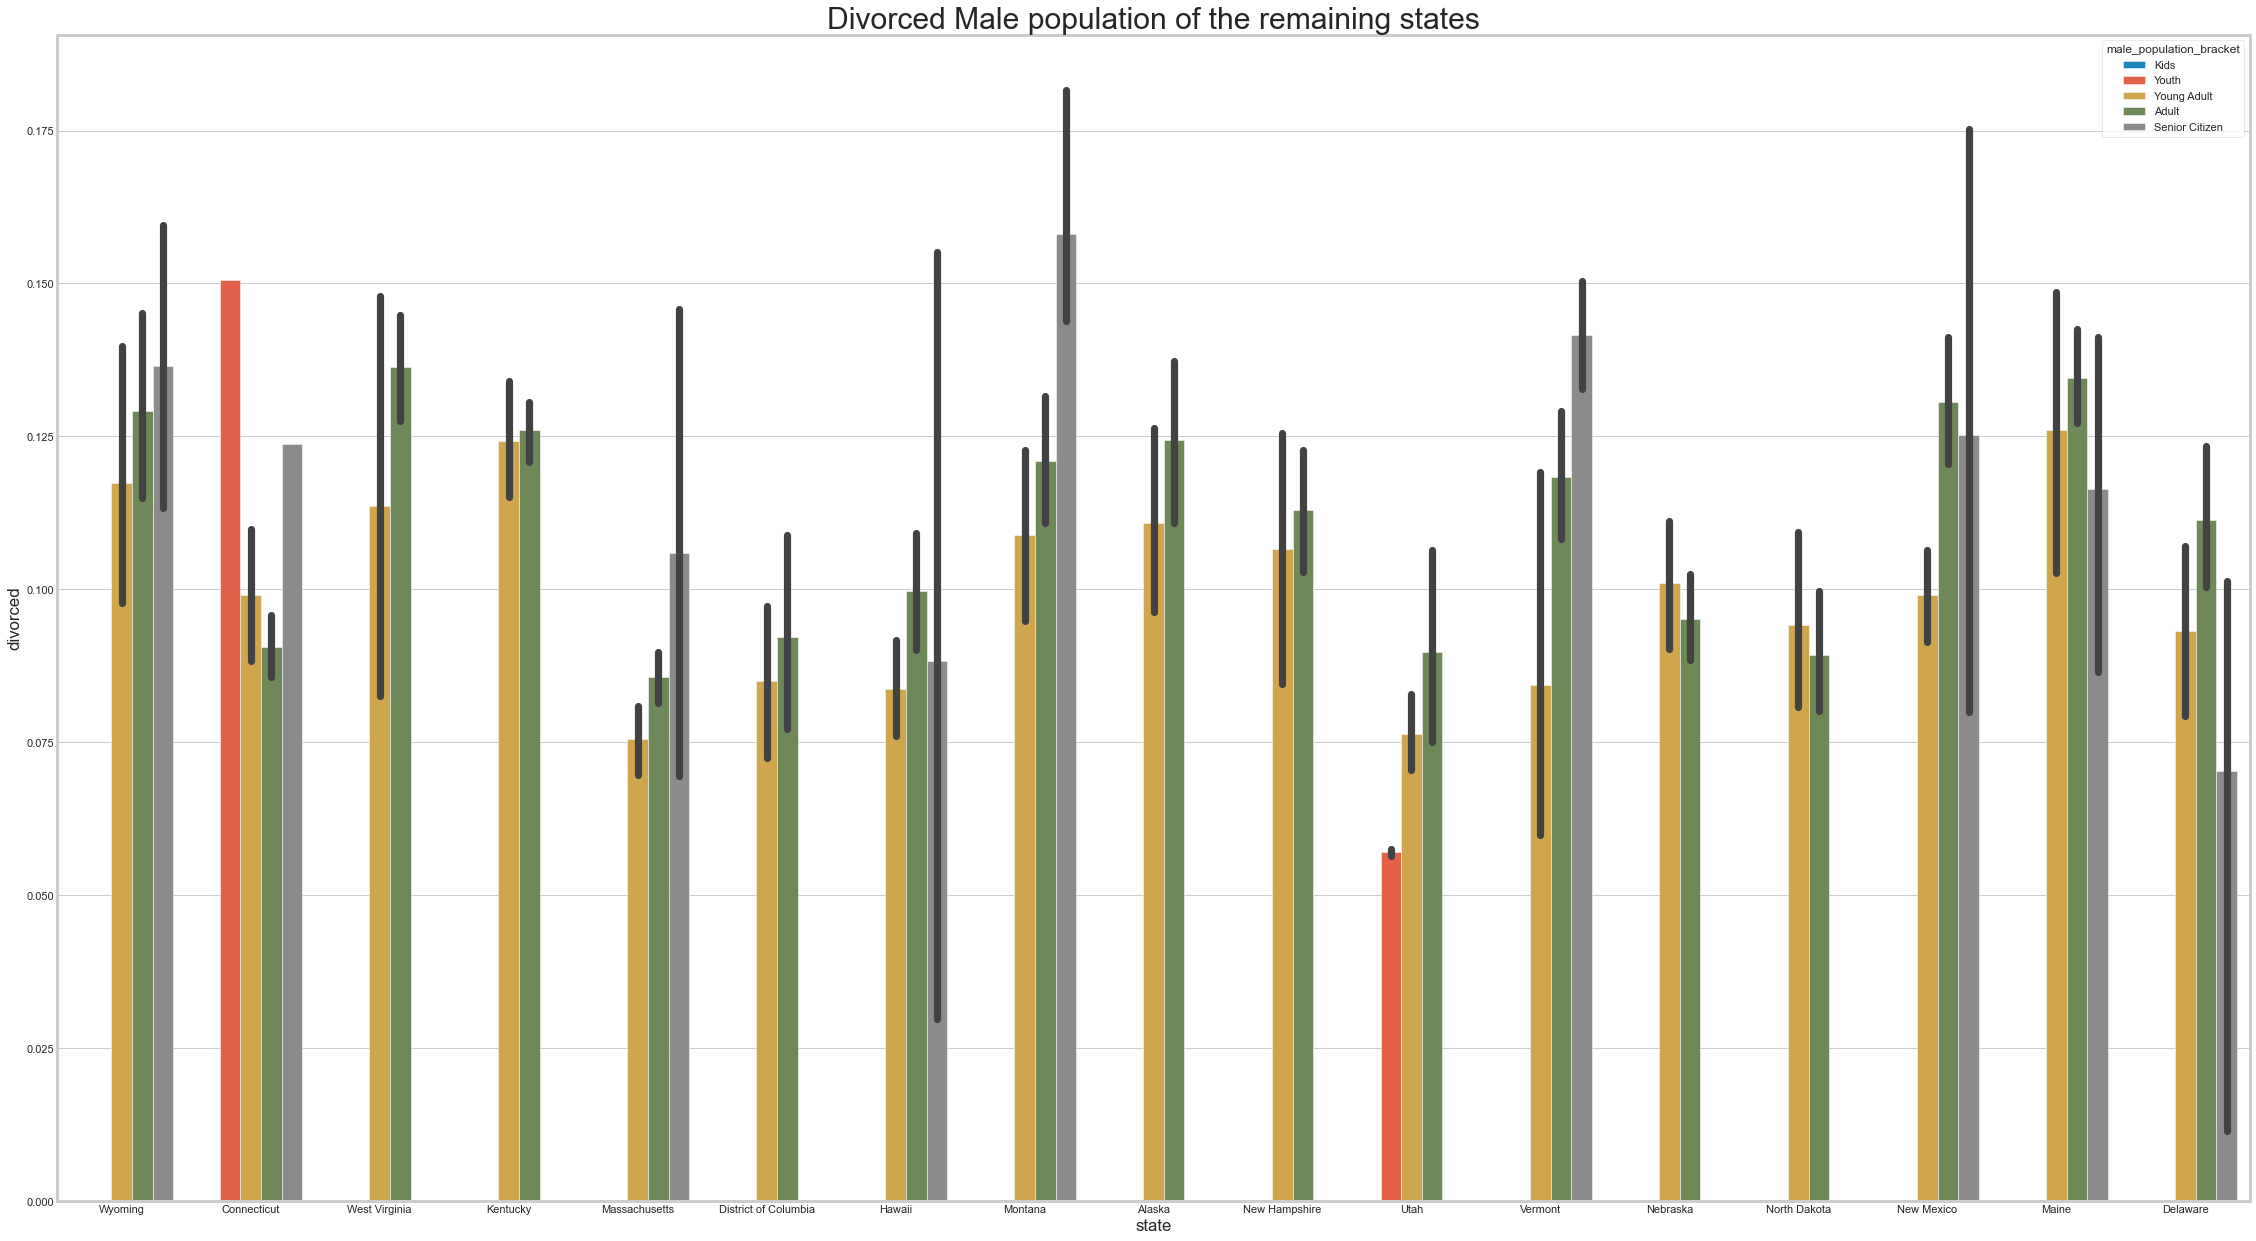

In [413]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'divorced', hue = 'male_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Wyoming', 'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts', 'District of Columbia', 
                    'Hawaii', 'Montana', 'Alaska', 'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 
                    'New Mexico', 'Maine', 'Delaware']).set_title('Divorced Male population of the remaining states', fontsize = 30)

plt.show()

- Ohio, Georgia states are having divorced male kids population!!
- Connecticut has highest number of Divorced male youth.

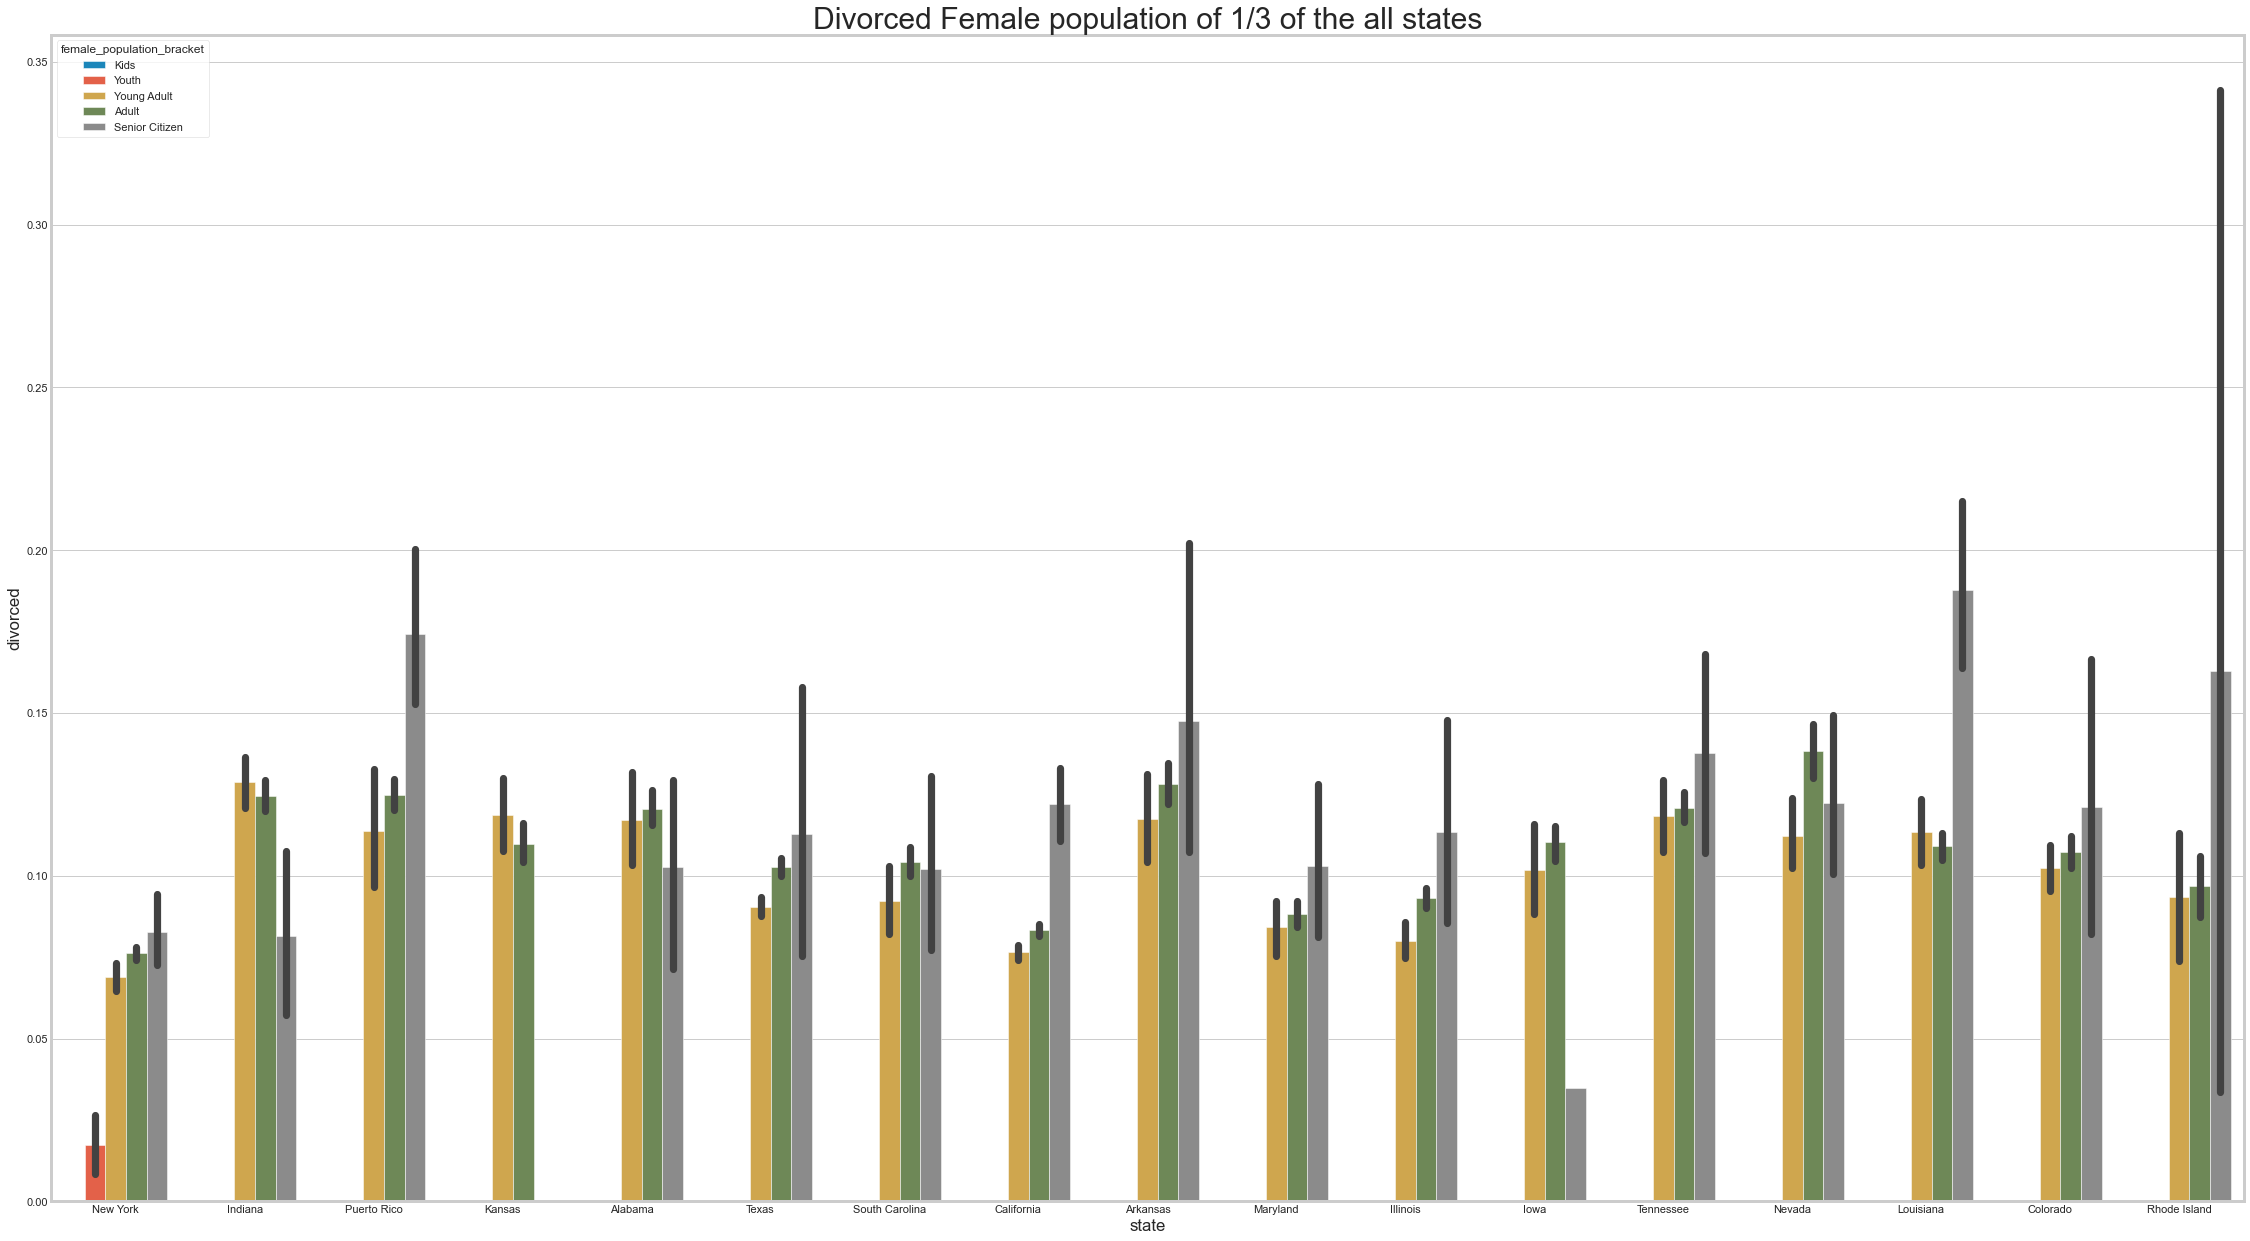

In [414]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'divorced', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['New York', 'Indiana', 'Puerto Rico', 'Kansas', 'Alabama', 'Texas', 'South Carolina', 'California', 
                    'Arkansas', 'Maryland', 'Illinois', 'Iowa', 'Tennessee', 'Nevada', 'Louisiana', 'Colorado', 
                    'Rhode Island']).set_title('Divorced Female population of 1/3 of the all states', fontsize = 30)

plt.show()

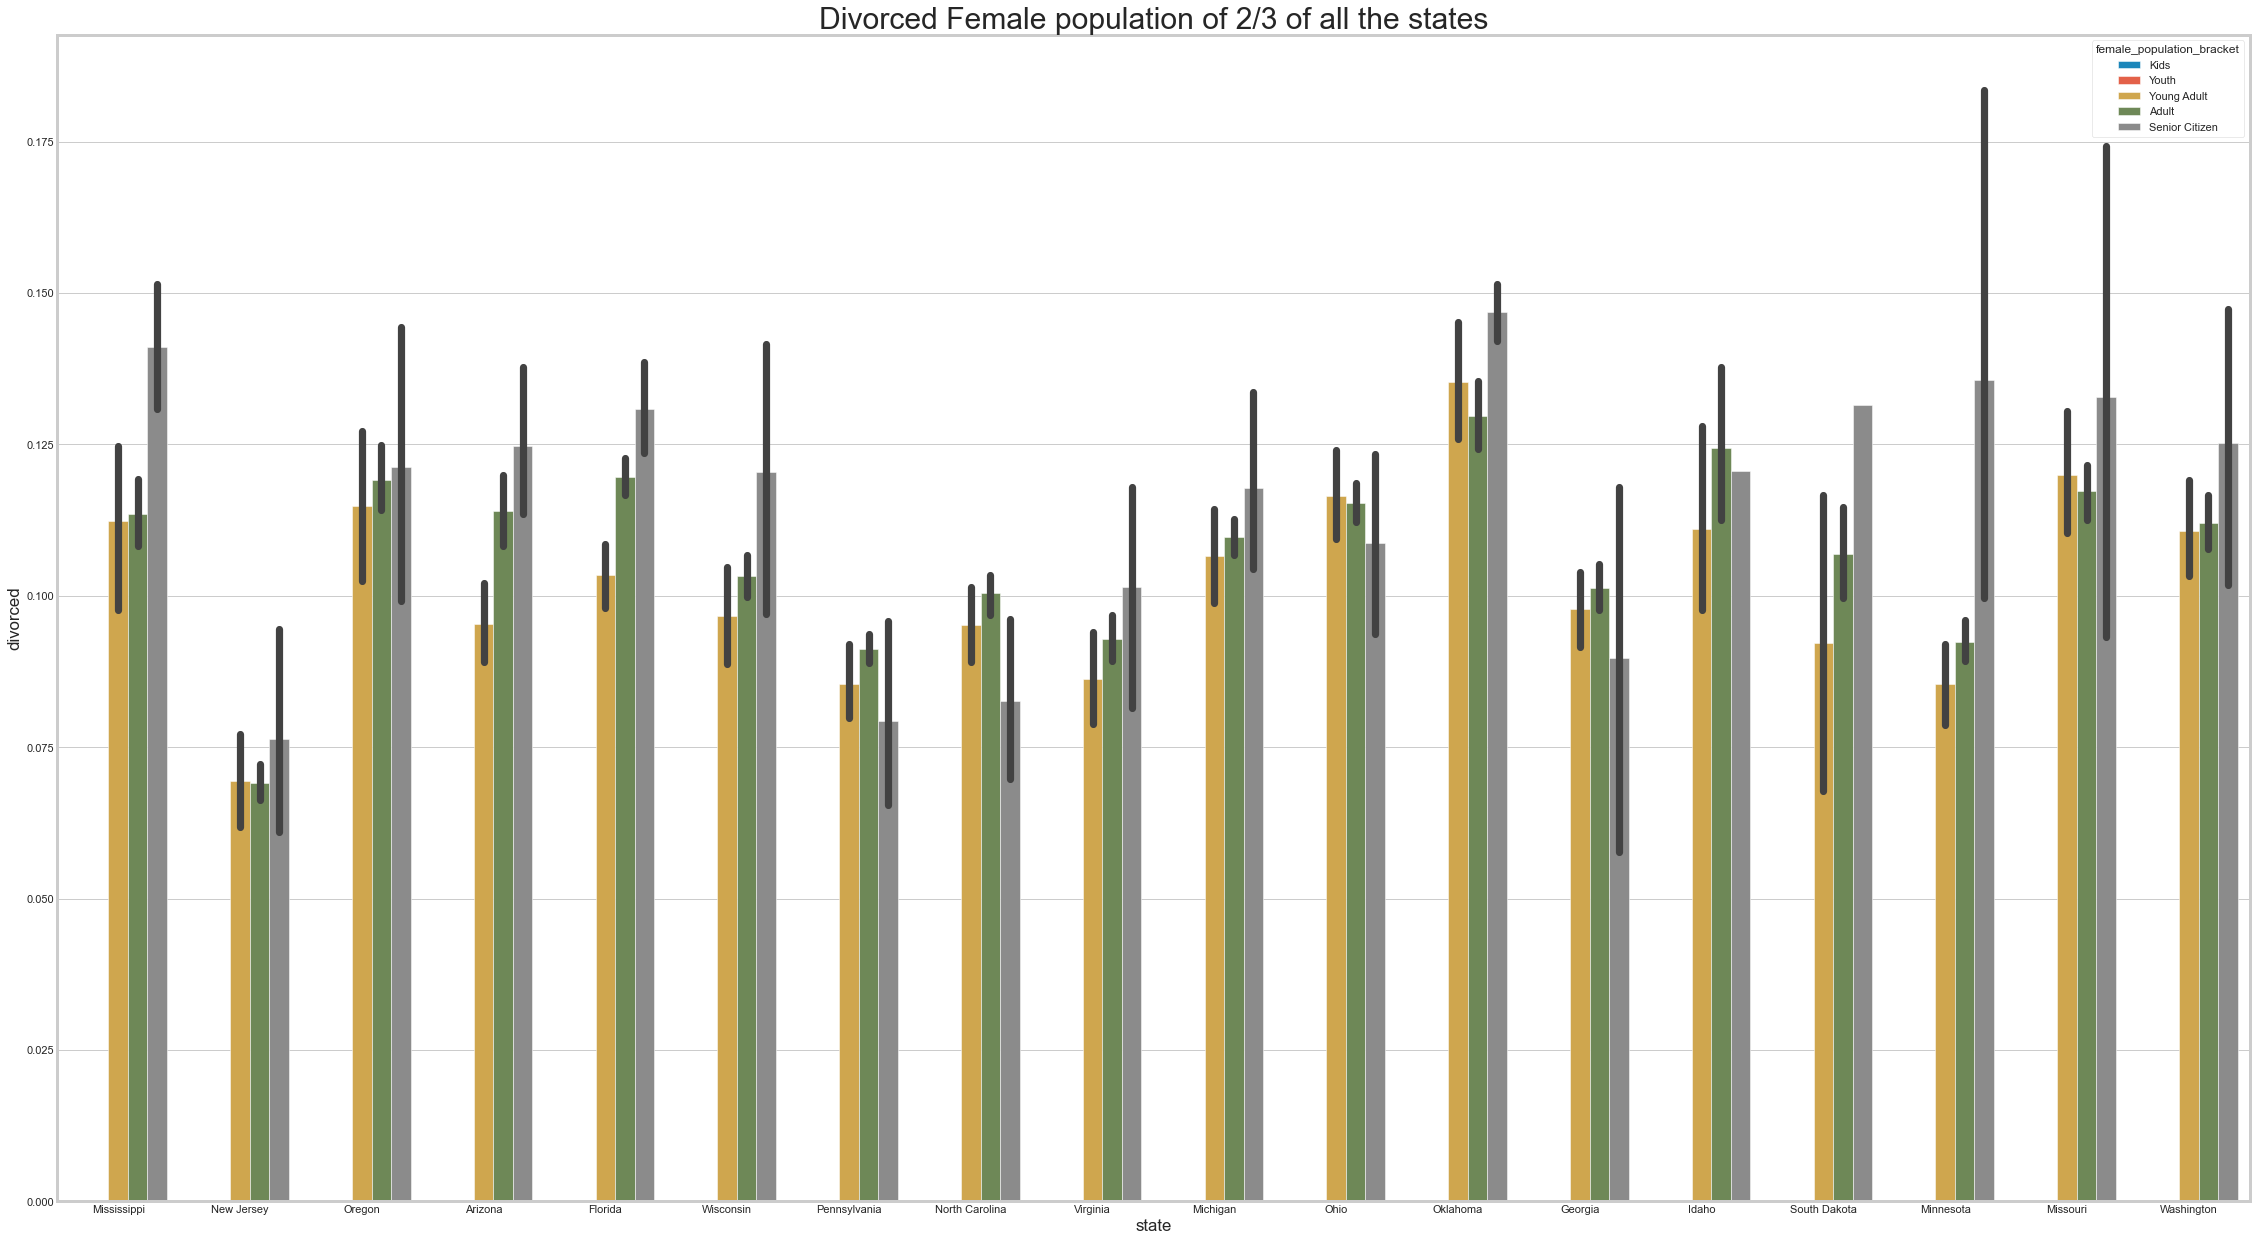

In [415]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'divorced', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Mississippi', 'New Jersey', 'Oregon', 'Arizona', 'Florida', 'Wisconsin', 'Pennsylvania', 'North Carolina', 
                    'Virginia', 'Michigan', 'Ohio', 'Oklahoma', 'Georgia', 'Idaho', 'South Dakota', 'Minnesota', 'Missouri', 
                    'Washington']).set_title('Divorced Female population of 2/3 of all the states', fontsize = 30)

plt.show()

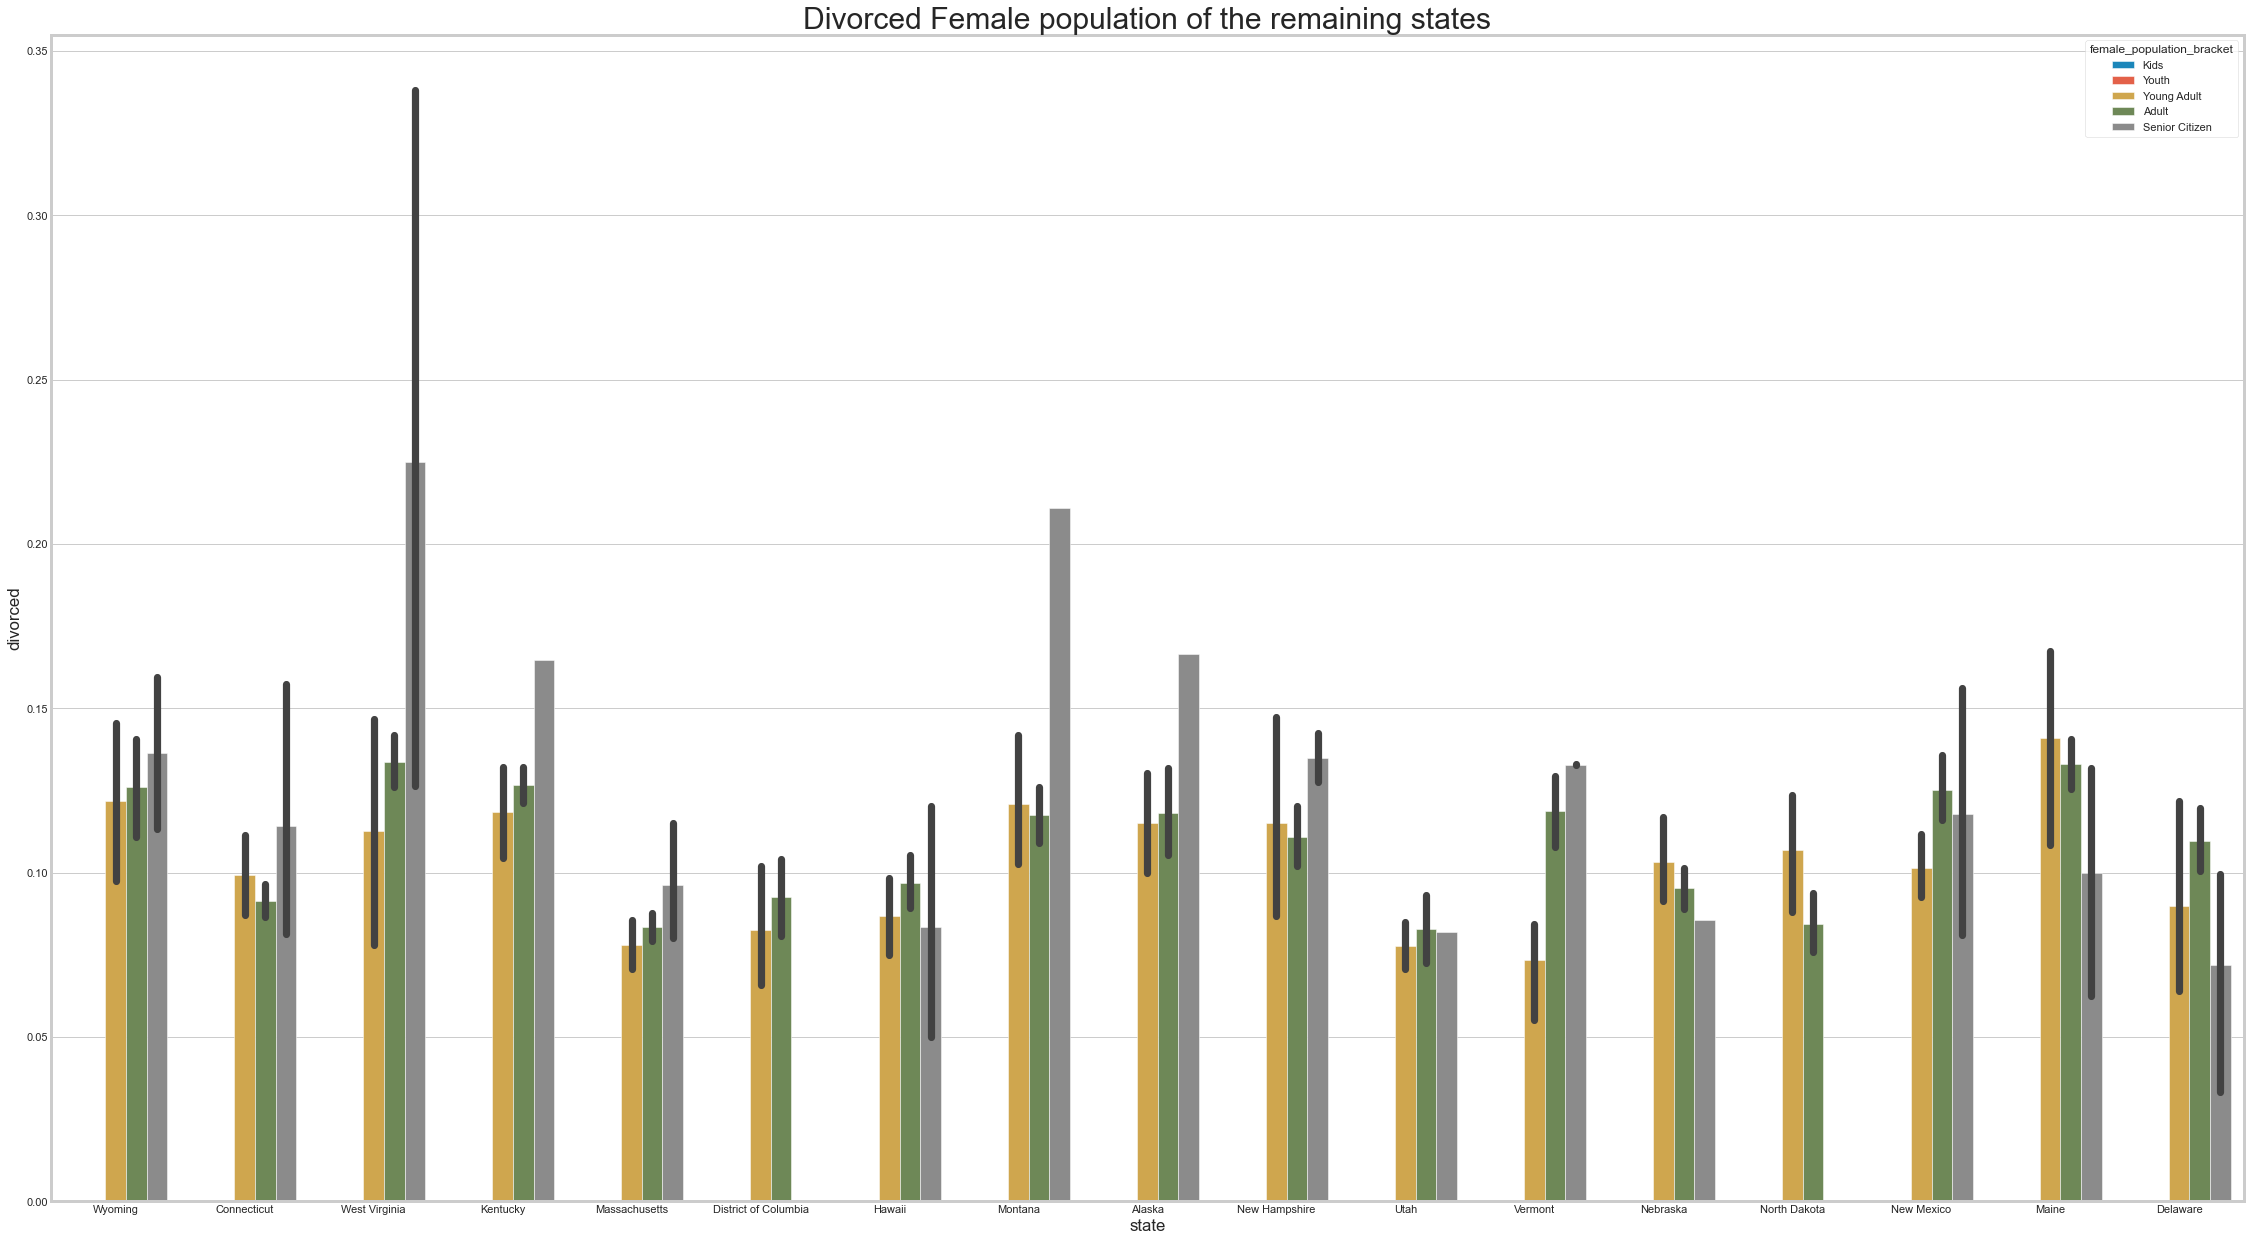

In [416]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 20))

sns.barplot(x = 'state', y = 'divorced', hue = 'female_population_bracket', data = married_stat_df, palette=color_pal, 
           order = ['Wyoming', 'Connecticut', 'West Virginia', 'Kentucky', 'Massachusetts', 'District of Columbia', 
                    'Hawaii', 'Montana', 'Alaska', 'New Hampshire', 'Utah', 'Vermont', 'Nebraska', 'North Dakota', 
                    'New Mexico', 'Maine', 'Delaware']).set_title('Divorced Female population of the remaining states', fontsize = 30)

plt.show()

- New York is the only state having Divorced female Youth.
- Maine state has the highest number of Divorced female young adults.

## Rent as a percentage of income at an overall level and for different states

In [417]:
rent = train_data[['state', 'city', 'rent_median', 'hi_median', 'family_median']]
rent.head()

state        city  rent_median  hi_median  family_median
0     New York    Hamilton        784.0    48120.0        53245.0
1      Indiana  South Bend        848.0    35186.0        43023.0
2      Indiana    Danville        703.0    74964.0        85395.0
3  Puerto Rico    San Juan        782.0    37845.0        44399.0
4       Kansas   Manhattan        881.0    22497.0        50272.0

In [418]:
#overall rent as a percentage of overall household income
Overall_rent_percentage = (rent['rent_median'].sum() / rent['hi_median'].sum()) * 100
round(Overall_rent_percentage, 2)

1.74

- Overall rent as a percentage of overall household income is around 1.74%.

In [419]:
rent["overall_rent_percentage"] = round((rent['rent_median']/rent['hi_median'])*100, 2)
rent.head()

state        city  rent_median  hi_median  family_median  \
0     New York    Hamilton        784.0    48120.0        53245.0   
1      Indiana  South Bend        848.0    35186.0        43023.0   
2      Indiana    Danville        703.0    74964.0        85395.0   
3  Puerto Rico    San Juan        782.0    37845.0        44399.0   
4       Kansas   Manhattan        881.0    22497.0        50272.0   

   overall_rent_percentage  
0                     1.63  
1                     2.41  
2                     0.94  
3                     2.07  
4                     3.92

In [420]:
print(list(rent.nlargest(500, 'overall_rent_percentage').state.unique()))
print(len(list(rent.nlargest(500, 'overall_rent_percentage').state.unique())))

['Georgia', 'Texas', 'California', 'New York', 'Florida', 'Washington', 'Oregon', 'Pennsylvania', 'Maryland', 'Virginia', 'Mississippi', 'Alabama', 'Michigan', 'Louisiana', 'Iowa', 'Puerto Rico', 'New Jersey', 'Illinois', 'Arizona', 'North Carolina', 'South Carolina', 'Tennessee', 'Ohio', 'Wisconsin', 'Missouri', 'Connecticut', 'Minnesota', 'Massachusetts', 'Indiana', 'Colorado', 'Kansas', 'Oklahoma', 'District of Columbia', 'New Mexico', 'Hawaii', 'Maine', 'Arkansas', 'Vermont', 'Rhode Island', 'Kentucky']
40


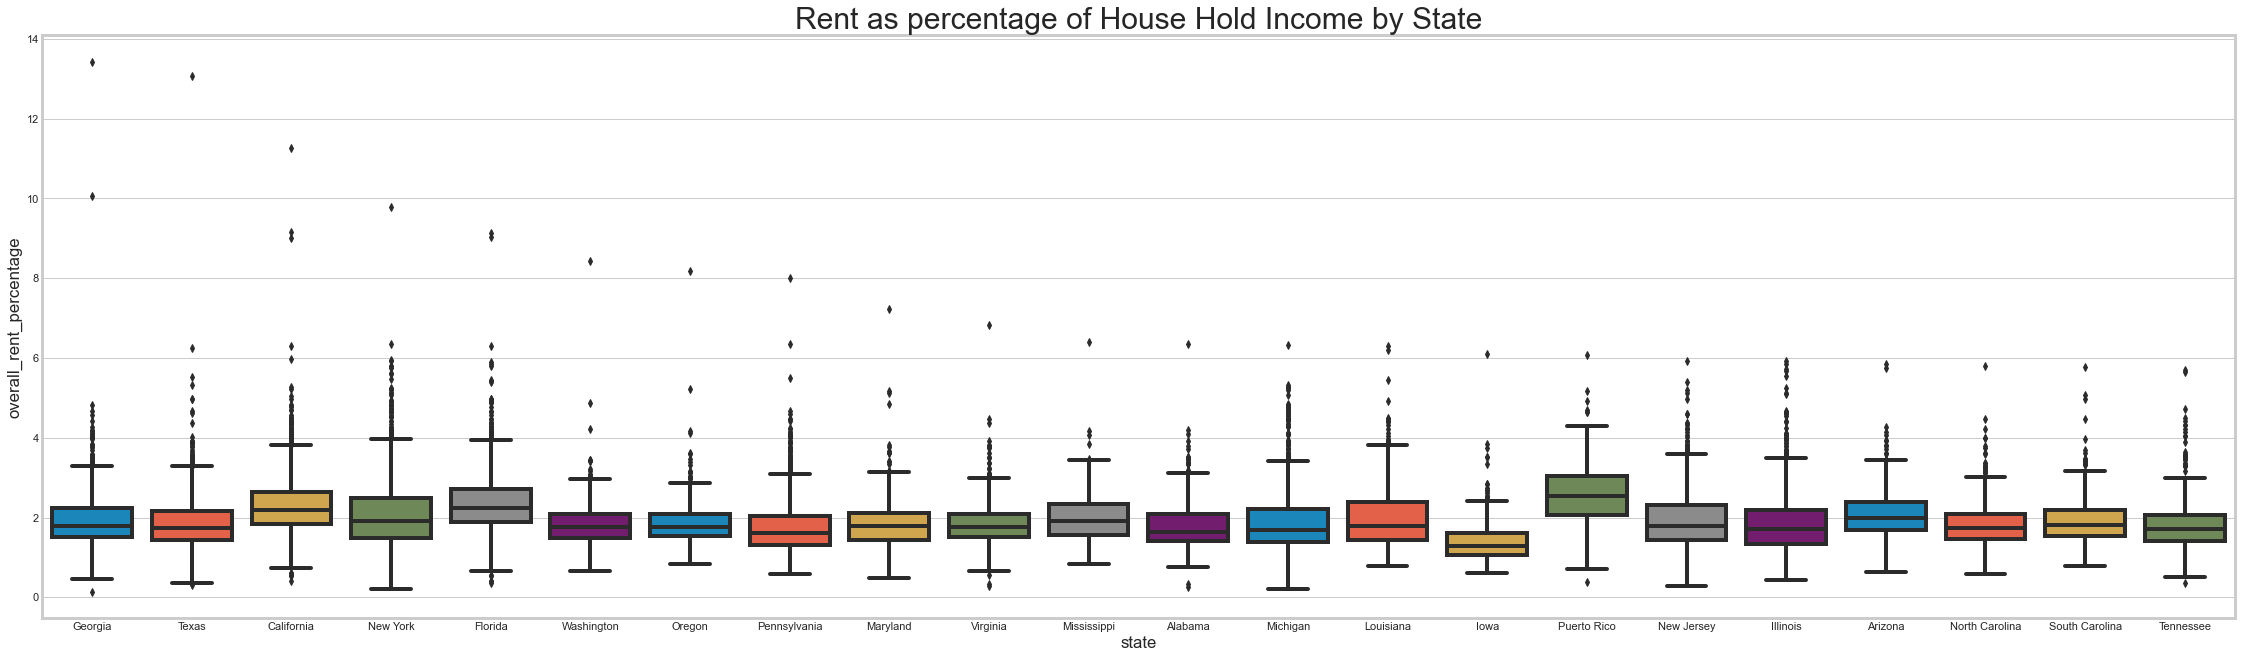

In [421]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'state', y = 'overall_rent_percentage', data=rent.nlargest(26719, 'overall_rent_percentage'), palette=color_pal, 
            order = ['Georgia', 'Texas', 'California', 'New York', 'Florida', 'Washington', 'Oregon', 'Pennsylvania', 
                     'Maryland', 'Virginia', 'Mississippi', 'Alabama', 'Michigan', 'Louisiana', 'Iowa', 'Puerto Rico', 
                     'New Jersey', 'Illinois', 'Arizona', 'North Carolina', 'South Carolina', 'Tennessee']).set_title('Rent as percentage of House Hold Income by State', fontsize = 30)

plt.show()

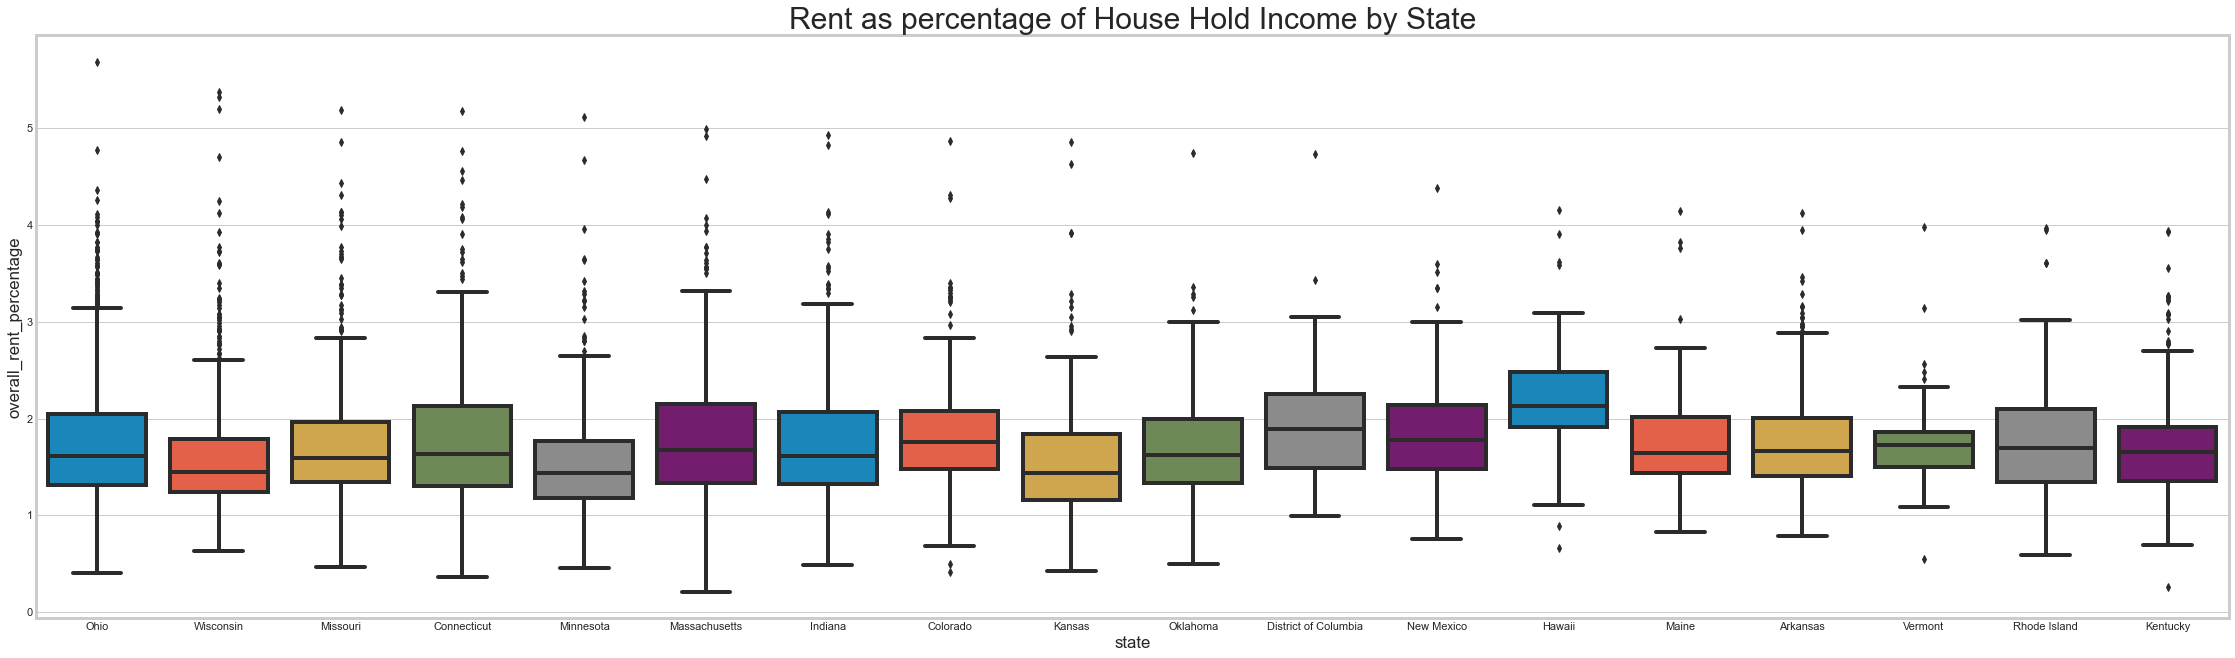

In [422]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
sns.boxplot(x = 'state', y = 'overall_rent_percentage', data=rent.nlargest(26719, 'overall_rent_percentage'), palette=color_pal, 
            order = ['Ohio', 'Wisconsin', 'Missouri', 'Connecticut', 'Minnesota', 'Massachusetts', 'Indiana', 
                     'Colorado', 'Kansas', 'Oklahoma', 'District of Columbia', 'New Mexico', 'Hawaii', 'Maine', 
                     'Arkansas', 'Vermont', 'Rhode Island', 'Kentucky']).set_title('Rent as percentage of House Hold Income by State', fontsize = 30)

plt.show()

## Correlation analysis for all the relevant variables by creating heatmap

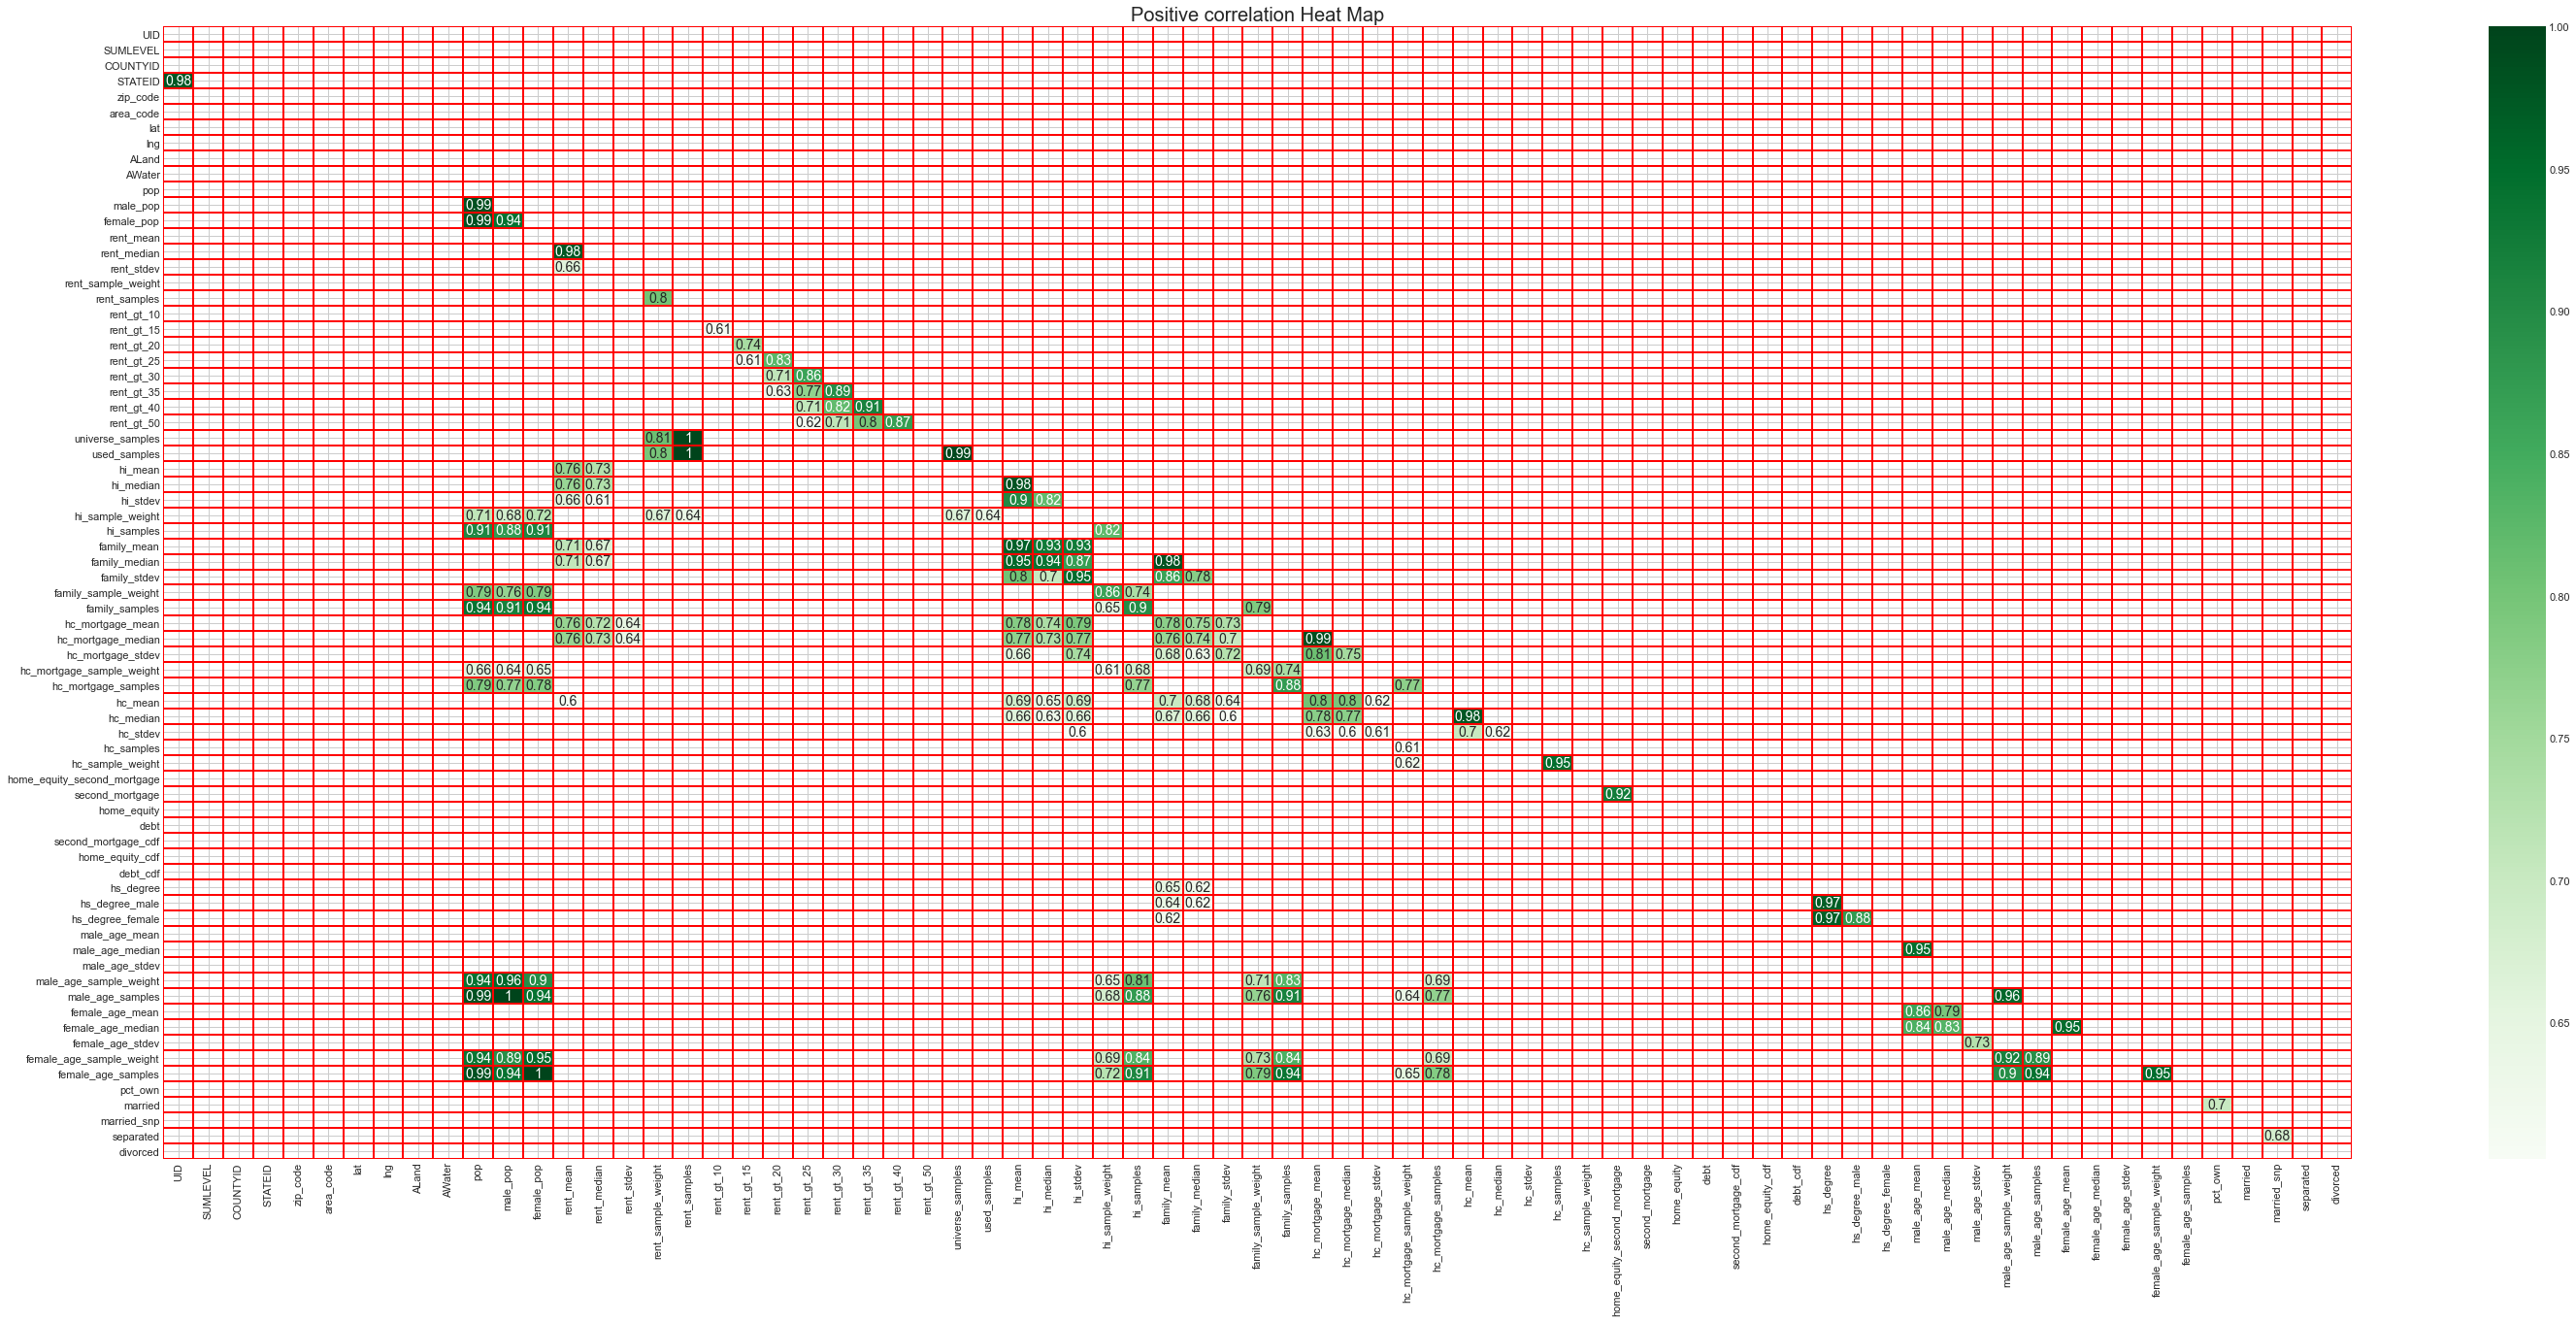

In [423]:
sns.set_style("whitegrid")

corr = train_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

kot = corr[corr>=.6]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Greens", annot = True, mask = mask, linewidths=1, linecolor='red').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

- "Population parameters" have strong positive correlation with "Sample Parameters".
- "male_pop" is highly correlated with "female_pop".
- "rent_mean", "rent_median" has high positive corelation with "hi_mean", "hi_median", "hi_stdev".
- "rent_stdev" has high positive corelation with "hc_mortgage_mean" & "hc_mortgage_median.
- "House hold income" and "Family income" are highly positively correlated.
- "Family Income" and "hc_mortgage" are positively correlated.
- "pct_own" is positively correlated with "Married" marital status. 

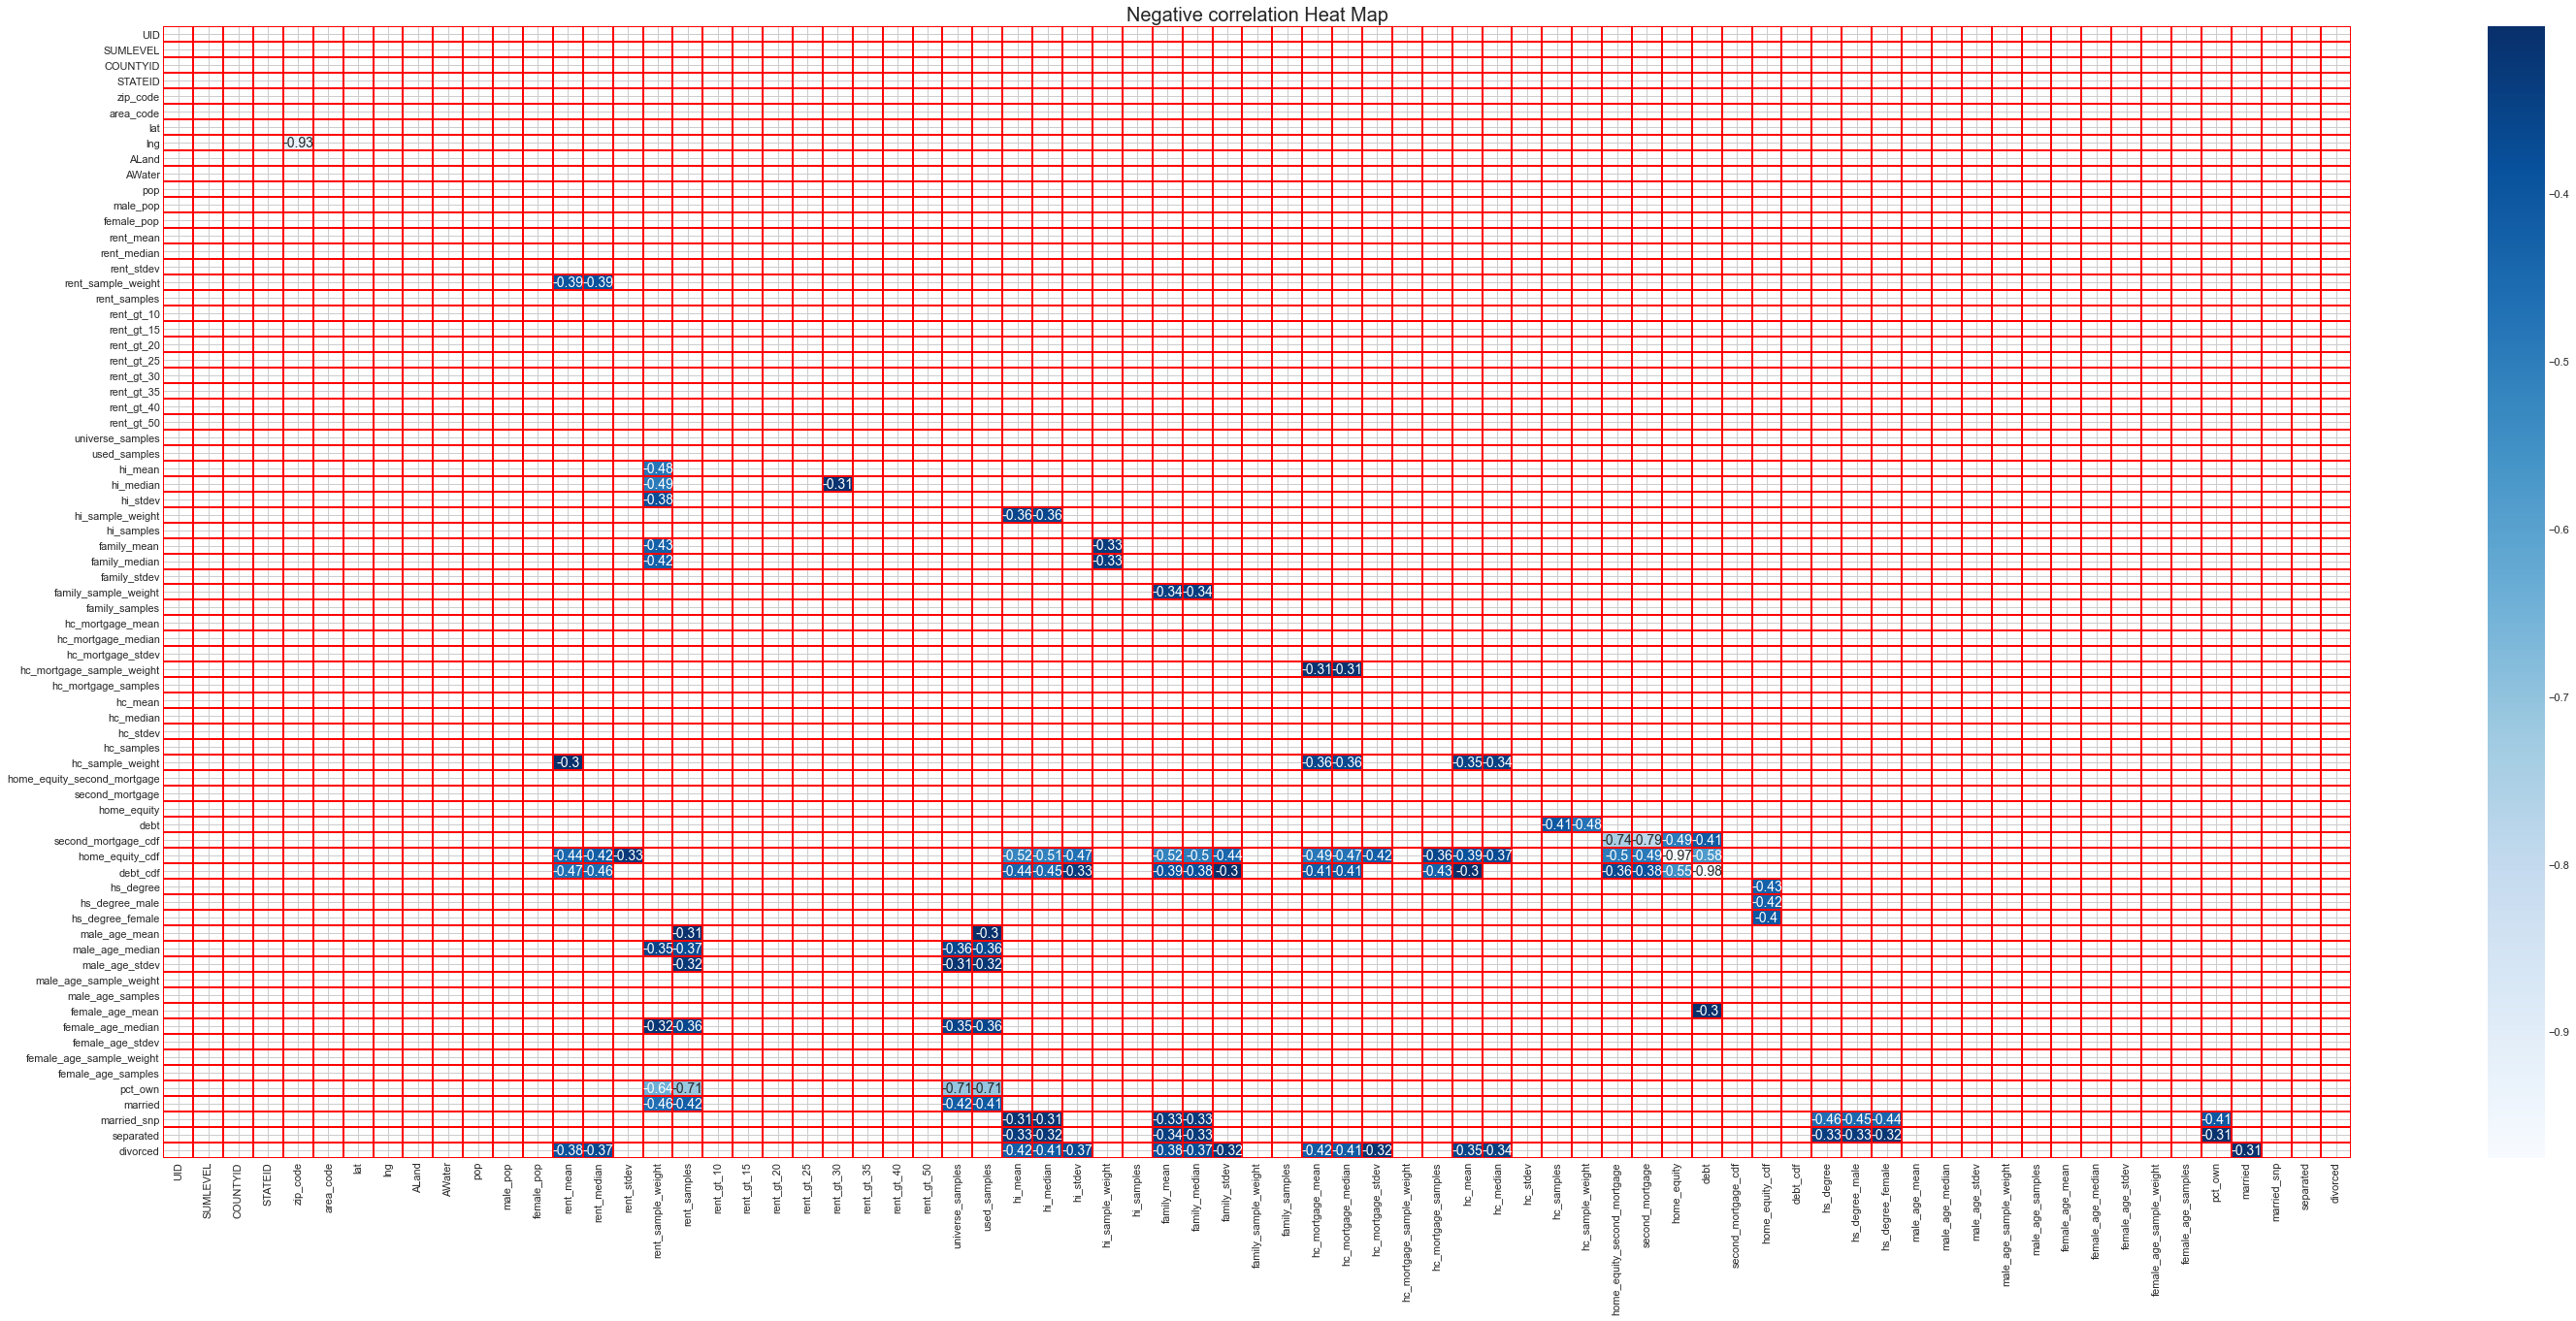

In [424]:
sns.set_style("whitegrid")

kot = corr[corr <=-.3]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Blues", annot = True, mask = mask, linewidths=1, linecolor='red').set_title('Negative correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

- "House hold income and Family Income" has Strong negative correlation with ["married_snp", "separated", "divorced"].
- "High School Degree in both "Males and Females" have Strong negative correlation with ["married_snp", "separated"].
- "pct_own" has Strong negative correlation with  ["married_snp", "separated"].
- "hi_median" has Strong negative correlation with "rent_gt_30", indicating that most households look for properties with rent less than 30% of their house hold income.

# 5. Data Pre-processing
1. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 
2. Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent      random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain          insight into the linear relationships in the data. Following are the list of latent variables:
- Highschool graduation rates

- Median population age

- Second mortgage statistics

- Percent own

- Bad debt expense

In [425]:
train_data['Bad_Debt'] = train_data['second_mortgage'] + train_data['home_equity'] - train_data['home_equity_second_mortgage']

In [426]:
for col in train_data.columns:
    print(col,' = ' ,train_data[col].dtype)

UID  =  int64
SUMLEVEL  =  int64
COUNTYID  =  int64
STATEID  =  int64
state  =  object
state_ab  =  object
city  =  object
place  =  object
type  =  object
primary  =  object
zip_code  =  int64
area_code  =  int64
lat  =  float64
lng  =  float64
ALand  =  float64
AWater  =  int64
pop  =  int64
male_pop  =  int64
female_pop  =  int64
rent_mean  =  float64
rent_median  =  float64
rent_stdev  =  float64
rent_sample_weight  =  float64
rent_samples  =  float64
rent_gt_10  =  float64
rent_gt_15  =  float64
rent_gt_20  =  float64
rent_gt_25  =  float64
rent_gt_30  =  float64
rent_gt_35  =  float64
rent_gt_40  =  float64
rent_gt_50  =  float64
universe_samples  =  int64
used_samples  =  int64
hi_mean  =  float64
hi_median  =  float64
hi_stdev  =  float64
hi_sample_weight  =  float64
hi_samples  =  float64
family_mean  =  float64
family_median  =  float64
family_stdev  =  float64
family_sample_weight  =  float64
family_samples  =  float64
hc_mortgage_mean  =  float64
hc_mortgage_median  =  floa

In [427]:
#function to get categorical variables
def cat_variables(df):
    cat_variables = list(df.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [428]:
#function to get numerical variables
def num_variables(df):
    num_variables = list(df.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [429]:
cat_variables(train_data)

['UID',
 'SUMLEVEL',
 'COUNTYID',
 'STATEID',
 'state',
 'state_ab',
 'city',
 'place',
 'type',
 'primary',
 'zip_code',
 'area_code',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'universe_samples',
 'used_samples']

In [430]:
num_variables(train_data)

['lat',
 'lng',
 'ALand',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_sample

In [431]:
#dataframe with numerical variables only
num_train_df = train_data[num_variables(train_data)]
num_train_df.head()

lat        lng        ALand  rent_mean  rent_median  rent_stdev  \
0  42.840812 -75.501524  202183361.0  769.38638        784.0   232.63967   
1  41.701441 -86.266614    1560828.0  804.87924        848.0   253.46747   
2  39.792202 -86.515246   69561595.0  742.77365        703.0   323.39011   
3  18.396103 -66.104169    1105793.0  803.42018        782.0   297.39258   
4  39.195573 -96.569366    2554403.0  938.56493        881.0   392.44096   

   rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0           272.34441         362.0     0.86761     0.79155     0.59155   
1           312.58622         513.0     0.97410     0.93227     0.69920   
2           291.85520         378.0     0.95238     0.88624     0.79630   
3           259.30316         368.0     0.94693     0.87151     0.69832   
4          1005.42886        1704.0     0.99286     0.98247     0.91688   

   rent_gt_25  rent_gt_30  rent_gt_35  rent_gt_40  rent_gt_50      hi_mean  \
0     0.45634     0.42817     0.18592     0.15493     0.12958  63125.28406   
1     0.69920     0.55179     0.41235     0.39044     0.27888  41931.92593   
2     0.66667     0.39153     0.39153     0.28307     0.15873  84942.68317   
3     0.61732     0.51397     0.46927     0.35754     0.32961  48733.67116   
4     0.84740     0.78247     0.60974     0.55455     0.44416  31834.15466   

   hi_median     hi_stdev  hi_sample_weight  hi_samples  family_mean  \
0    48120.0  49042.01206        1290.96240      2024.0  67994.14790   
1    35186.0  31639.50203         838.74664      1127.0  50670.10337   
2    74964.0  56811.62186        1155.20980      2488.0  95262.51431   
3    37845.0  45100.54010         928.32193      1267.0  56401.68133   
4    22497.0  34046.50907        1548.67477      1983.0  54053.42396   

   family_median  family_stdev  family_sample_weight  family_samples  \
0        53245.0   47667.30119             884.33516          1491.0   
1        43023.0   34715.57548             375.28798           554.0   
2        85395.0   49292.67664             709.74925          1889.0   
3        44399.0   41082.90515             490.18479           729.0   
4        50272.0   39609.12605             244.08903           395.0   

   hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0        1414.80295              1223.0          641.22898   
1         864.41390               784.0          482.27020   
2        1506.06758              1361.0          731.89394   
3        1175.28642              1101.0          428.98751   
4        1192.58759              1125.0          327.49674   

   hc_mortgage_sample_weight  hc_mortgage_samples    hc_mean  hc_median  \
0                  377.83135                867.0  570.01530      558.0   
1                  316.88320                356.0  351.98293      336.0   
2                  699.41354               1491.0  556.45986      532.0   
3                  261.28471                437.0  288.04047      247.0   
4                   76.61052                134.0  443.68855      444.0   

    hc_stdev  hc_samples  hc_sample_weight  home_equity_second_mortgage  \
0  270.11299       770.0         499.29293                      0.01588   
1  125.40457       229.0         189.60606                      0.02222   
2  184.42175       538.0         323.35354                      0.00000   
3  185.55887       392.0         314.90566                      0.01086   
4   76.12674       124.0          79.55556                      0.05426   

   second_mortgage  home_equity     debt  second_mortgage_cdf  \
0          0.02077      0.08919  0.52963              0.43658   
1          0.02222      0.04274  0.60855              0.42174   
2          0.00000      0.09512  0.73484              1.00000   
3          0.01086      0.01086  0.52714              0.53057   
4          0.05426      0.05426  0.51938              0.18332   

   home_equity_cdf  debt_cdf  hs_degree  hs_degree_male  hs_degree_female  \
0          0.49087   0.

In [432]:
# exclude columns you don't want
num_train_df = num_train_df[num_train_df.columns[~num_train_df.columns.isin(['SUMLEVEL', 'lat', 'lng', 'ALand'])]]

In [433]:
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( rotation=None, n_factors = 25)
fa.fit(num_train_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.55329901e+01, 9.03576244e+00, 7.86051899e+00, 4.53795677e+00,
       3.69180130e+00, 2.40808907e+00, 2.03947300e+00, 1.39337603e+00,
       1.25745489e+00, 1.12774306e+00, 9.63292652e-01, 9.04911514e-01,
       8.04226650e-01, 7.14077812e-01, 6.47959933e-01, 5.70217633e-01,
       5.01418519e-01, 4.58711541e-01, 3.96025793e-01, 3.75410399e-01,
       3.44496779e-01, 3.12997351e-01, 3.03211509e-01, 2.55376538e-01,
       2.39060996e-01, 2.36269154e-01, 2.05141645e-01, 1.98653046e-01,
       1.85841411e-01, 1.66327418e-01, 1.38553254e-01, 1.33794794e-01,
       1.25738288e-01, 1.06952390e-01, 9.84162717e-02, 9.43682387e-02,
       9.04514665e-02, 9.01820921e-02, 8.44651399e-02, 5.82787474e-02,
       4.95456915e-02, 3.94433134e-02, 3.36086780e-02, 2.72376548e-02,
       2.42653627e-02, 2.15220732e-02, 2.04733148e-02, 1.64264823e-02,
       1.59691767e-02, 1.52654487e-02, 1.41132773e-02, 8.33322350e-03,
       8.04333272e-03, 6.60440597e-03, 4.29961720e-03, 3.11840604e-03,
      

In [434]:
print(sorted(ev, reverse=True))

[15.532990144155251, 9.035762435984871, 7.860518985795121, 4.537956767800307, 3.691801300713611, 2.408089069974909, 2.0394730011699096, 1.3933760288137707, 1.2574548850200573, 1.1277430626632707, 0.963292652385885, 0.9049115141001575, 0.8042266500474492, 0.7140778124540658, 0.647959932698995, 0.5702176328106988, 0.5014185190919355, 0.4587115412726595, 0.39602579256130005, 0.3754103993014075, 0.3444967791965646, 0.3129973511737567, 0.3032115086782149, 0.2553765382935663, 0.23906099594815552, 0.23626915397944803, 0.20514164452140304, 0.1986530461952829, 0.1858414108281484, 0.16632741841031096, 0.13855325396976315, 0.133794793726152, 0.12573828848605792, 0.10695238989479222, 0.09841627172312328, 0.09436823866766252, 0.0904514665165981, 0.09018209214436172, 0.08446513994338614, 0.05827874742869848, 0.04954569149835376, 0.0394433133551279, 0.033608677977466715, 0.027237654836407922, 0.024265362725187527, 0.021522073237485218, 0.02047331481494521, 0.01642648227807146, 0.01596917665557074, 0.

In [435]:
loadings = fa.loadings_

In [436]:
xvals = range(1, num_train_df.shape[1]+1)

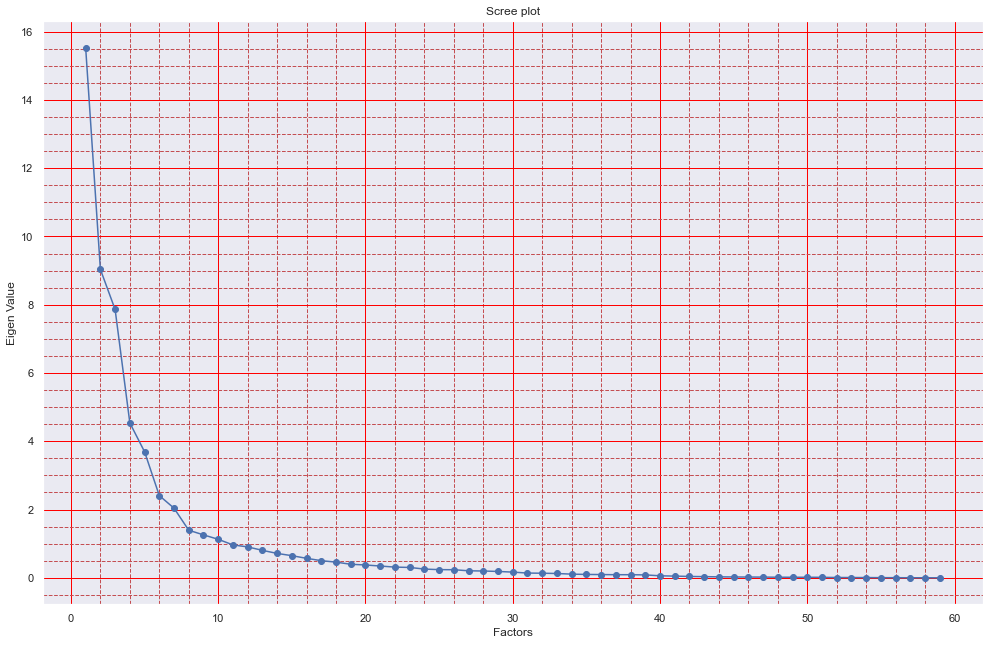

In [437]:
sns.set()
plt.figure(figsize = (15,10))
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'red', )
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

In [438]:
factors  = pd.DataFrame.from_records(loadings)

factors = factors.add_prefix('Factor')

factors.index = num_train_df.columns
factors

Factor0   Factor1   Factor2   Factor3   Factor4  \
rent_mean                    0.760475 -0.063396  0.324753  0.157986 -0.135593   
rent_median                  0.717884 -0.059129  0.319583  0.139694 -0.123943   
rent_stdev                   0.576379 -0.067221  0.222542  0.187015 -0.179919   
rent_sample_weight          -0.442516  0.360121  0.258555 -0.124973 -0.179440   
rent_samples                -0.157643  0.409892  0.470609 -0.099507 -0.303518   
rent_gt_10                  -0.072528  0.072656  0.328015  0.272110  0.193265   
rent_gt_15                  -0.127099  0.055246  0.456564  0.429299  0.200224   
rent_gt_20                  -0.226160  0.016619  0.519126  0.583447  0.196329   
rent_gt_25                  -0.283097 -0.006203  0.516834  0.627992  0.165774   
rent_gt_30                  -0.310527 -0.018712  0.512883  0.679912  0.155216   
rent_gt_35                  -0.303332 -0.032649  0.489806  0.669785  0.124701   
rent_gt_40                  -0.299957 -0.041694  0.477595  0.662098  0.112784   
rent_gt_50                  -0.273391 -0.058043  0.428189  0.570540  0.077252   
hi_mean                      0.955017 -0.042475 -0.015172  0.002751 -0.111454   
hi_median                    0.924299 -0.025099 -0.019047 -0.034585 -0.078977   
hi_stdev                     0.894348 -0.085016 -0.003761  0.110077 -0.191813   
hi_sample_weight            -0.281855  0.851851 -0.014944  0.105316 -0.060737   
hi_samples                   0.225212  0.915959 -0.018944  0.081977 -0.106297   
family_mean                  0.951528 -0.071286 -0.041563  0.029775 -0.130450   
family_median                0.926729 -0.069712 -0.041594  0.016969 -0.124799   
family_stdev                 0.826486 -0.080479  0.006611  0.108359 -0.182463   
family_sample_weight        -0.252024  0.889236 -0.043062  0.095819 -0.010307   
family_samples               0.295321  0.913788 -0.078433  0.086047 -0.030528   
hc_mortgage_mean             0.814993 -0.140474  0.325411  0.149810 -0.268517   
hc_mortgage_median           0.795080 -0.141585  0.335093  0.140629 -0.267696   
hc_mortgage_stdev            0.705367 -0.115090  0.116148  0.184739 -0.193527   
hc_mortgage_sample_weight    0.033047  0.778903 -0.334362 -0.005133  0.251696   
hc_mortgage_samples          0.513082  0.741510 -0.124765  0.040872  0.160367   
hc_mean                      0.729933 -0.164216  0.228162  0.159747 -0.320547   
hc_median                    0.699403 -0.157526  0.232314  0.147746 -0.311856   
hc_stdev                     0.561939 -0.123664  0.080254  0.206635 -0.320587   
hc_samples                   0.040439  0.561232 -0.628977  0.326710 -0.046385   
hc_sample_weight            -0.169444  0.545713 -0.643613  0.263688  0.008750   
home_equity_second_mortgage  0.192335  0.096893  0.356434 -0.235778  0.603279   
second_mortgage              0.215819  0.088124  0.381661 -0.228729  0.619787   
home_equity                  0.630631  0.019653  0.309765 -0.114517  0.488296   
debt                         0.505040  0.173117  0.509058 -0.268231  0.272997   
second_mortgage_cdf         -0.319169 -0.144912 -0.201991  0.165774 -0.599197   
home_equity_cdf             -0.650725 -0.041394 -0.272858  0.101310 -0.503442   
debt_cdf                    -0.494496 -0.162408 -0.530212  0.271567 -0.252608   
hs_degree                    0.687511  0.003140 -0.254227 -0.042930  0.178590   
hs_degree_male               0.680387  0.004870 -0.221397 -0.041693  0.158627   
hs_degree_female             0.652225  0.001020 -0.274125 -0.043365  0.185522   
male_age_mean                0.264362 -0.194492 -0.634425  0.430888  0.131008   
male_age_median              0.335537 -0.171819 -0.637608  0.404396  0.159464   
male_age_stdev               0.049833 -0.020338 -0.511379  0.293379  0.195964   
male_age_sample_weight       0.153491  0.884079  0.167072  0.007167 -0.157445   
male_age_samples             0.199813  0.921159  0.115816  0.019202 -0.135034   
female_age_mean              0.201879 -0.190332 -0.615134  0.

In [439]:
fa = FactorAnalyzer( rotation="varimax", n_factors = 12)
fa.fit(num_train_df)
loadings = fa.loadings_

In [440]:
factors  = pd.DataFrame.from_records(loadings)

factors = factors.add_prefix('Factor ')

factors.index = num_train_df.columns
factors

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  \
rent_mean                    0.789021  0.040012  0.038941 -0.021709  0.069256   
rent_median                  0.742003  0.038226  0.031515 -0.035057  0.053643   
rent_stdev                   0.659926  0.018945  0.085863  0.045249  0.049560   
rent_sample_weight          -0.292390  0.250003  0.042910 -0.151727 -0.102631   
rent_samples                 0.039249  0.330013  0.052201 -0.180707 -0.094791   
rent_gt_10                  -0.030330  0.047236  0.208386 -0.042875 -0.004896   
rent_gt_15                  -0.011144  0.032773  0.375047 -0.050537 -0.044303   
rent_gt_20                  -0.035040  0.001215  0.585450 -0.038916 -0.106707   
rent_gt_25                  -0.055213 -0.012471  0.746023 -0.037572 -0.137342   
rent_gt_30                  -0.067113 -0.015637  0.865941 -0.039781 -0.135501   
rent_gt_35                  -0.057654 -0.021511  0.938392 -0.045885 -0.119311   
rent_gt_40                  -0.056545 -0.028555  0.941935 -0.052699 -0.107208   
rent_gt_50                  -0.044499 -0.047820  0.831141 -0.060800 -0.100731   
hi_mean                      0.829689  0.081603 -0.193967  0.041917  0.291149   
hi_median                    0.775399  0.091510 -0.214237  0.013129  0.278033   
hi_stdev                     0.846488  0.041184 -0.095019  0.113473  0.284510   
hi_sample_weight            -0.302913  0.798058  0.057955  0.078790 -0.025504   
hi_samples                   0.110619  0.926326 -0.053162  0.076272  0.141768   
family_mean                  0.828524  0.049253 -0.176453  0.096145  0.369300   
family_median                0.801321  0.047836 -0.178996  0.074197  0.350845   
family_stdev                 0.773963  0.029345 -0.078128  0.129495  0.315857   
family_sample_weight        -0.290470  0.860767  0.038449 -0.028340 -0.185132   
family_samples               0.139673  0.953192 -0.071167  0.003947  0.054655   
hc_mortgage_mean             0.942393 -0.022254  0.003640  0.011175  0.004836   
hc_mortgage_median           0.925628 -0.026992  0.007762 -0.009202 -0.002076   
hc_mortgage_stdev            0.771064 -0.003261 -0.017650  0.154609  0.057231   
hc_mortgage_sample_weight   -0.300656  0.772373 -0.098838  0.117333  0.224082   
hc_mortgage_samples          0.209495  0.791455 -0.098561  0.069911  0.260278   
hc_mean                      0.872354 -0.051827 -0.008293  0.025025  0.081870   
hc_median                    0.831823 -0.050818 -0.006428  0.010195  0.079423   
hc_stdev                     0.697744 -0.018593 -0.000199  0.114021  0.038425   
hc_samples                  -0.097223  0.629439 -0.068681  0.397885  0.121332   
hc_sample_weight            -0.310923  0.578921 -0.062640  0.353524  0.062729   
home_equity_second_mortgage  0.035851  0.030256  0.008863 -0.089052 -0.001548   
second_mortgage              0.067418  0.023287  0.020624 -0.085433 -0.010200   
home_equity                  0.381937  0.026935 -0.024957  0.000623  0.172420   
debt                         0.310563  0.157140 -0.027205 -0.241165  0.145058   
second_mortgage_cdf         -0.088111 -0.107912  0.019417  0.007253 -0.117169   
home_equity_cdf             -0.381215 -0.050912  0.028408 -0.026020 -0.217667   
debt_cdf                    -0.315979 -0.149139  0.022326  0.258084 -0.111850   
hs_degree                    0.330834  0.029097 -0.165616  0.225304  0.866310   
hs_degree_male               0.347975  0.032828 -0.160559  0.207360  0.802019   
hs_degree_female             0.300928  0.029297 -0.170518  0.235183  0.803285   
male_age_mean                0.122631 -0.085682 -0.065478  0.913235  0.130293   
male_age_median              0.161157 -0.052976 -0.092536  0.872429  0.129297   
male_age_stdev              -0.040713  0.017978 -0.023633  0.295852  0.058230   
male_age_sample_weight       0.108499  0.884899  0.019727 -0.199644 -0.005865   
male_age_samples             0.133978  0.937625 -0.024449 -0.137432 -0.038063   
female_age_mean              0.075875 -0.095166 -0.029350  0

In [441]:
factors_df = round(factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", 
                                "female_age_median", "home_equity_second_mortgage", 'second_mortgage', 
                                'second_mortgage_cdf', 'pct_own', 'Bad_Debt'], :], 2)

In [442]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.6:
    color = 'red'
  elif value > 0.6:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [443]:
factors_df.style.applymap(color_negative_red)

In [444]:
len(num_train_df.columns)

59

In [445]:
# Get variance of each factors
fact_variance  = fa.get_factor_variance()
fact_variance

(array([11.80936284,  8.87462737,  4.71407812,  4.40034677,  3.7719359 ,
         3.35575384,  3.02878697,  2.2082388 ,  2.02803286,  1.83414925,
         1.66211151,  0.78492774]),
 array([0.20015869, 0.15041741, 0.07989963, 0.07458215, 0.06393112,
        0.05687718, 0.05133537, 0.03742778, 0.03437344, 0.03108728,
        0.02817138, 0.01330386]),
 array([0.20015869, 0.35057611, 0.43047573, 0.50505788, 0.568989  ,
        0.62586618, 0.67720156, 0.71462933, 0.74900277, 0.78009005,
        0.80826143, 0.82156529]))

In [446]:
factor_variance  = pd.DataFrame.from_records(fact_variance)

factor_variance = factor_variance.add_prefix('Factor ')

factor_variance.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
round(factor_variance, 2)

Factor 0  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
SS Loadings        11.81      8.87      4.71      4.40      3.77      3.36   
Proportion Var      0.20      0.15      0.08      0.07      0.06      0.06   
Cumulative Var      0.20      0.35      0.43      0.51      0.57      0.63   

                Factor 6  Factor 7  Factor 8  Factor 9  Factor 10  Factor 11  
SS Loadings         3.03      2.21      2.03      1.83       1.66       0.78  
Proportion Var      0.05      0.04      0.03      0.03       0.03       0.01  
Cumulative Var      0.68      0.71      0.75      0.78       0.81       0.82

# 6. Data Modeling
## Building a linear Regression model to predict the total monthly expenditure for home mortgages loan.
a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

b) Run another model at State level. There are 52 states in USA.

c) Keep below considerations while building a linear regression model. Data Modeling :

• Variables should have significant impact on predicting Monthly mortgage and owner costs

• Utilize all predictor variable to start with initial hypothesis

• R square of 60 percent and above should be achieved

• Ensure Multi-collinearity does not exist in dependent variables

• Test if predicted variable is normally distributed

In [447]:
train_data.shape

(26585, 80)

In [448]:
test_data.shape

(11355, 79)

In [449]:
train_data.drop('Bad_Debt', axis = 1, inplace = True)

In [450]:
train_data.shape

(26585, 79)

In [451]:
train_data[num_variables(train_data)].head(30)

lat         lng        ALand   rent_mean  rent_median  rent_stdev  \
0   42.840812  -75.501524  202183361.0   769.38638        784.0   232.63967   
1   41.701441  -86.266614    1560828.0   804.87924        848.0   253.46747   
2   39.792202  -86.515246   69561595.0   742.77365        703.0   323.39011   
3   18.396103  -66.104169    1105793.0   803.42018        782.0   297.39258   
4   39.195573  -96.569366    2554403.0   938.56493        881.0   392.44096   
5   34.519582  -87.151801   78402217.0   605.10246        684.0   230.15912   
6   33.842814  -97.784340  663218412.0   661.76963        674.0   230.48928   
7   35.136763  -82.294817  160338537.0   784.36272        729.0   401.67621   
8   40.688610  -73.830597     157581.0  1438.85143       1501.0   444.91460   
9   33.755867 -118.407590    3565039.0  2104.29576       1856.0   838.73396   
10  34.041746 -118.311492     462145.0  1067.34552       1127.0   387.91424   
11  32.685428 -117.170373    1263078.0  2086.20929       2197.0   998.33509   
12  34.460610  -93.091772   10127241.0   828.11030        772.0   370.84891   
13  39.483288  -76.305102    1777723.0  1608.96440       1604.0   444.75389   
14  33.075515  -96.847148    3384294.0  3171.18369       3241.0   404.77865   
15  41.132313  -88.867428   24384336.0   569.11486        510.0   244.87693   
16  41.531776  -93.738356   40975706.0   780.30639        738.0   200.64943   
17  36.123123  -86.714215    4157628.0   727.56346        714.0   203.39685   
18  40.134995  -88.324213   19602855.0  1169.34293       1140.0   386.27218   
19  40.630293  -73.974492     153160.0  1173.45957       1227.0   623.83309   
20  29.880128  -97.946005    1596312.0  1064.87286        899.0   446.67350   
21  36.183293 -115.252131    1660586.0   979.40142        954.0   238.87463   
22  30.375431  -92.085240  129556107.0   739.18362        773.0   210.01849   
23  40.560424 -105.126121    2648998.0  1120.22497       1037.0   409.22168   
24  41.875771  -71.413678    1173922.0   960.10728        880.0   383.51481   
25  32.799679  -89.860752  455318476.0   569.44621        620.0   245.45548   
26  39.422579  -74.597527   12702114.0  1143.92869       1030.0   460.35193   
27  45.352927 -122.326152   93750097.0  1066.07101        903.0   391.88556   
28  34.390996 -118.441152   18679077.0  2166.05373       2107.0   435.17866   
29  33.375450 -111.638670    2607351.0  1211.00420       1302.0   322.31293   

    rent_sample_weight  rent_samples  rent_gt_10  rent_gt_15  rent_gt_20  \
0            272.34441         362.0     0.86761     0.79155     0.59155   
1            312.58622         513.0     0.97410     0.93227     0.69920   
2            291.85520         378.0     0.95238     0.88624     0.79630   
3            259.30316         368.0     0.94693     0.87151     0.69832   
4           1005.42886        1704.0     0.99286     0.98247     0.91688   
5            272.10405         287.0     0.80139     0.74564     0.74564   
6            125.45345         153.0     0.78431     0.71242     0.69935   
7             94.04990         124.0     1.00000     1.00000     1.00000   
8             76.80713         332.0     1.00000     0.93578     0.93578   
9             48.12378         391.0     0.96675     0.96675     0.91304   
10           503.19855        1253.0     0.97845     0.90822     0.85555   
11            66.22611         260.0     0.91837     0.91837     0.73469   
12           784.08318        1065.0     0.98478     0.84110     0.73549   
13            21.08616         122.0     1.00000     0.80328     0.57377   
14             5.30261          54.0     1.00000     1.00000     1.00000   
15           501.97980         554.0     0.96875     0.90820     0.81836   
16           488.15468         551.0     1.00000     0.75499     0.63339   
17          1478.24729        1824.0     0.99338     0.88754     0.78004   
18           416.27622        1067.0     1.00000     0.78819     0.69916   
19           323.98202         819.0    

In [452]:
#dropping 'SUMLEVEL' variable from train dataset
train_data.drop('SUMLEVEL', inplace = True, axis = 1)

In [453]:
train_data.shape

(26585, 78)

In [454]:
test_data.shape

(11355, 79)

In [455]:
#dropping 'SUMLEVEL' variable from test dataset
test_data.drop('SUMLEVEL', inplace = True, axis = 1)

In [456]:
#train_data[num_variables(train_data)]

In [457]:
num_2_cat = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [458]:
for col in num_2_cat:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

In [459]:
print(train_data[cat_variables(train_data)].head(10))

      UID COUNTYID STATEID           state state_ab                 city  \
0  267822       53      36        New York       NY             Hamilton   
1  246444      141      18         Indiana       IN           South Bend   
2  245683       63      18         Indiana       IN             Danville   
3  279653      127      72     Puerto Rico       PR             San Juan   
4  247218      161      20          Kansas       KS            Manhattan   
5  221087       79       1         Alabama       AL              Trinity   
6  286689      337      48           Texas       TX               Nocona   
7  280558       45      45  South Carolina       SC              Taylors   
8  269138       81      36        New York       NY  South Richmond Hill   
9  227164       37       6      California       CA  Rancho Palos Verdes   

                       place   type primary zip_code area_code        lat  \
0                   Hamilton   City   tract    13346       315  42.840812   
1        

In [460]:
obj_2_cat = ['state', 'state_ab', 'city', 'place', 'type', 'primary']

In [461]:
for col in obj_2_cat:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

In [462]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26585 entries, 0 to 27320
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   UID                          26585 non-null  category
 1   COUNTYID                     26585 non-null  category
 2   STATEID                      26585 non-null  category
 3   state                        26585 non-null  category
 4   state_ab                     26585 non-null  category
 5   city                         26585 non-null  category
 6   place                        26585 non-null  category
 7   type                         26585 non-null  category
 8   primary                      26585 non-null  category
 9   zip_code                     26585 non-null  category
 10  area_code                    26585 non-null  category
 11  lat                          26585 non-null  category
 12  lng                          26585 non-null  category
 13  A

In [463]:
print(train_data[['hc_mortgage_mean']].head(30))

    hc_mortgage_mean
0         1414.80295
1          864.41390
2         1506.06758
3         1175.28642
4         1192.58759
5         1137.05215
6         1339.98441
7         1891.72540
8         2941.26980
9         3306.26240
10        2785.22083
11        2860.75770
12        1191.26932
13        1895.03457
14        3196.37077
15        1152.77797
16        1755.89306
17        1205.08477
18        1427.52735
19        2974.53585
20        1297.19094
21        1445.37985
22        1208.26436
23        1384.75689
24        1533.66808
25        1090.42033
26        2055.48404
27        1652.64523
28        3221.20828
29        1386.51823


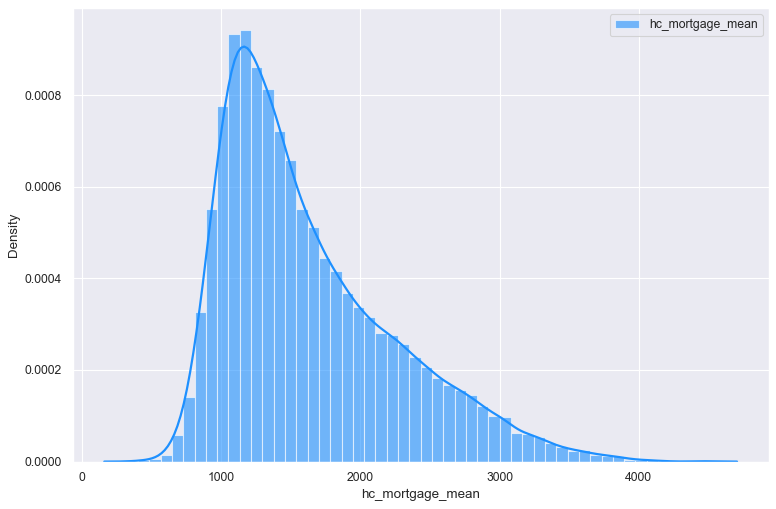

In [464]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(train_data.hc_mortgage_mean, color="dodgerblue", label="hc_mortgage_mean", **kwargs)

plt.legend()

- Target Variable "hc_mortgage_mean" has a Positive Skew.

In [465]:
#linear regression estimator
lr = LinearRegression()

In [466]:
#Adjusted r2 = 1-(1-R2)*(n-1)/(n-p-1)
def adj_rsqrd(df, r2):
    # adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
    # k = number of predictors = data.shape[1] - 1
    adj_rsqrd = 1 - (1-r2)*(len(df) - 1) / (len(df) - (df.shape[1] - 1) - 1)
    return round(adj_rsqrd, 3)

In [467]:
cat_cols_2_drop = ['UID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng']

In [468]:
train_data.drop(cat_cols_2_drop, axis=1, inplace=True)

In [469]:
test_data.drop(cat_cols_2_drop, axis=1, inplace=True)

In [470]:
train_data.drop(['COUNTYID', 'STATEID'], axis=1, inplace=True)

In [471]:
test_y = test_data['hc_mortgage_mean']

In [472]:
test_data.drop(['COUNTYID', 'STATEID', 'hc_mortgage_mean'], axis=1, inplace=True)

In [473]:
print(train_data.shape, test_data.shape)

(26585, 65) (11355, 64)


In [474]:
train_X = train_data.drop(columns=['hc_mortgage_mean'])
train_y = train_data['hc_mortgage_mean']

In [475]:
#model fitting
lr.fit(train_X, train_y)

LinearRegression()

In [476]:
#prediction
predict_train = lr.predict(train_X)
predict_test = lr.predict(test_data)

In [477]:
# model evaluation for testing set
mae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(test_data, r2)))

The model performance for test set
--------------------------------------
MAE is 43.675
MSE is 4673.486
RMSE is 68.363
R2 score is 0.988
Adjusted R2 score is 0.988


# Regression Model with all dependent numeric variables @ Country level is giving R SQUARED metric of 98.8%. So skipping state level Regression Model

In [478]:
correlated_features = set()
correlation_matrix = train_data.drop('hc_mortgage_mean', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [479]:
correlated_features

{'debt_cdf',
 'family_mean',
 'family_median',
 'family_sample_weight',
 'family_samples',
 'family_stdev',
 'female_age_mean',
 'female_age_median',
 'female_age_sample_weight',
 'female_age_samples',
 'female_pop',
 'hc_median',
 'hc_mortgage_samples',
 'hc_sample_weight',
 'hi_median',
 'hi_samples',
 'hi_stdev',
 'home_equity_cdf',
 'hs_degree_female',
 'hs_degree_male',
 'male_age_median',
 'male_age_sample_weight',
 'male_age_samples',
 'male_pop',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'rent_median',
 'rent_samples',
 'second_mortgage',
 'universe_samples',
 'used_samples'}

In [480]:
corr_list = ['debt_cdf', 'family_mean', 'family_median', 'family_sample_weight', 'family_samples', 'family_stdev', 'female_age_mean', 
             'female_age_median','female_age_sample_weight', 'female_age_samples', 'female_pop', 'hc_median', 'hc_mortgage_samples', 
             'hc_sample_weight', 'hi_median','hi_samples', 'hi_stdev', 'home_equity_cdf', 'hs_degree_female', 'hs_degree_male', 
             'male_age_median', 'male_age_sample_weight','male_age_samples', 'male_pop', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 
             'rent_gt_40', 'rent_gt_50', 'rent_median', 'rent_samples', 'second_mortgage', 'universe_samples', 'used_samples']

In [481]:
train_data.drop(corr_list, axis=1, inplace=True)

In [482]:
test_data.drop(corr_list, axis=1, inplace=True)

In [483]:
print(train_data.shape, test_data.shape)

(26585, 31) (11355, 30)


# Dropped MultiCollinear variables and ran the Regression Model.

In [484]:
train_data.head()

ALand   AWater   pop  rent_mean  rent_stdev  rent_sample_weight  \
0  202183361.0  1699120  5230  769.38638   232.63967           272.34441   
1    1560828.0   100363  2633  804.87924   253.46747           312.58622   
2   69561595.0   284193  6881  742.77365   323.39011           291.85520   
3    1105793.0        0  2700  803.42018   297.39258           259.30316   
4    2554403.0        0  5637  938.56493   392.44096          1005.42886   

   rent_gt_10  rent_gt_15  rent_gt_20      hi_mean  hi_sample_weight  \
0     0.86761     0.79155     0.59155  63125.28406        1290.96240   
1     0.97410     0.93227     0.69920  41931.92593         838.74664   
2     0.95238     0.88624     0.79630  84942.68317        1155.20980   
3     0.94693     0.87151     0.69832  48733.67116         928.32193   
4     0.99286     0.98247     0.91688  31834.15466        1548.67477   

   hc_mortgage_mean  hc_mortgage_median  hc_mortgage_stdev  \
0        1414.80295              1223.0          641.22898   
1         864.41390               784.0          482.27020   
2        1506.06758              1361.0          731.89394   
3        1175.28642              1101.0          428.98751   
4        1192.58759              1125.0          327.49674   

   hc_mortgage_sample_weight    hc_mean   hc_stdev  hc_samples  \
0                  377.83135  570.01530  270.11299       770.0   
1                  316.88320  351.98293  125.40457       229.0   
2                  699.41354  556.45986  184.42175       538.0   
3                  261.28471  288.04047  185.55887       392.0   
4                   76.61052  443.68855   76.12674       124.0   

   home_equity_second_mortgage  home_equity     debt  second_mortgage_cdf  \
0                      0.01588      0.08919  0.52963              0.43658   
1                      0.02222      0.04274  0.60855              0.42174   
2                      0.00000      0.09512  0.73484              1.00000   
3                      0.01086      0.01086  0.52714              0.53057   
4                      0.05426      0.05426  0.51938              0.18332   

   hs_degree  male_age_mean  male_age_stdev  female_age_stdev  pct_own  \
0    0.89288       42.48574        22.97306          22.51276  0.79046   
1    0.90487       34.84728        20.37452          23.43353  0.52483   
2    0.94288       39.38154        22.89769          23.94119  0.85331   
3    0.91500       48.64749        23.05968          24.32015  0.65037   
4    1.00000       26.07533        11.84399          11.10484  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109

In [485]:
train_X = train_data.drop(columns=['hc_mortgage_mean'])
train_y = train_data['hc_mortgage_mean']

In [486]:
lr.fit(train_X, train_y)

LinearRegression()

In [487]:
predict_train = lr.predict(train_X)
predict_test = lr.predict(test_data)

In [488]:
# model evaluation for testing set

mae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(test_data, r2)))

The model performance for test set
--------------------------------------
MAE is 44.001
MSE is 4787.228
RMSE is 69.19
R2 score is 0.988
Adjusted R2 score is 0.988


In [489]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Let's Check how close our algorithm is predicting, by passing the inputs from our test set and compare them to the target values.

In [490]:
import random
randomlist = []
for i in range(0,100):
    n = random.randint(1,len(test_data))
    randomlist.append(n)
print(randomlist)

[594, 1868, 10794, 4296, 459, 5564, 4595, 5036, 463, 1903, 6445, 1359, 10036, 1188, 8624, 11174, 8475, 1800, 4595, 8613, 10172, 2588, 8941, 2413, 10882, 251, 806, 11088, 5791, 10222, 10404, 9984, 4707, 1491, 2324, 6762, 5650, 10235, 2048, 1906, 8607, 2861, 4212, 3001, 10652, 3622, 4526, 3176, 2731, 1477, 10393, 2521, 8656, 10755, 10717, 8507, 10491, 4394, 5034, 4448, 924, 1389, 8204, 3481, 1279, 6056, 3317, 11037, 240, 1014, 6772, 3687, 5002, 7424, 11231, 3599, 10372, 6120, 2464, 8779, 1401, 8342, 10828, 8620, 9180, 9406, 5081, 2568, 8039, 1935, 7966, 2671, 9406, 5621, 1547, 10523, 7668, 3352, 4279, 4138]


In [491]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(test_data.iloc[i])]
    pre_data_out = lr.predict(data_in)
    data_out = test_y .iloc[i]
    
    print(i, pre_data_out, data_out)
    
    pre_out.append(pre_data_out)
    out.append(data_out)

594 [1287.5675627] 1238.3743
1868 [1369.10271387] 1422.67795
10794 [1757.33086668] 1731.43521
4296 [1805.10857364] 1792.12578
459 [1370.44059002] 1393.71327
5564 [2346.45365582] 2306.8398
4595 [1049.39209204] 1038.25324
5036 [2941.89372912] 2888.57849
463 [2285.87333791] 2385.04349
1903 [2150.10028341] 2187.00877
6445 [908.45110076] 959.69335
1359 [2841.35117359] 2861.04967
10036 [1176.64938235] 1234.81844
1188 [1455.56601348] 1507.80232
8624 [2606.54083628] 2598.86778
11174 [1139.23160203] 1155.44417
8475 [2557.12715304] 2580.76911
1800 [2661.30439018] 2727.43402
4595 [1049.39209204] 1038.25324
8613 [900.47499871] 898.6234900000001
10172 [963.50970487] 929.90079
2588 [916.90145419] 888.83656
8941 [1405.69299402] 1420.71656
2413 [2160.04519062] 2174.03334
10882 [1726.09603198] 1689.8922
251 [1199.8844129] 1158.71378
806 [1285.60441506] 1295.49631
11088 [1028.52709499] 1013.0995199999999
5791 [2968.17957182] 2994.23749
10222 [2287.59175549] 2250.82143
10404 [1520.20032878] 1624.68092
99

In [492]:
print(pre_out)

[array([1287.5675627]), array([1369.10271387]), array([1757.33086668]), array([1805.10857364]), array([1370.44059002]), array([2346.45365582]), array([1049.39209204]), array([2941.89372912]), array([2285.87333791]), array([2150.10028341]), array([908.45110076]), array([2841.35117359]), array([1176.64938235]), array([1455.56601348]), array([2606.54083628]), array([1139.23160203]), array([2557.12715304]), array([2661.30439018]), array([1049.39209204]), array([900.47499871]), array([963.50970487]), array([916.90145419]), array([1405.69299402]), array([2160.04519062]), array([1726.09603198]), array([1199.8844129]), array([1285.60441506]), array([1028.52709499]), array([2968.17957182]), array([2287.59175549]), array([1520.20032878]), array([1193.70001393]), array([1367.03345335]), array([1194.82083209]), array([1162.36414031]), array([1984.05471529]), array([903.95600505]), array([1456.22274526]), array([2649.45243917]), array([1221.25602187]), array([1244.17265097]), array([1812.77664921])

In [493]:
x = [2,3,5,9,1,0,2,3]

def my_min(sequence):
    """return the minimum element of sequence"""
    low = sequence[0] # need to start with some value
    for i in sequence:
        if i < low:
            low = i
    return low

print(my_min(x))

0


In [494]:
x = [2,3,5,9,1,0,2,3]

def my_maxi(sequence):
    """return the minimum element of sequence"""
    maxi = sequence[0] # need to start with some value
    for i in sequence:
        if i > maxi:
            maxi = i
    return maxi

print(my_maxi(x))

9


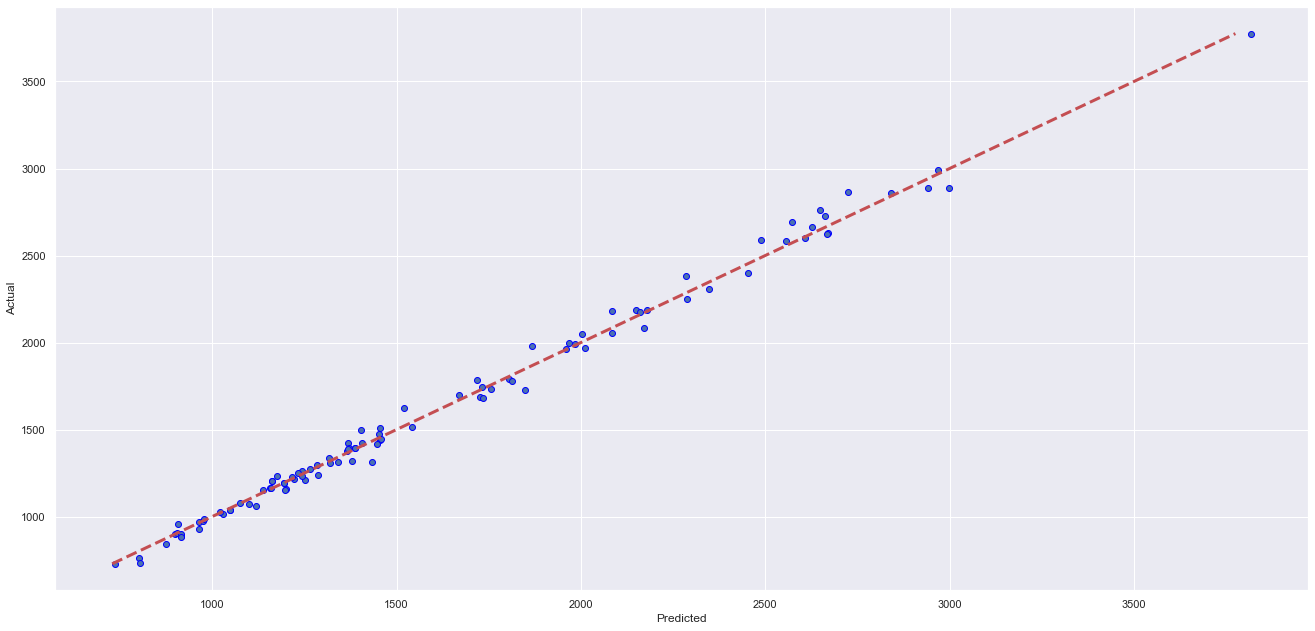

In [495]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(pre_out, out, edgecolors=(0, 0, 1))
ax.plot([my_min(out), my_maxi(out)], [my_min(out), my_maxi(out)], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [496]:
# model evaluation for testing set

mae = mean_absolute_error(test_y, predict_test)
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(round(mae, 3)))
print('MSE is {}'.format(round(mse, 3)))
print('RMSE is {}'.format(round(mse**(0.5), 3)))
print('R2 score is {}'.format(round(r2, 3)))

print('Adjusted R2 score is {}'.format(adj_rsqrd(test_data, r2)))

The model performance for test set
--------------------------------------
MAE is 44.001
MSE is 4787.228
RMSE is 69.19
R2 score is 0.988
Adjusted R2 score is 0.988


# We have achieved an adjusted R Squared value of 98.8% which is pretty close to 1, indicating our selected "Independent Variables" are highly correlated to our "Dependent Variable" and our model is able to predict very accurately.